# Lung Cancer Prediction

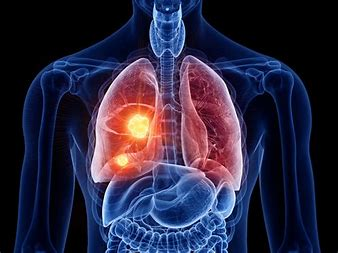

### Lung cancer prediction using 10 machine learning classification models using Scikit-learn library in Python is a code implementation that aims to develop a predictive model for detecting lung cancer in patients. The code uses 10 different machine learning algorithms, including logistic regression, decision tree, k-nearest neighbor, Gaussian naive Bayes, multinomial naive Bayes, support vector classifier, random forest, XGBoost, multi-layer perceptron, and gradient boosting classifier, to predict the likelihood of lung cancer based on a range of variables. The dataset used in the code includes various columns such as gender, age, smoking, yellow fingers, anxiety, peer pressure, chronic disease, fatigue, allergy, wheezing, alcohol consuming, coughing, shortness of breath, swallowing difficulty, chest pain, and lung cancer. By analyzing these variables and using machine learning algorithms to identify patterns and correlations, the predictive models can provide accurate assessments of a patient's risk of developing lung cancer.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('survey lung cancer.csv')

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [5]:
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [7]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [8]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [9]:
df.shape

(309, 16)

In [10]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [11]:
from sklearn import preprocessing

In [12]:
label_encoder = preprocessing.LabelEncoder()

In [13]:
df['GENDER']=label_encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = label_encoder.fit_transform(df['LUNG_CANCER'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int32
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [15]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [16]:
df.nunique()

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64

In [19]:
df = df[['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']]

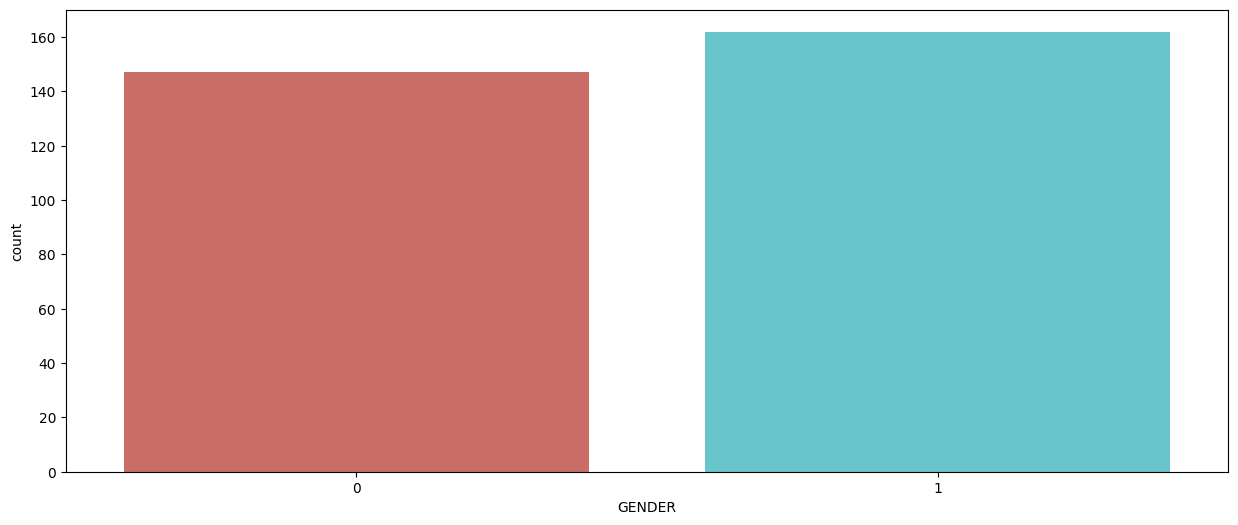

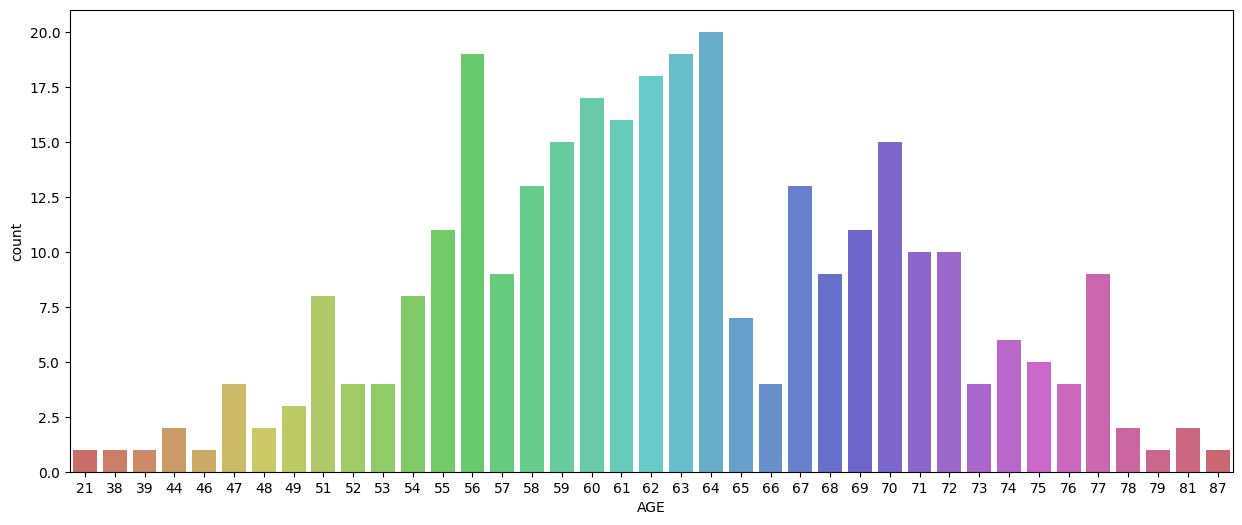

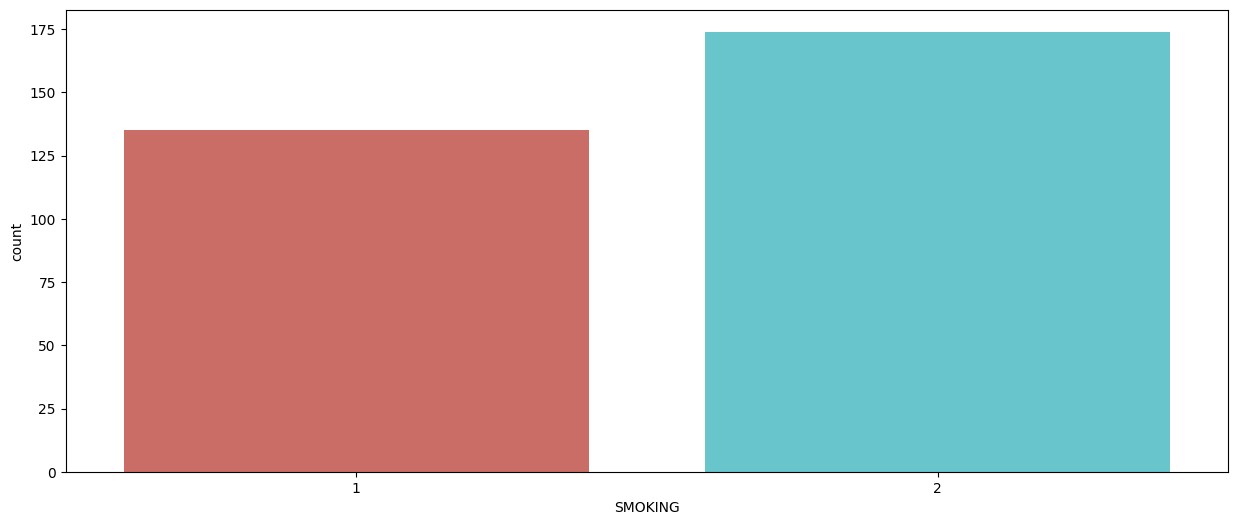

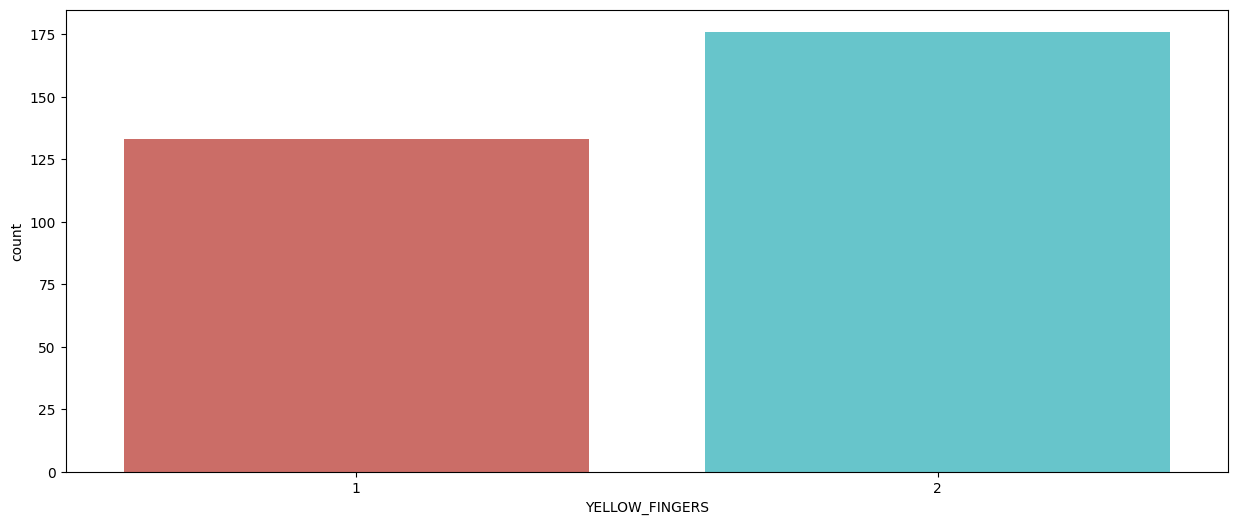

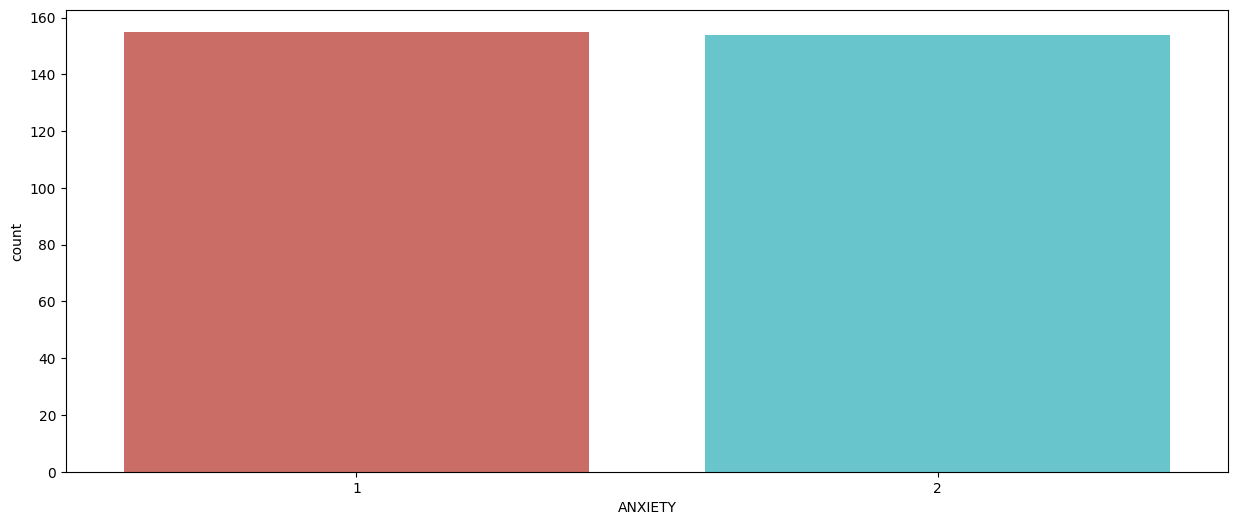

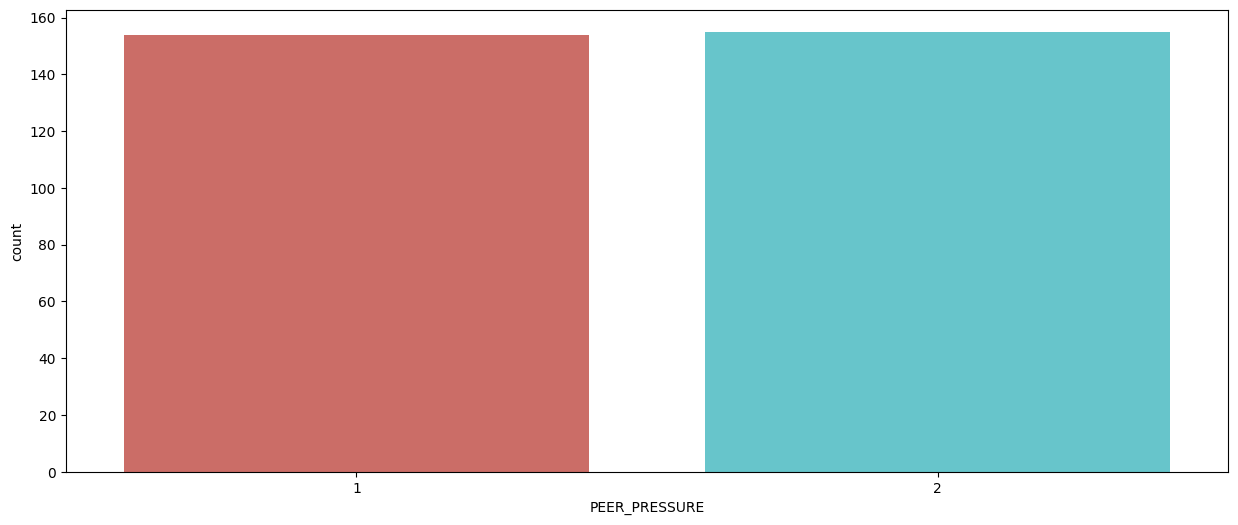

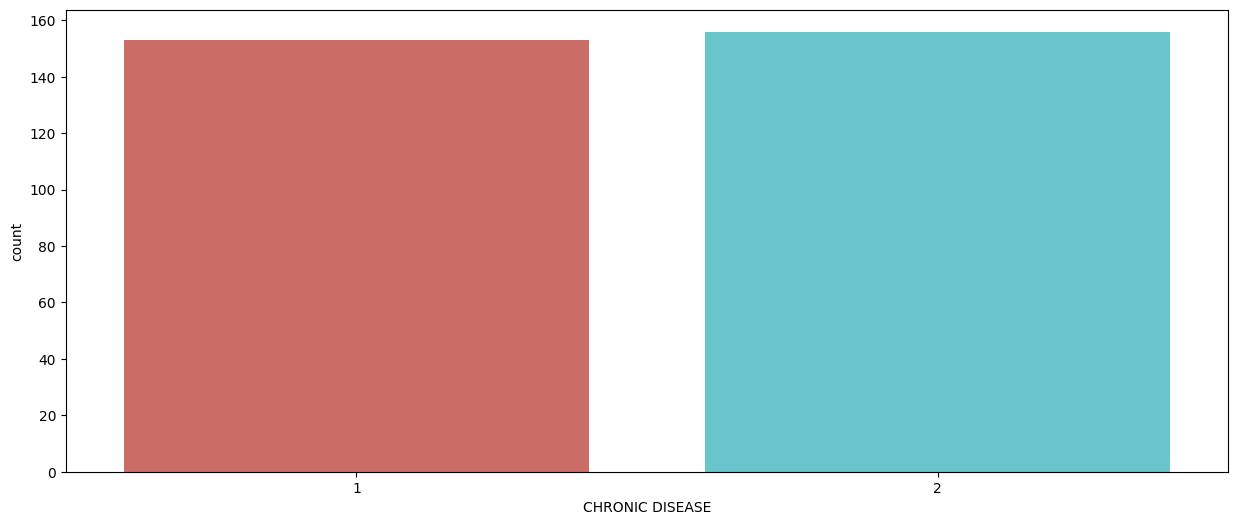

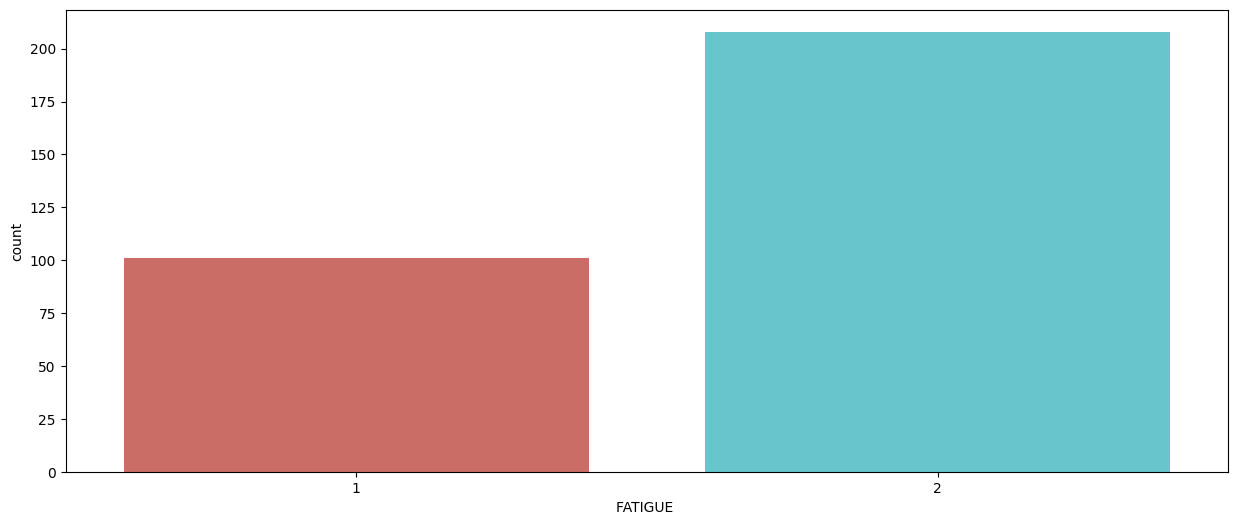

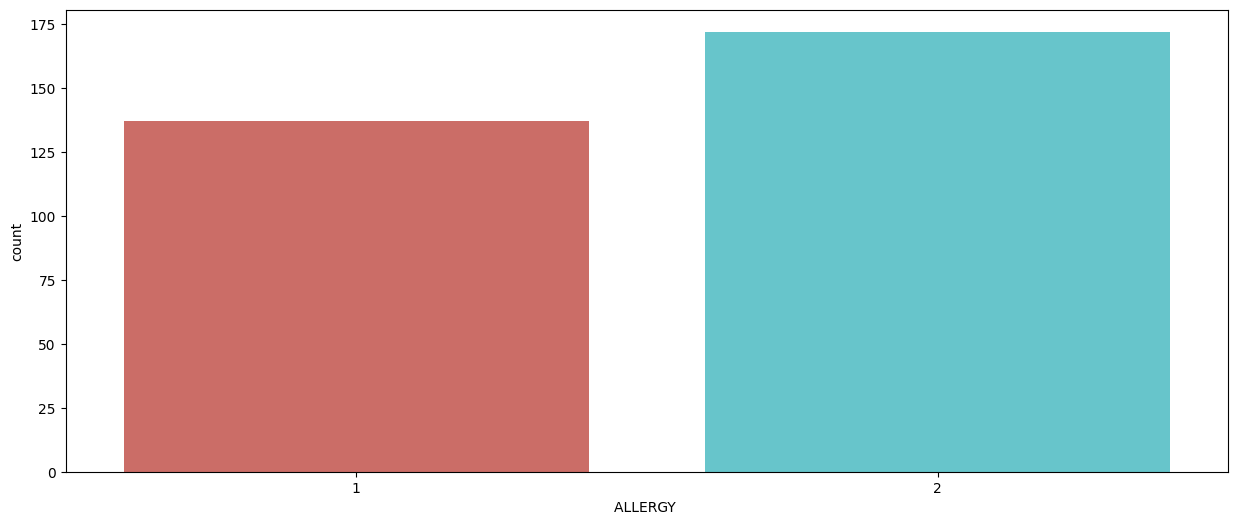

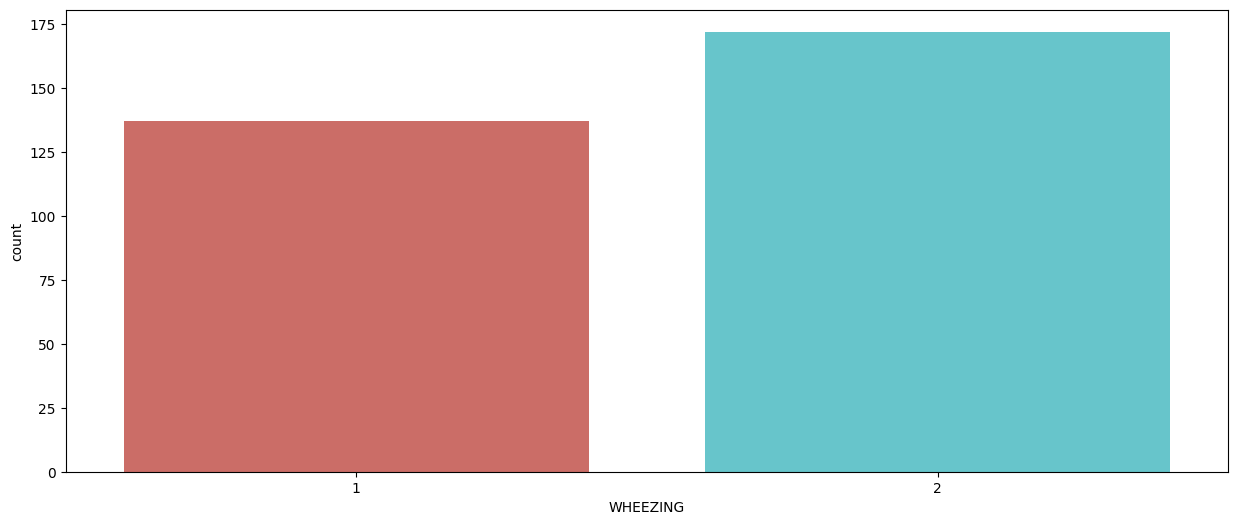

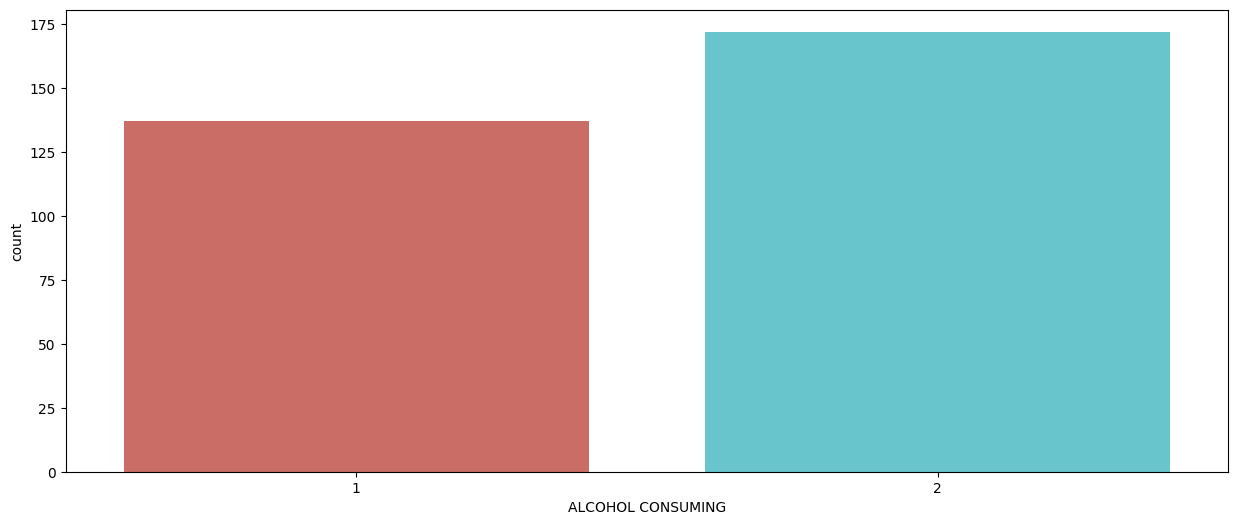

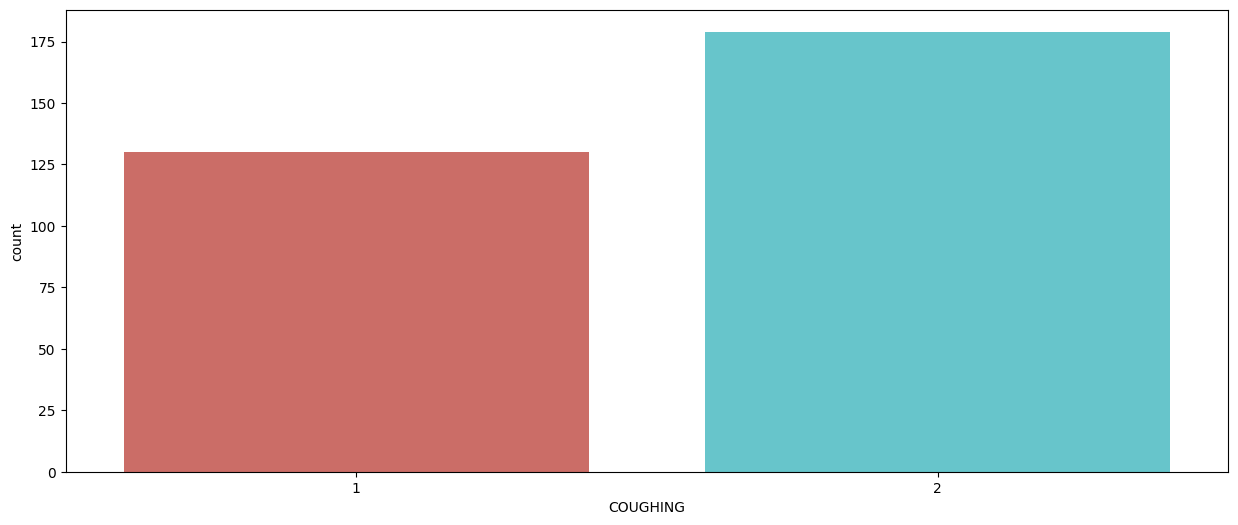

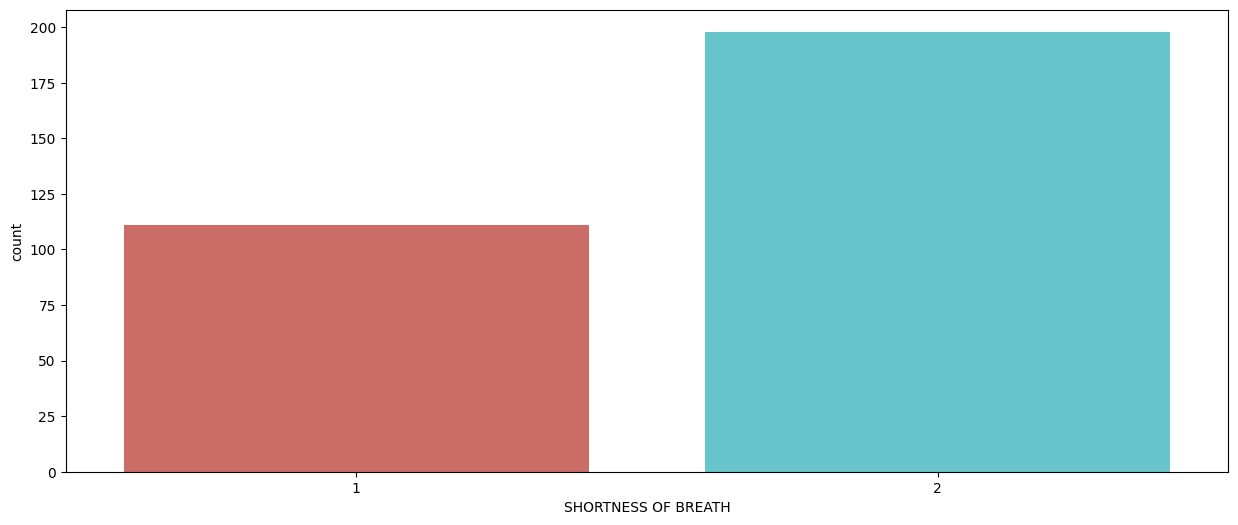

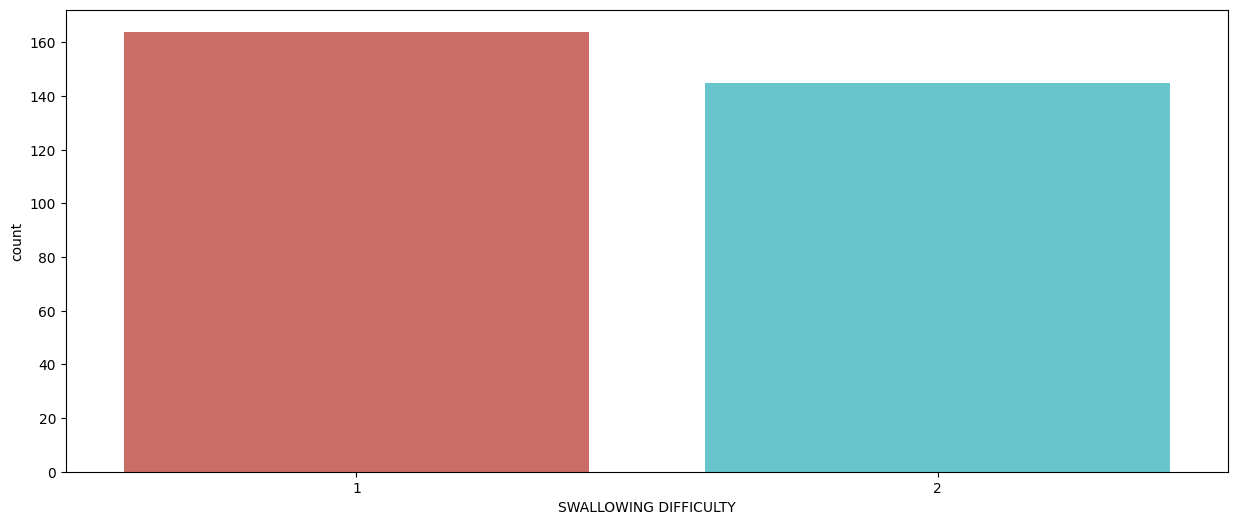

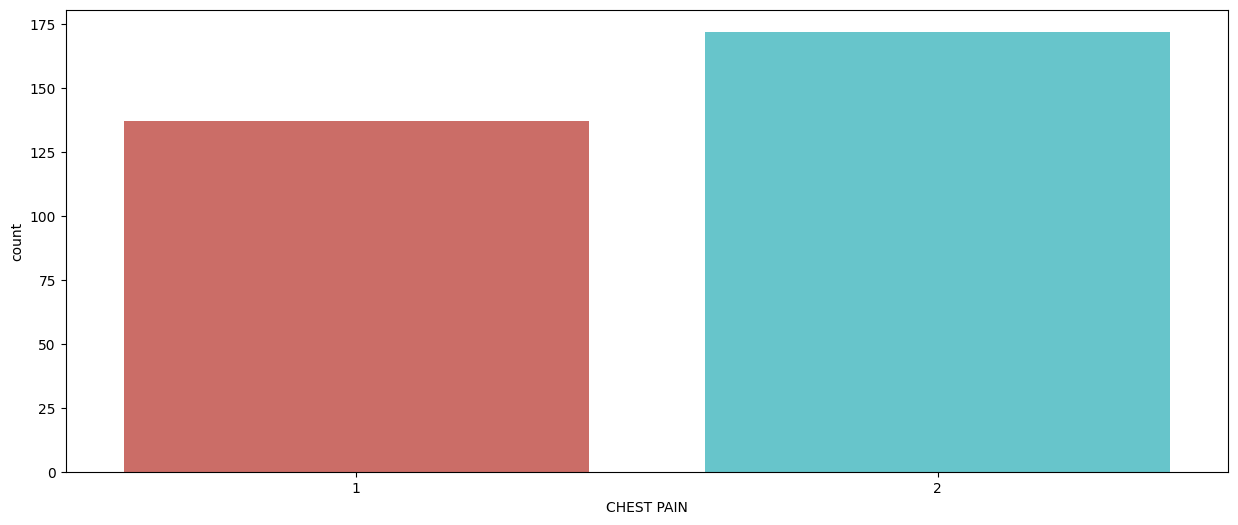

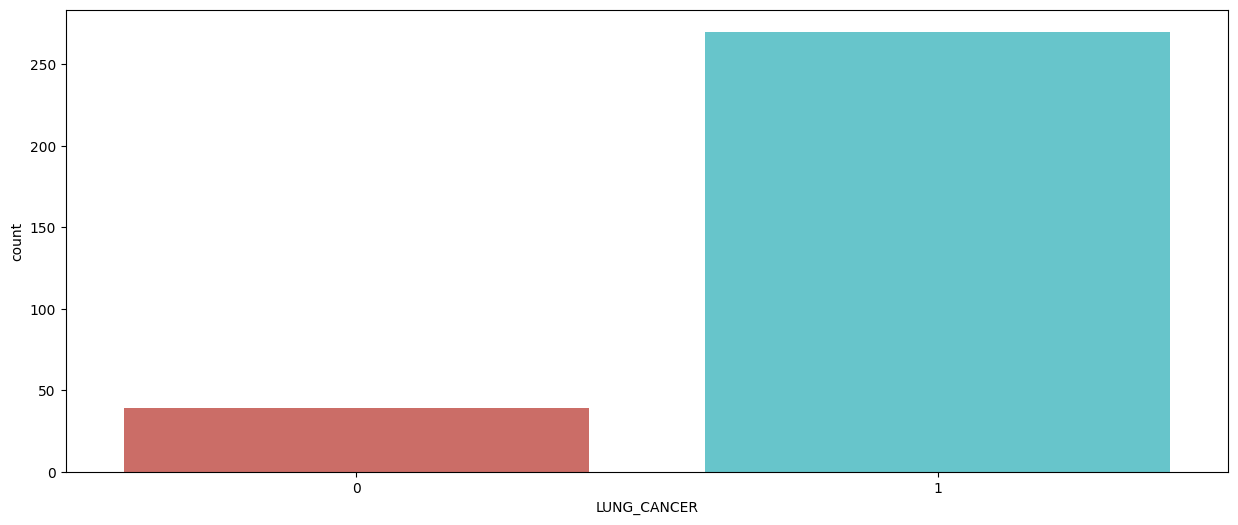

In [21]:
for i in df.columns:
    plt.figure(figsize=(15,6))
    sns.countplot(data=df,  x=df[i], palette = 'hls')
    plt.show()

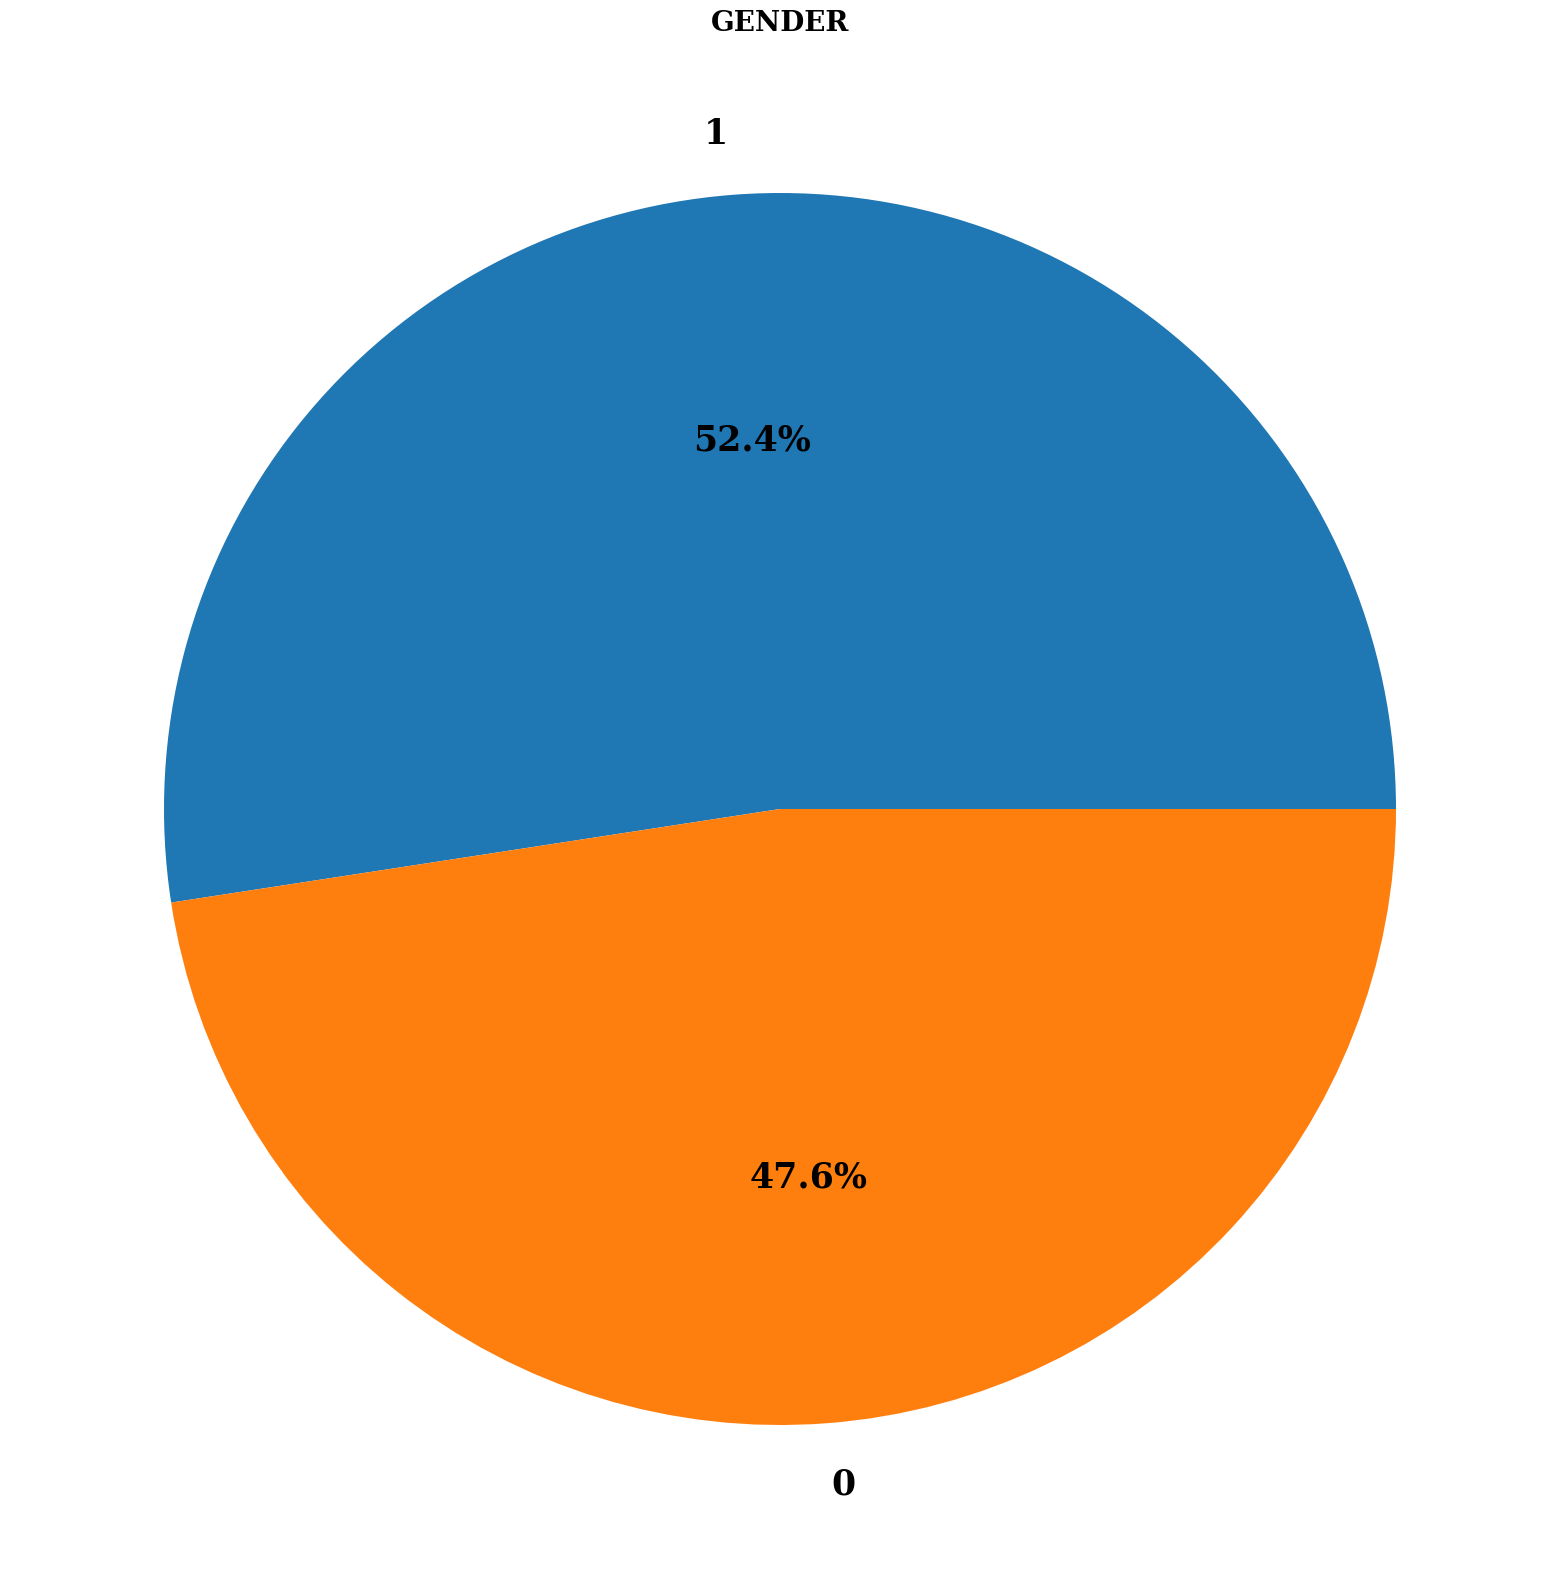

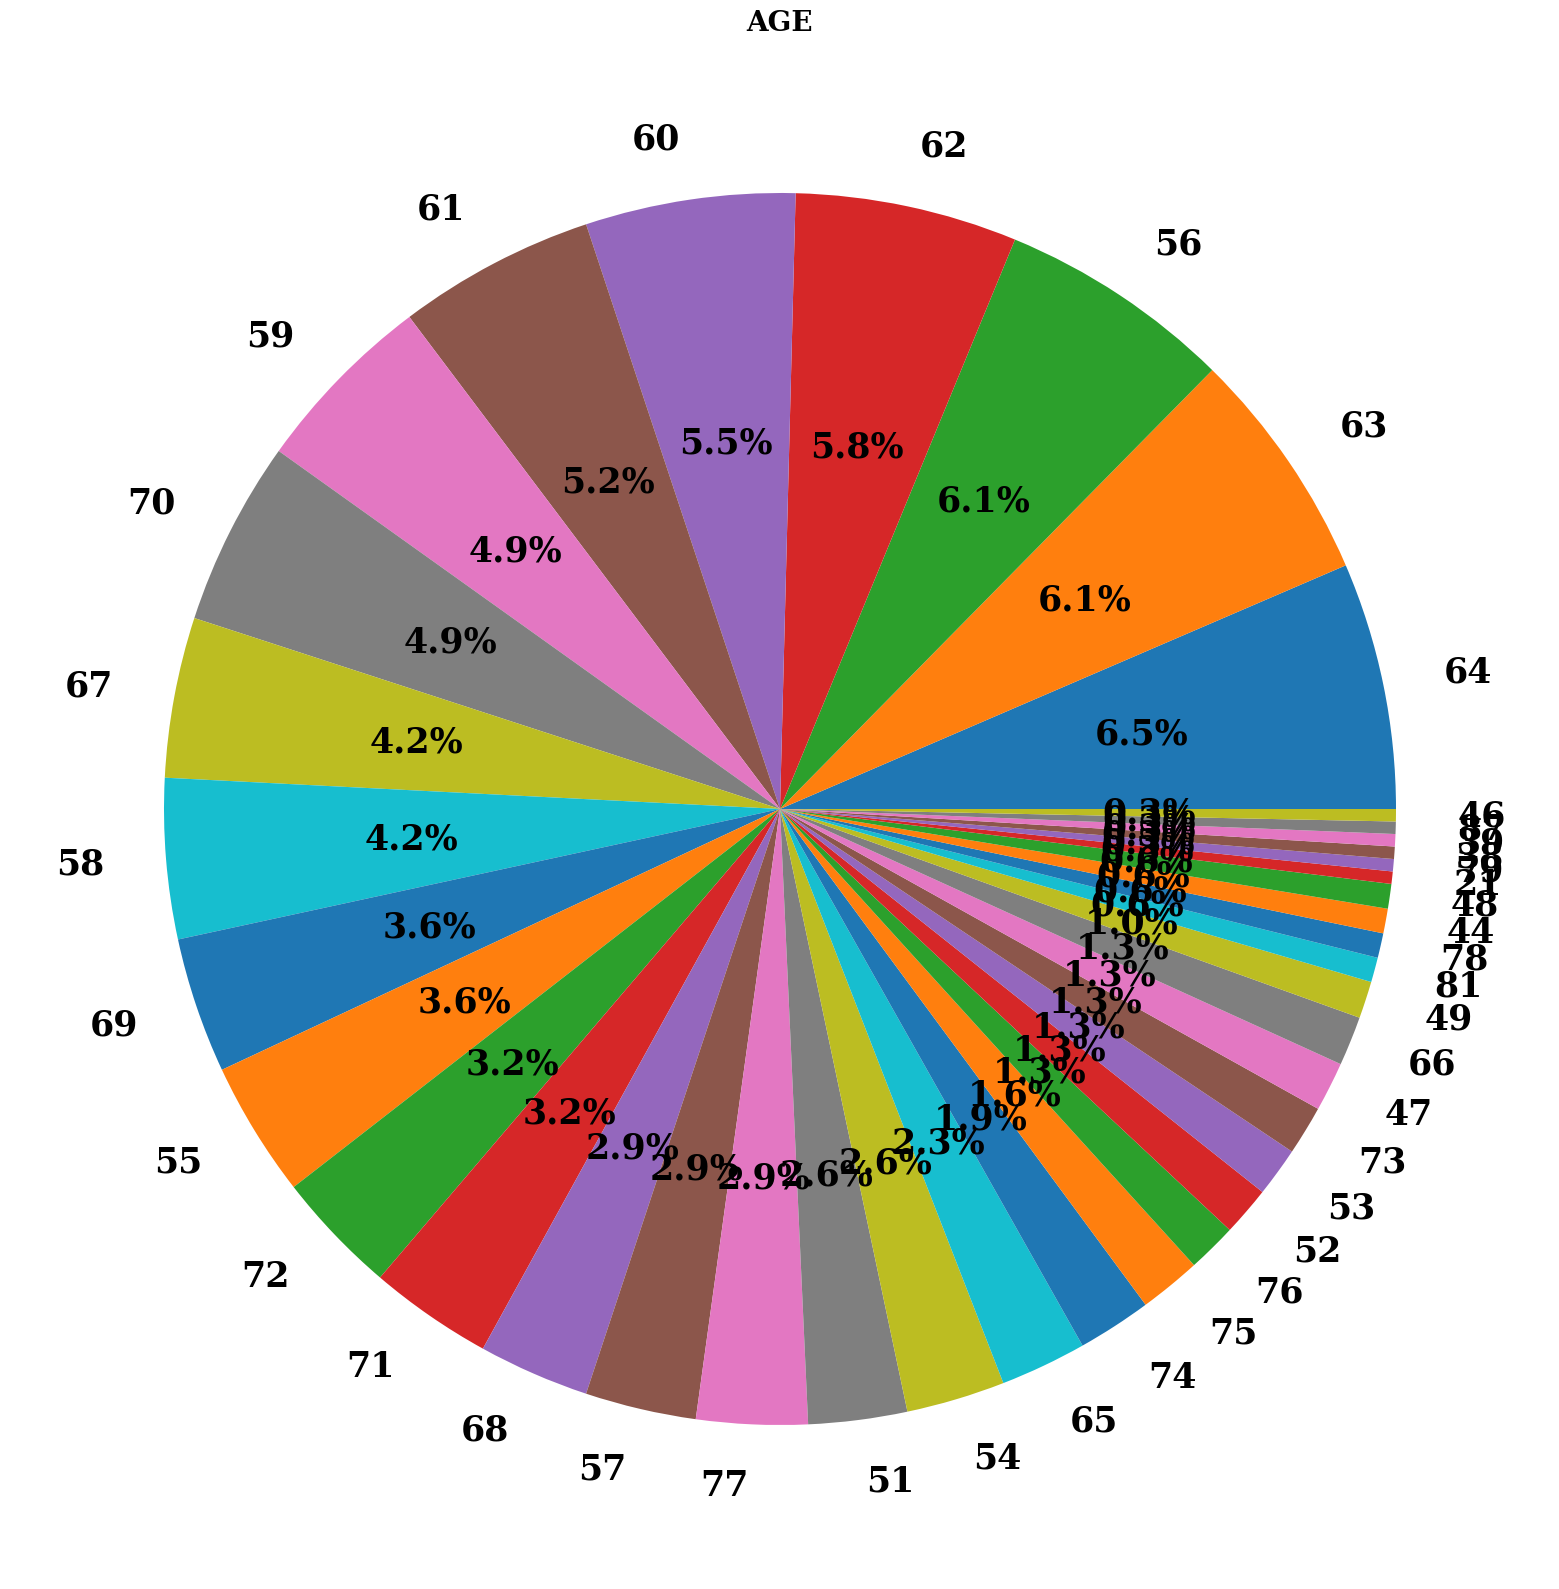

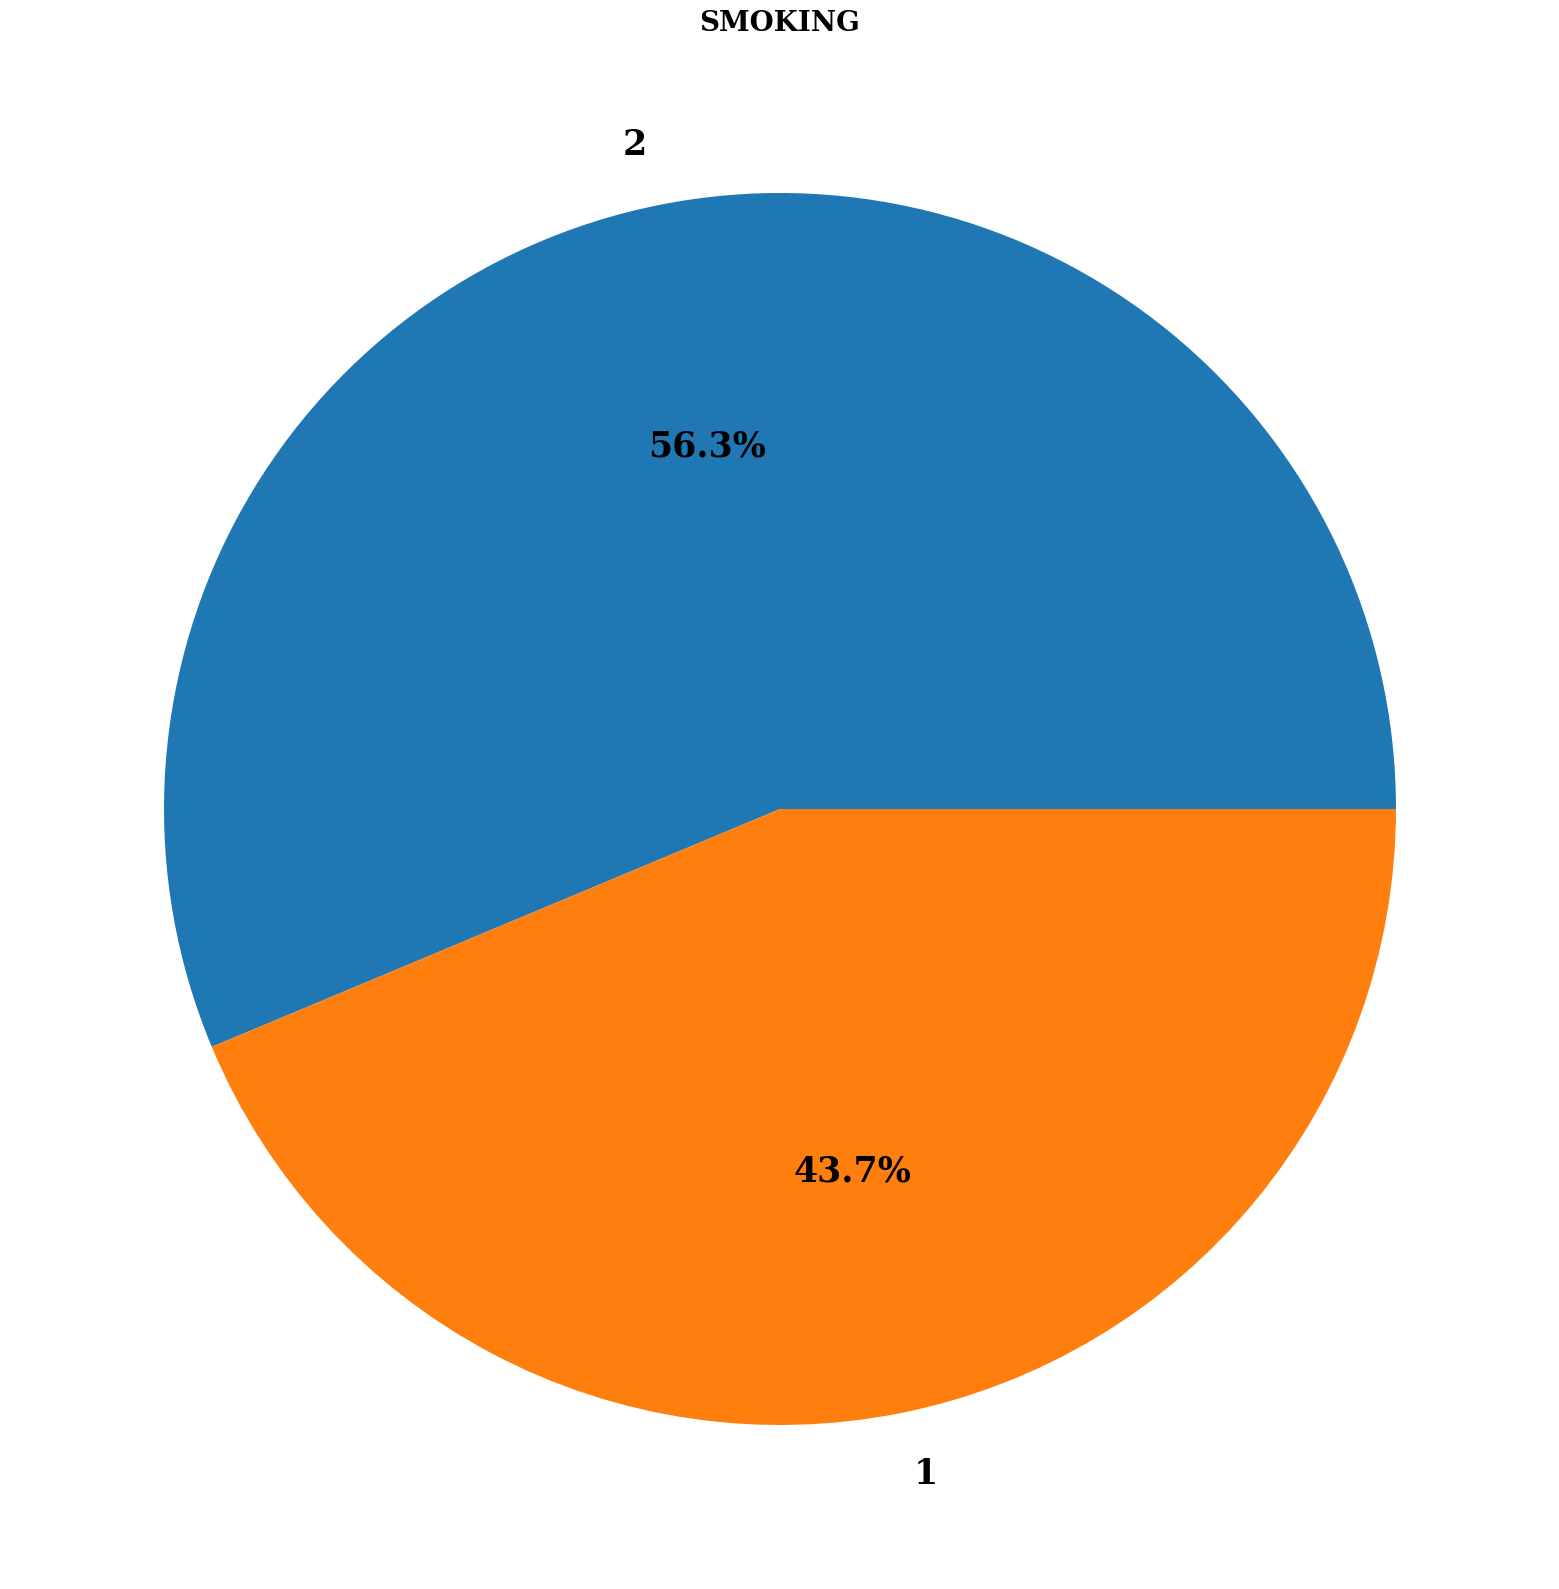

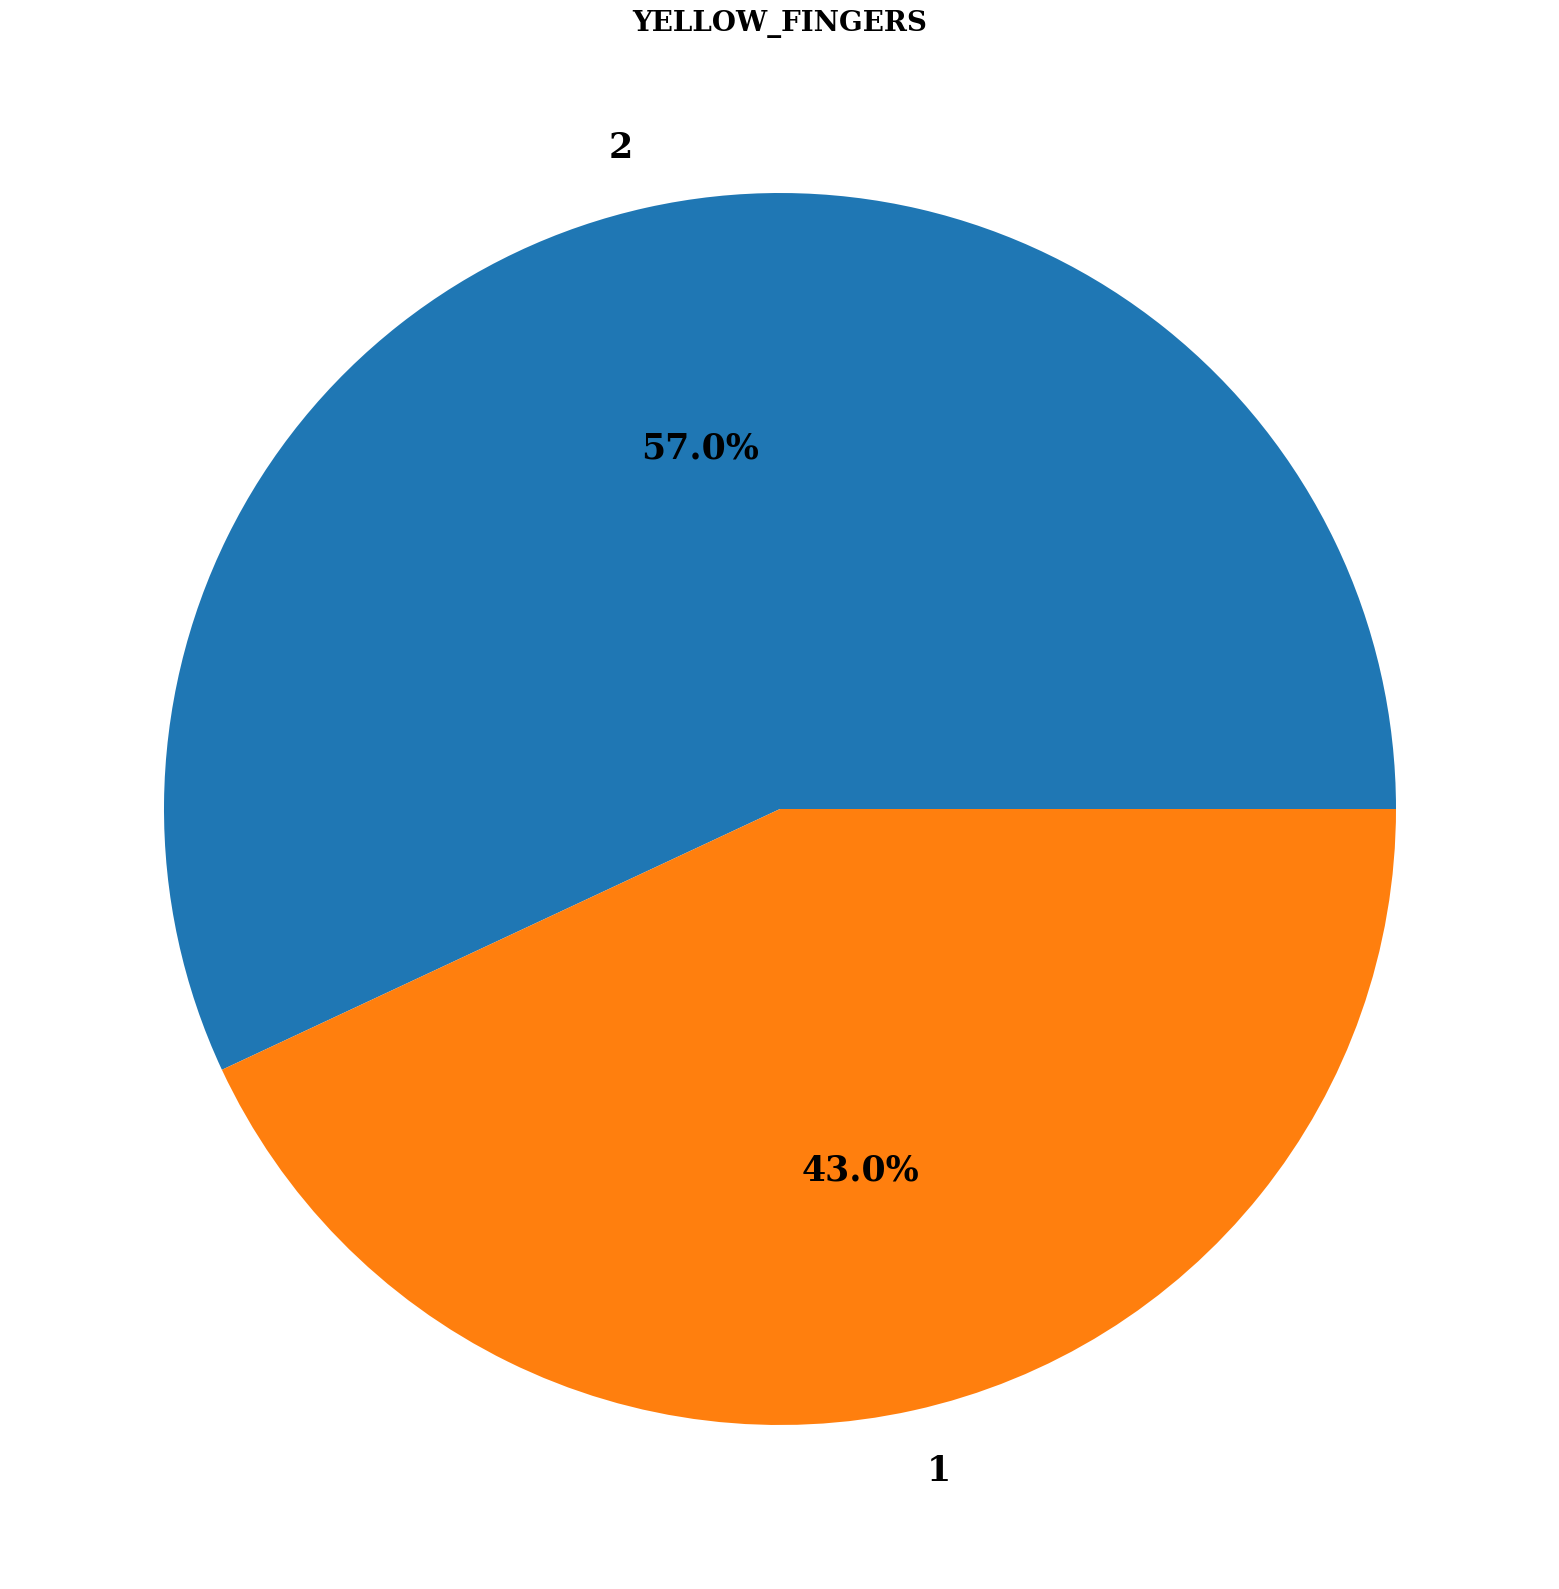

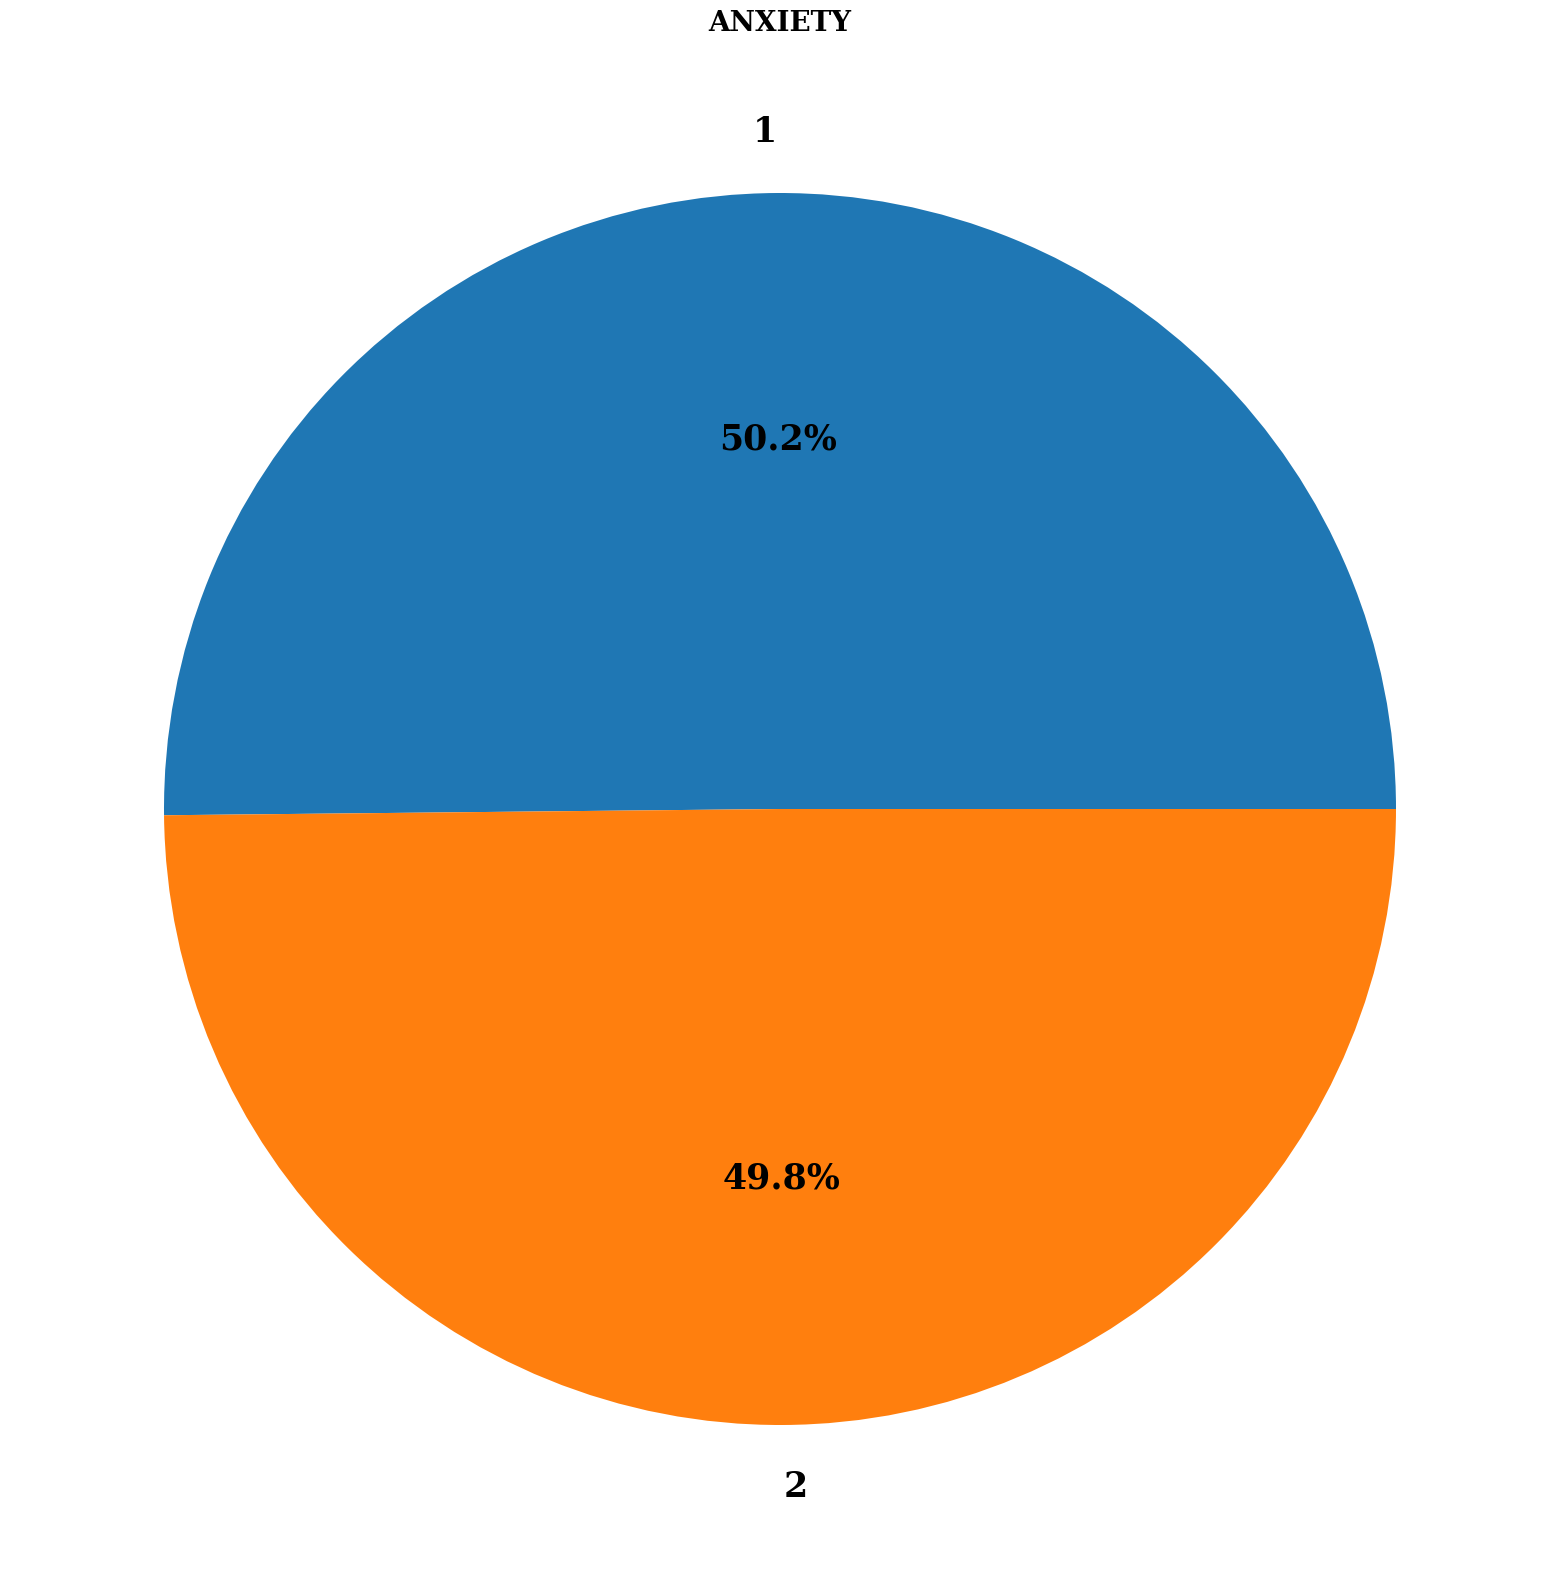

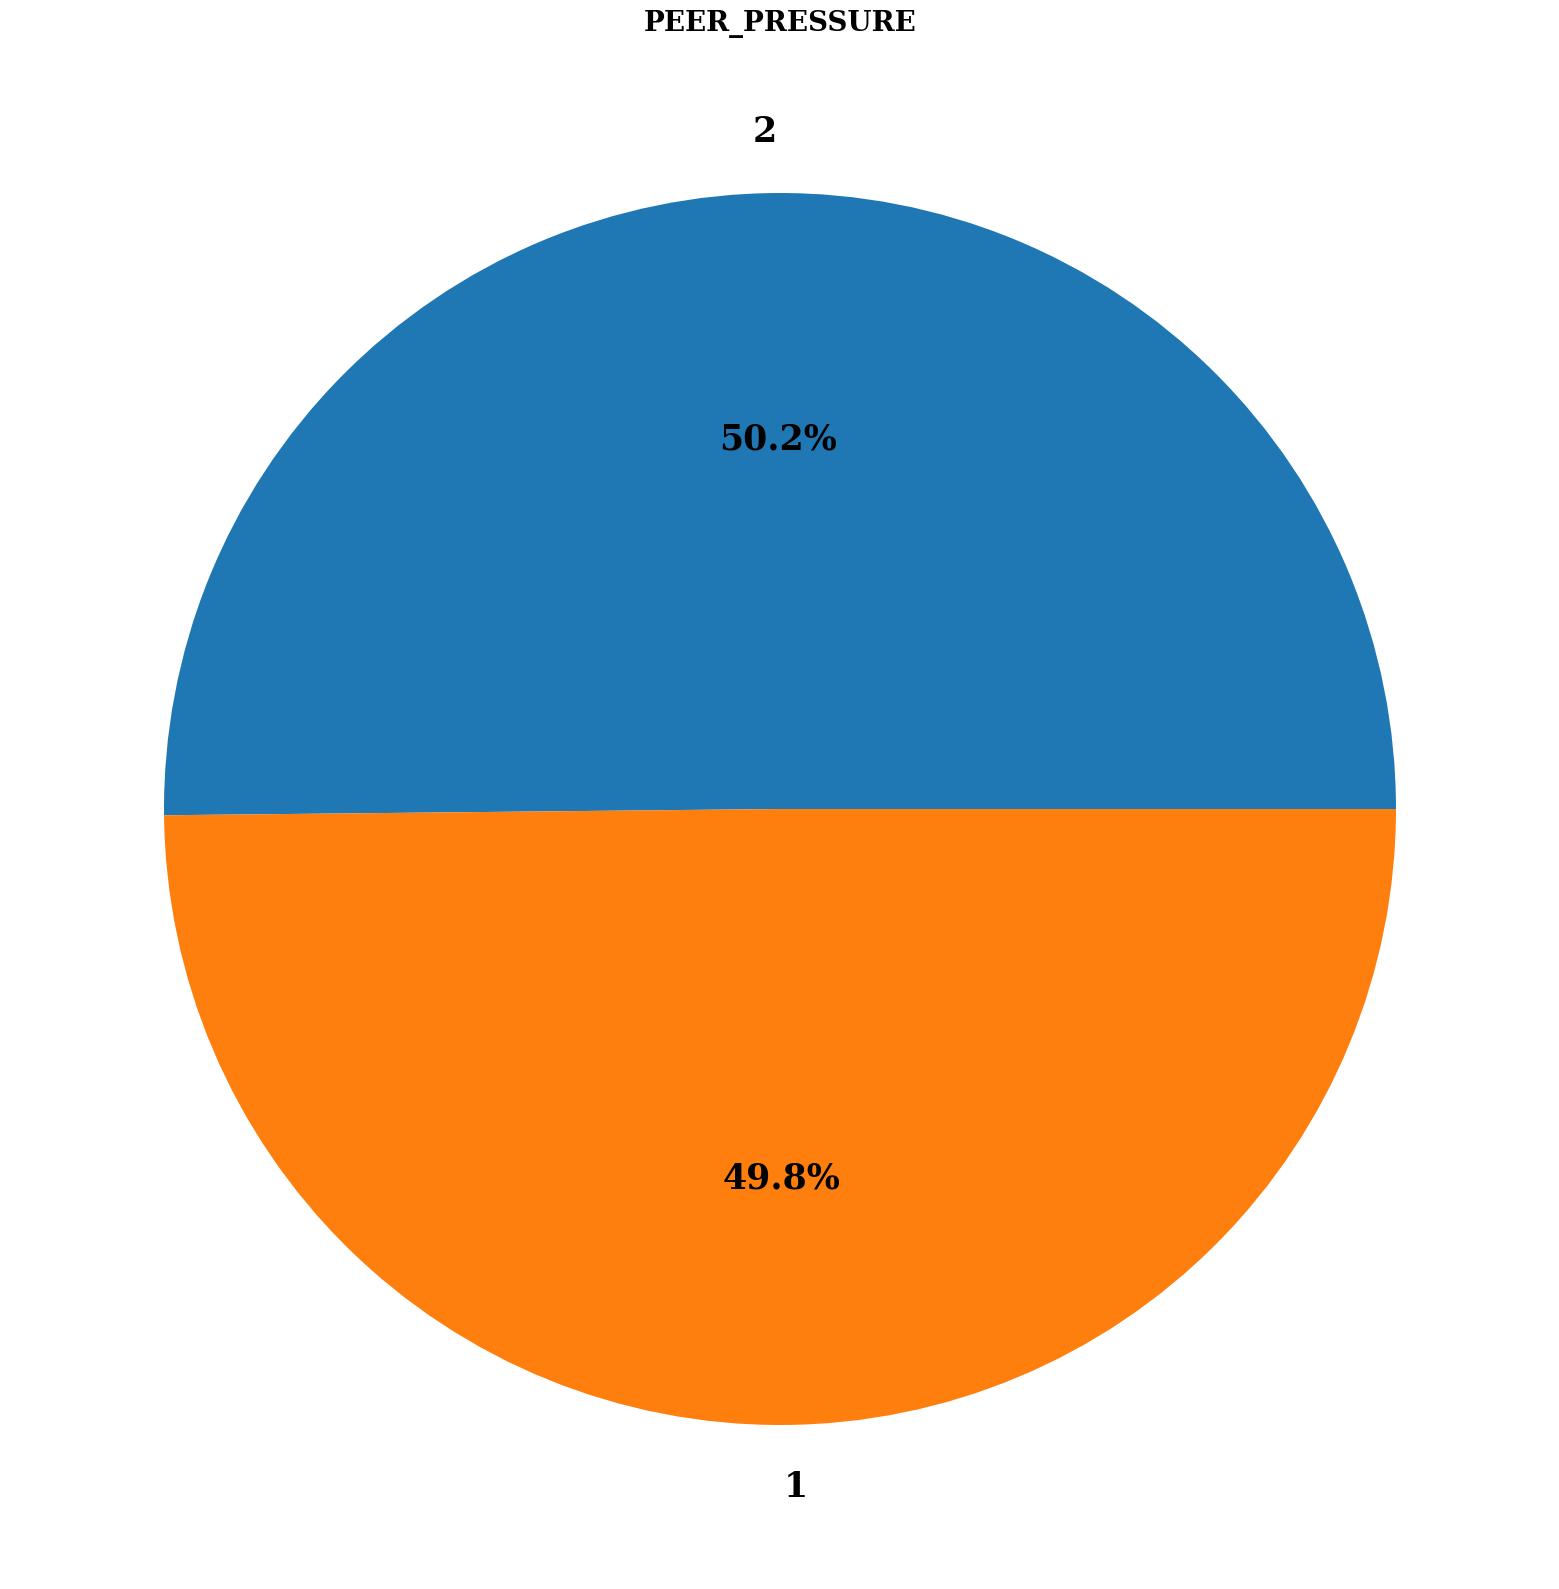

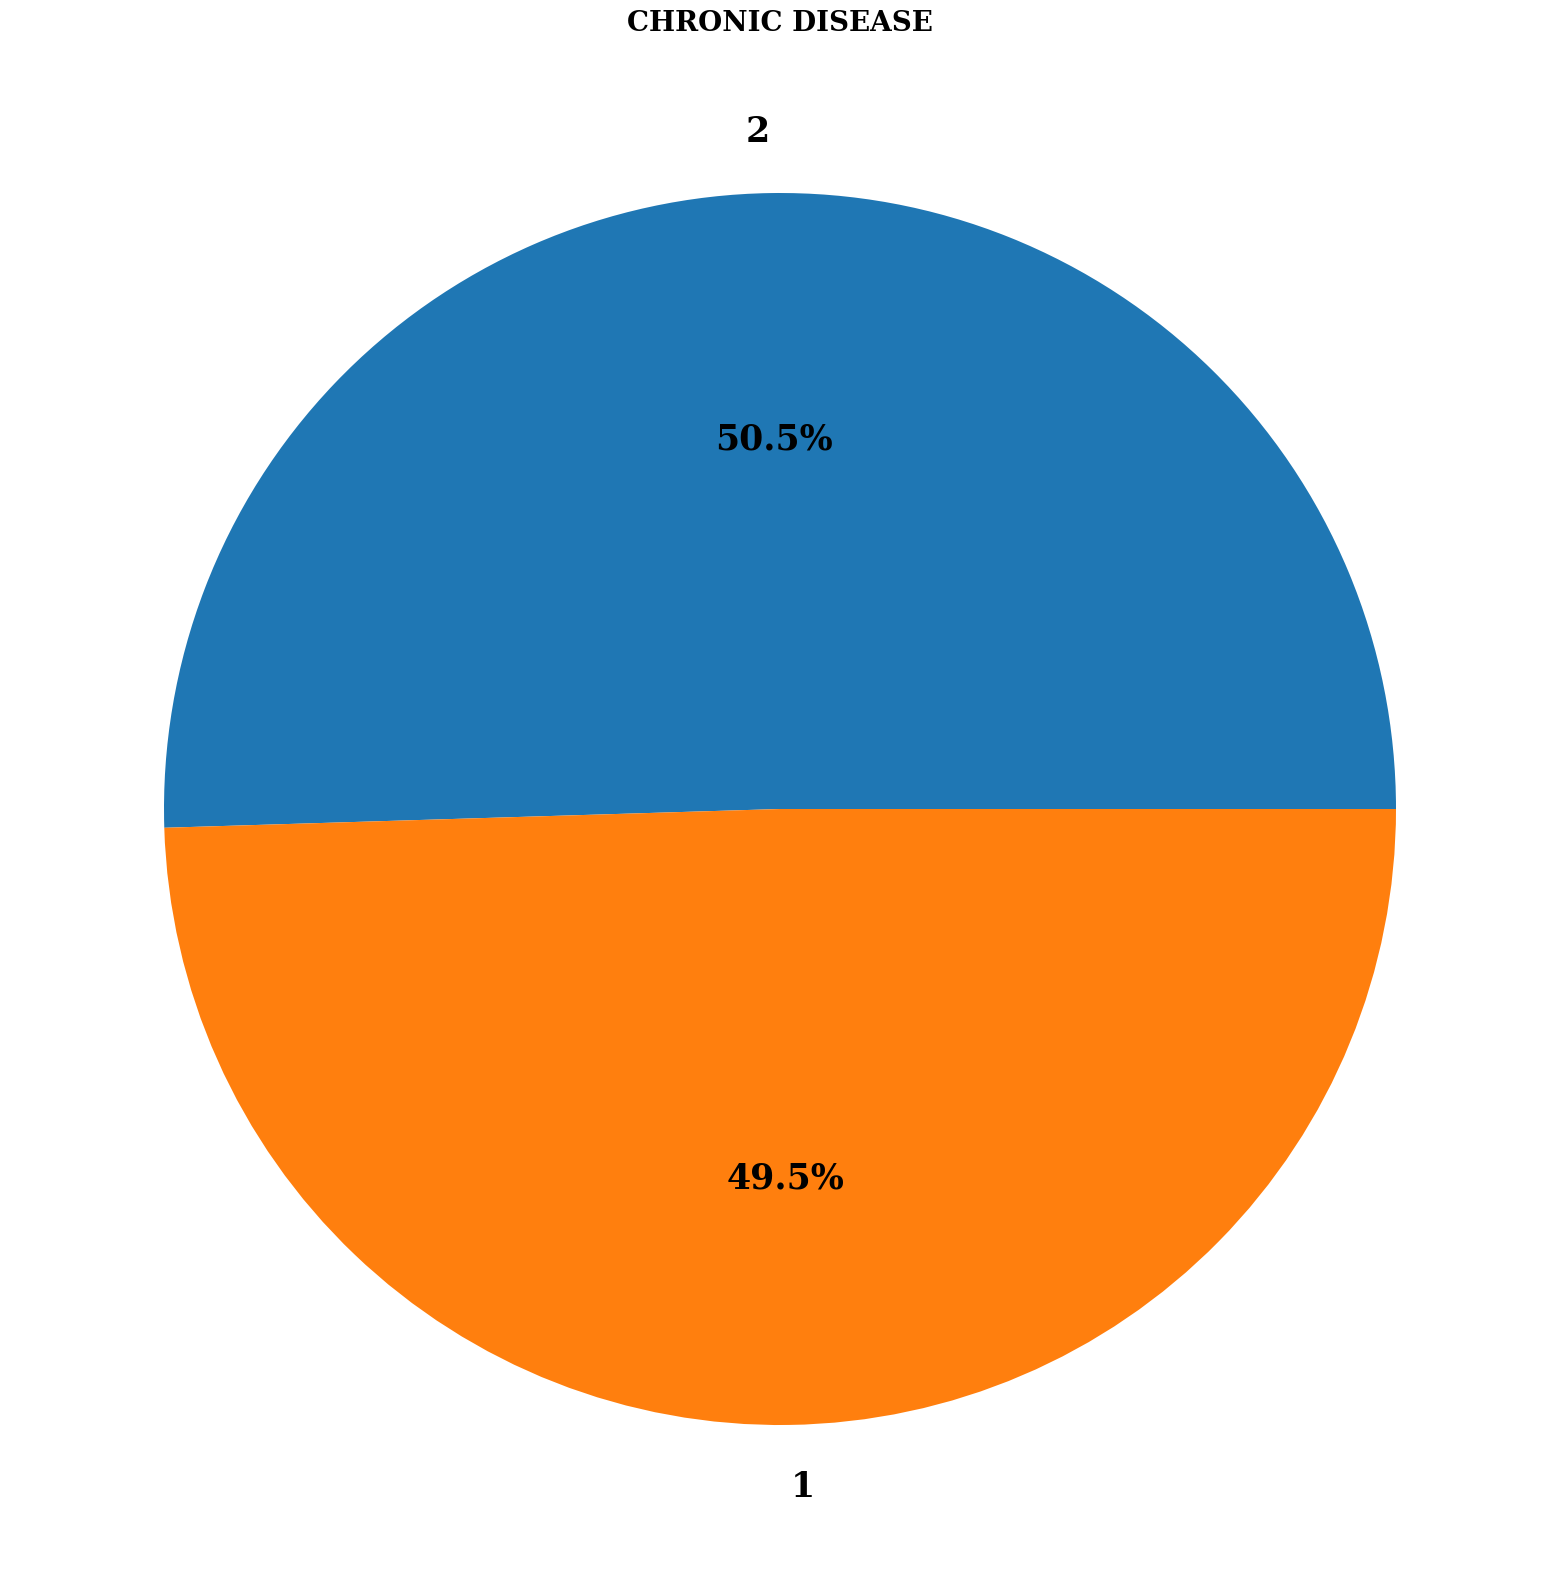

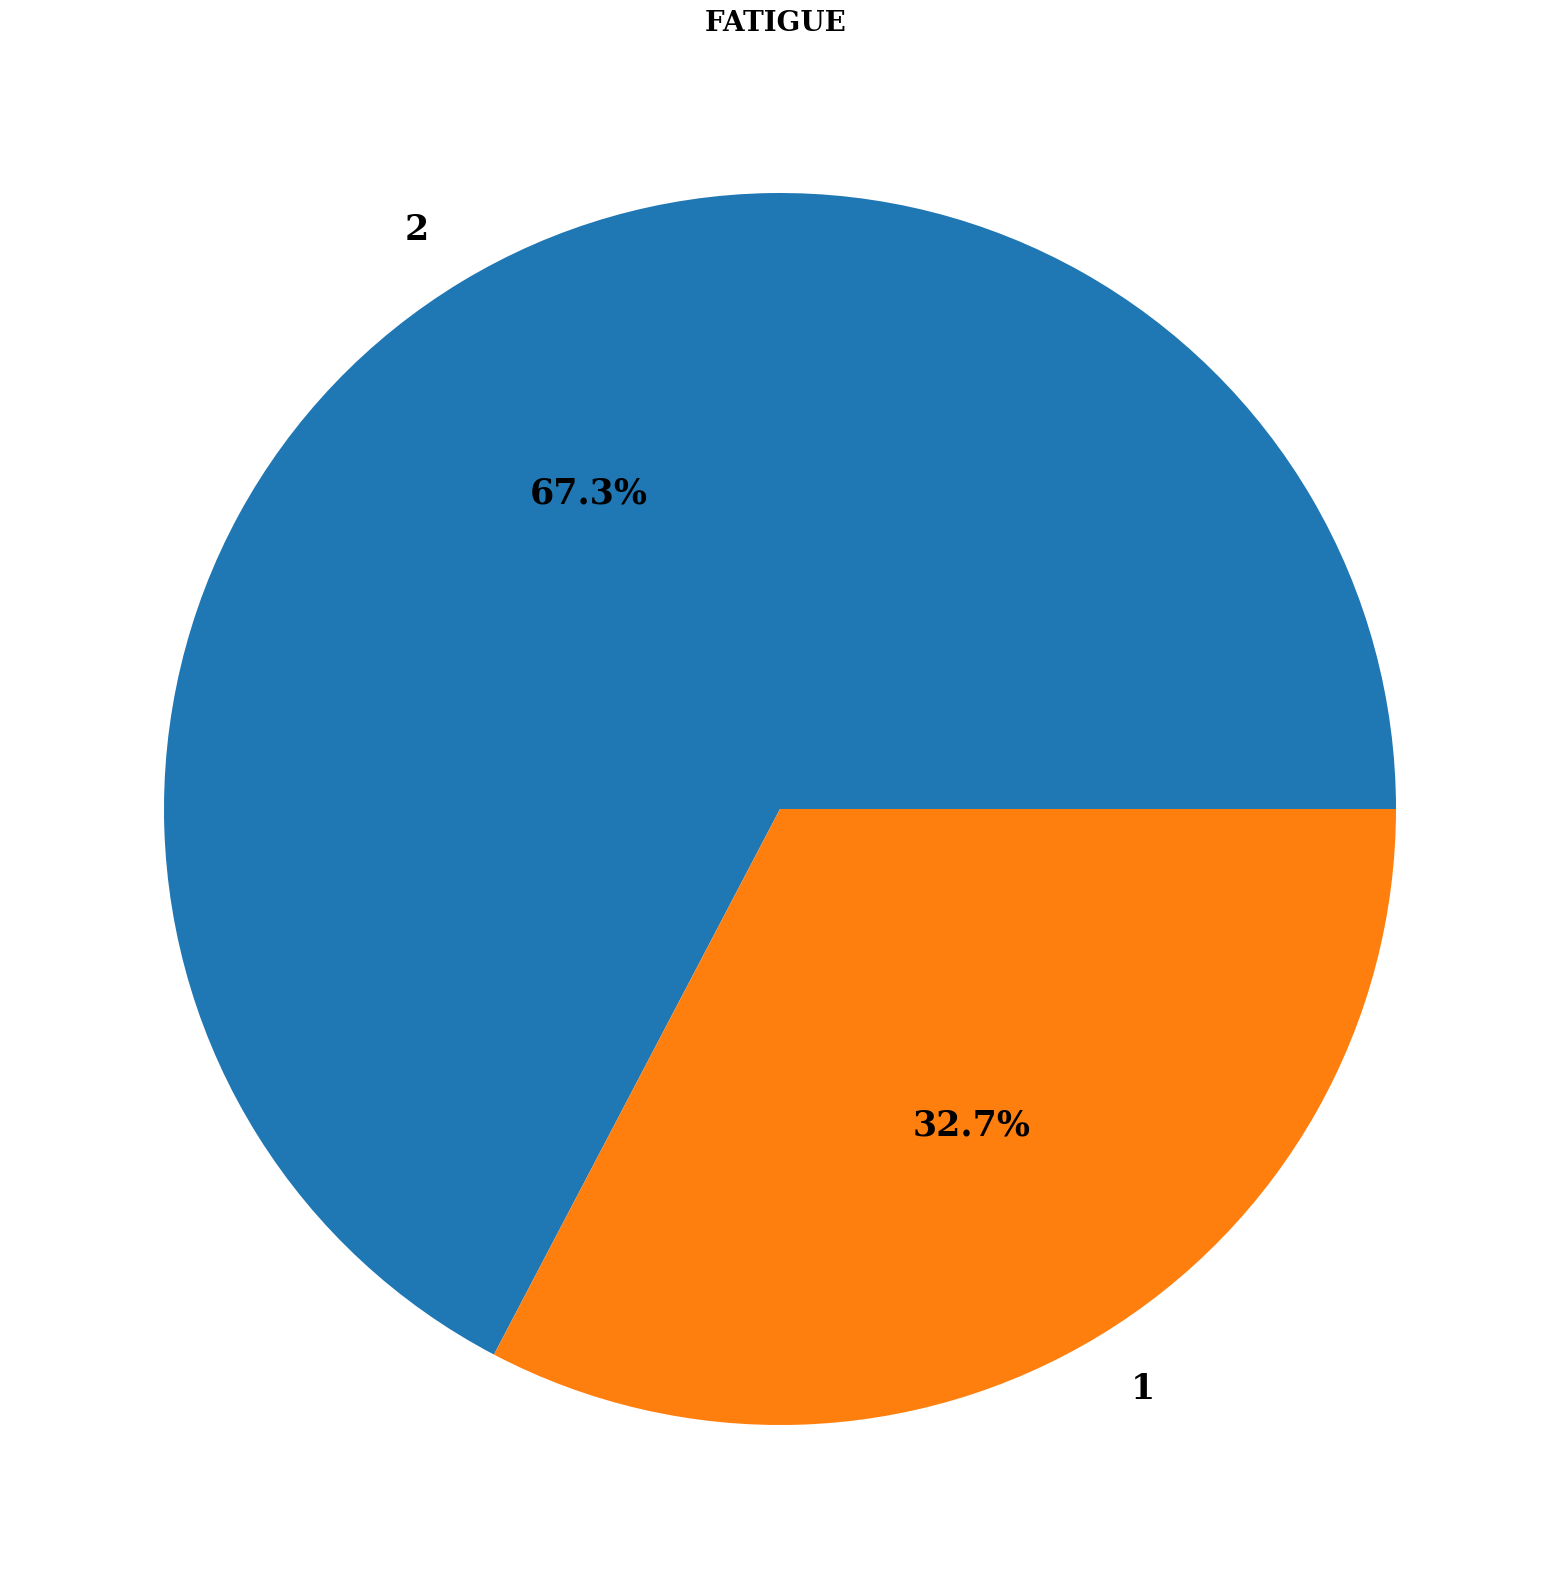

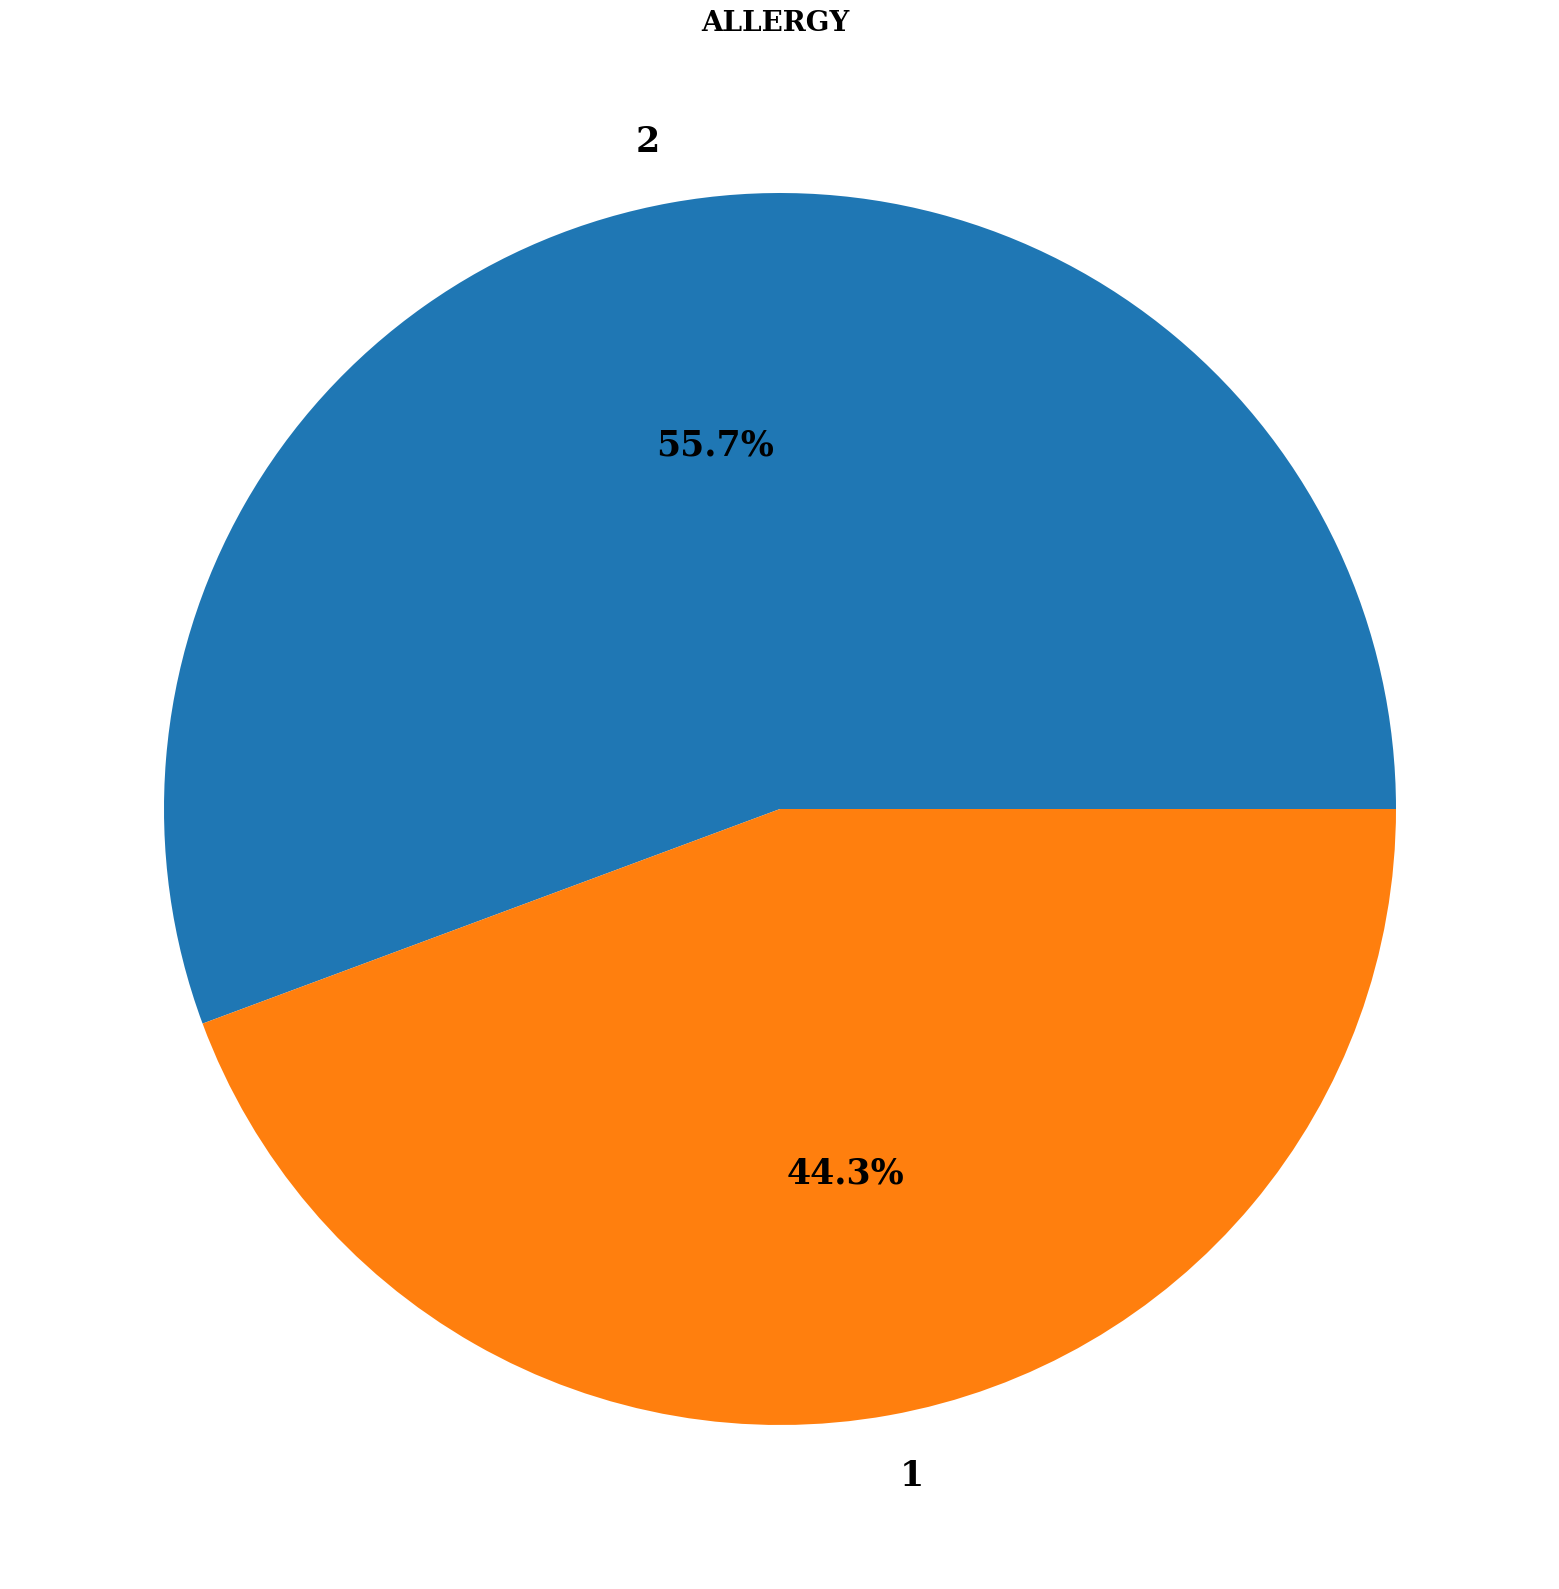

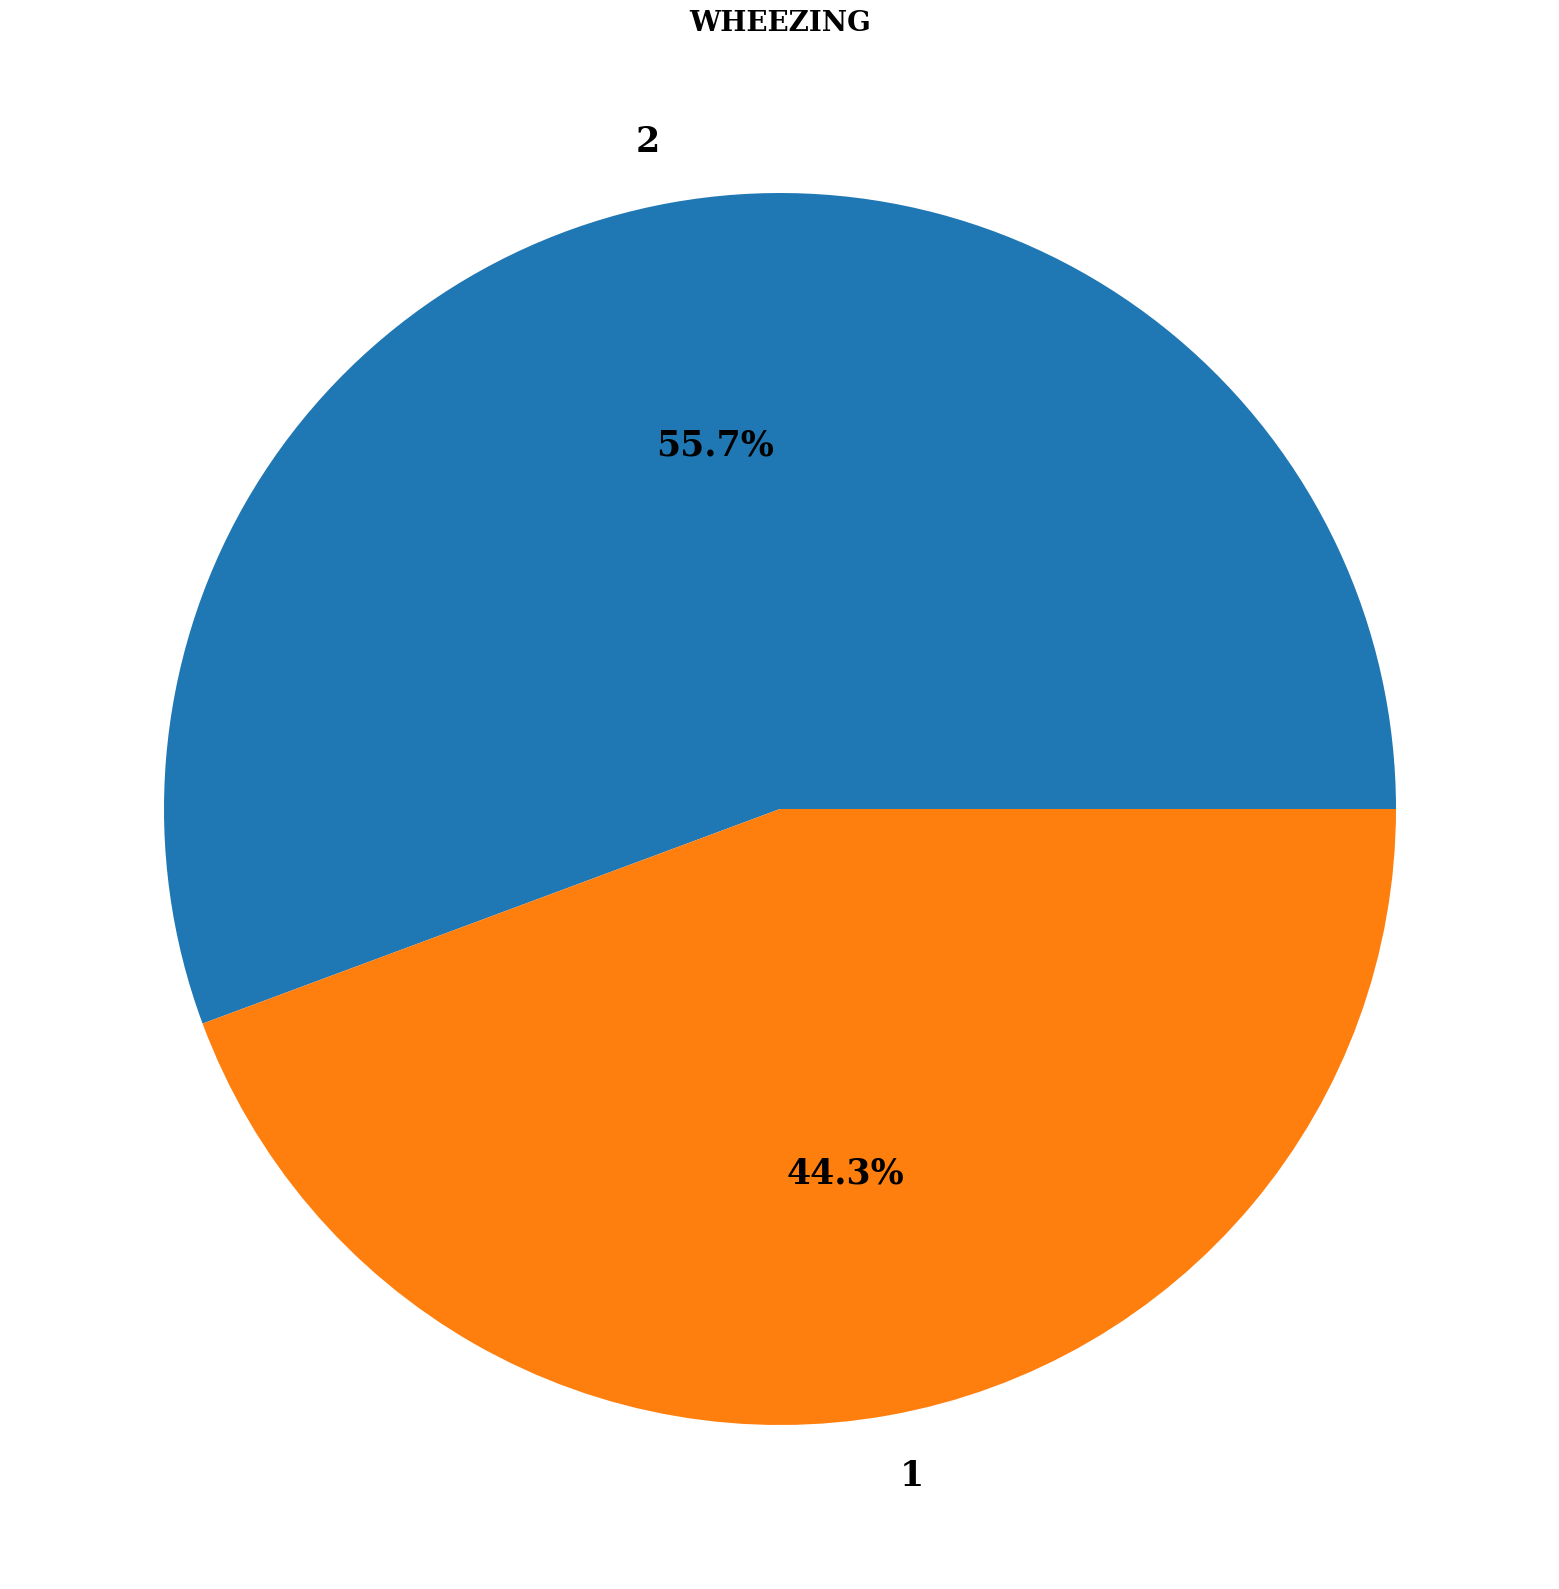

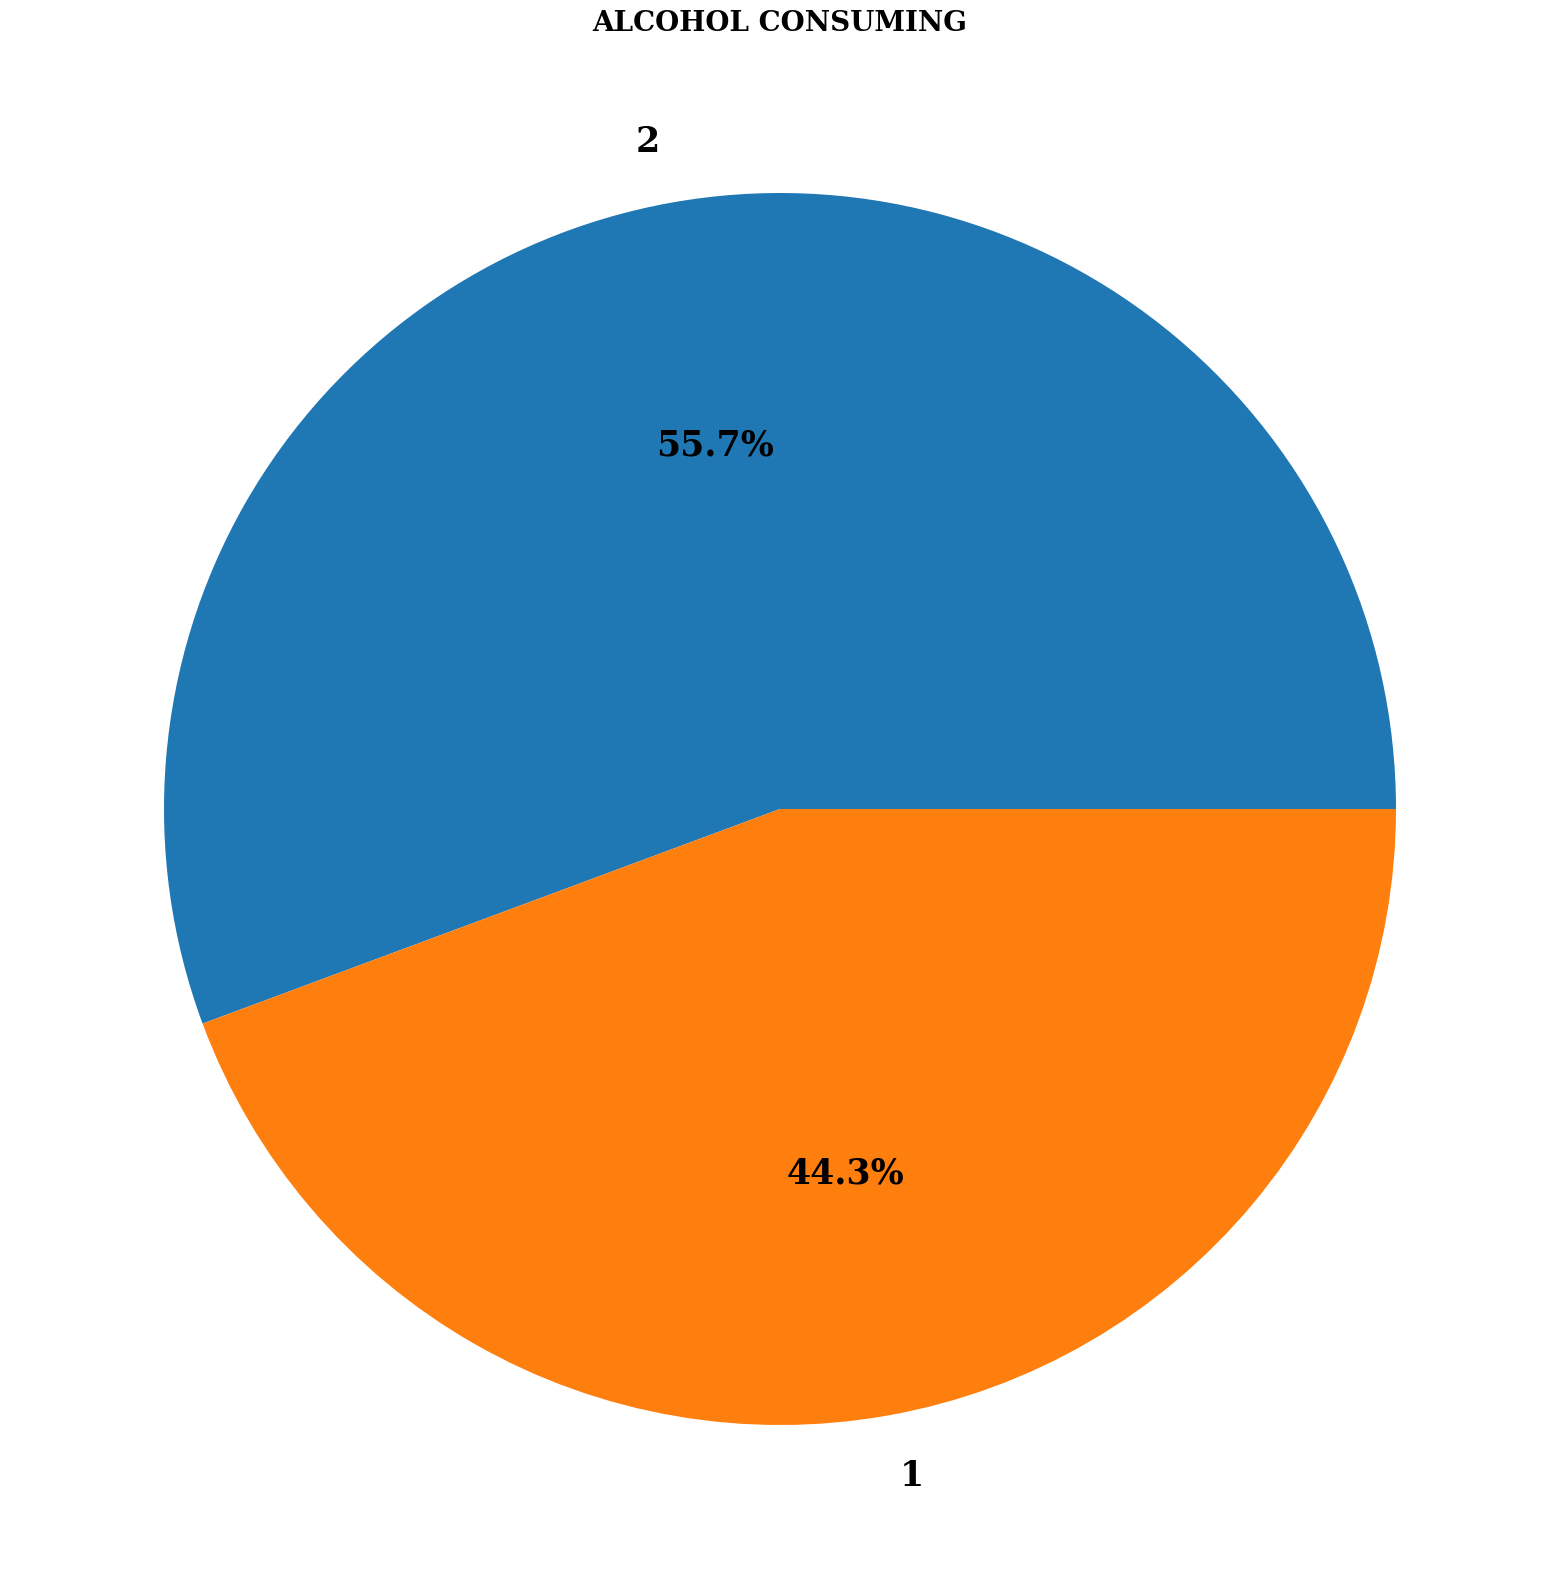

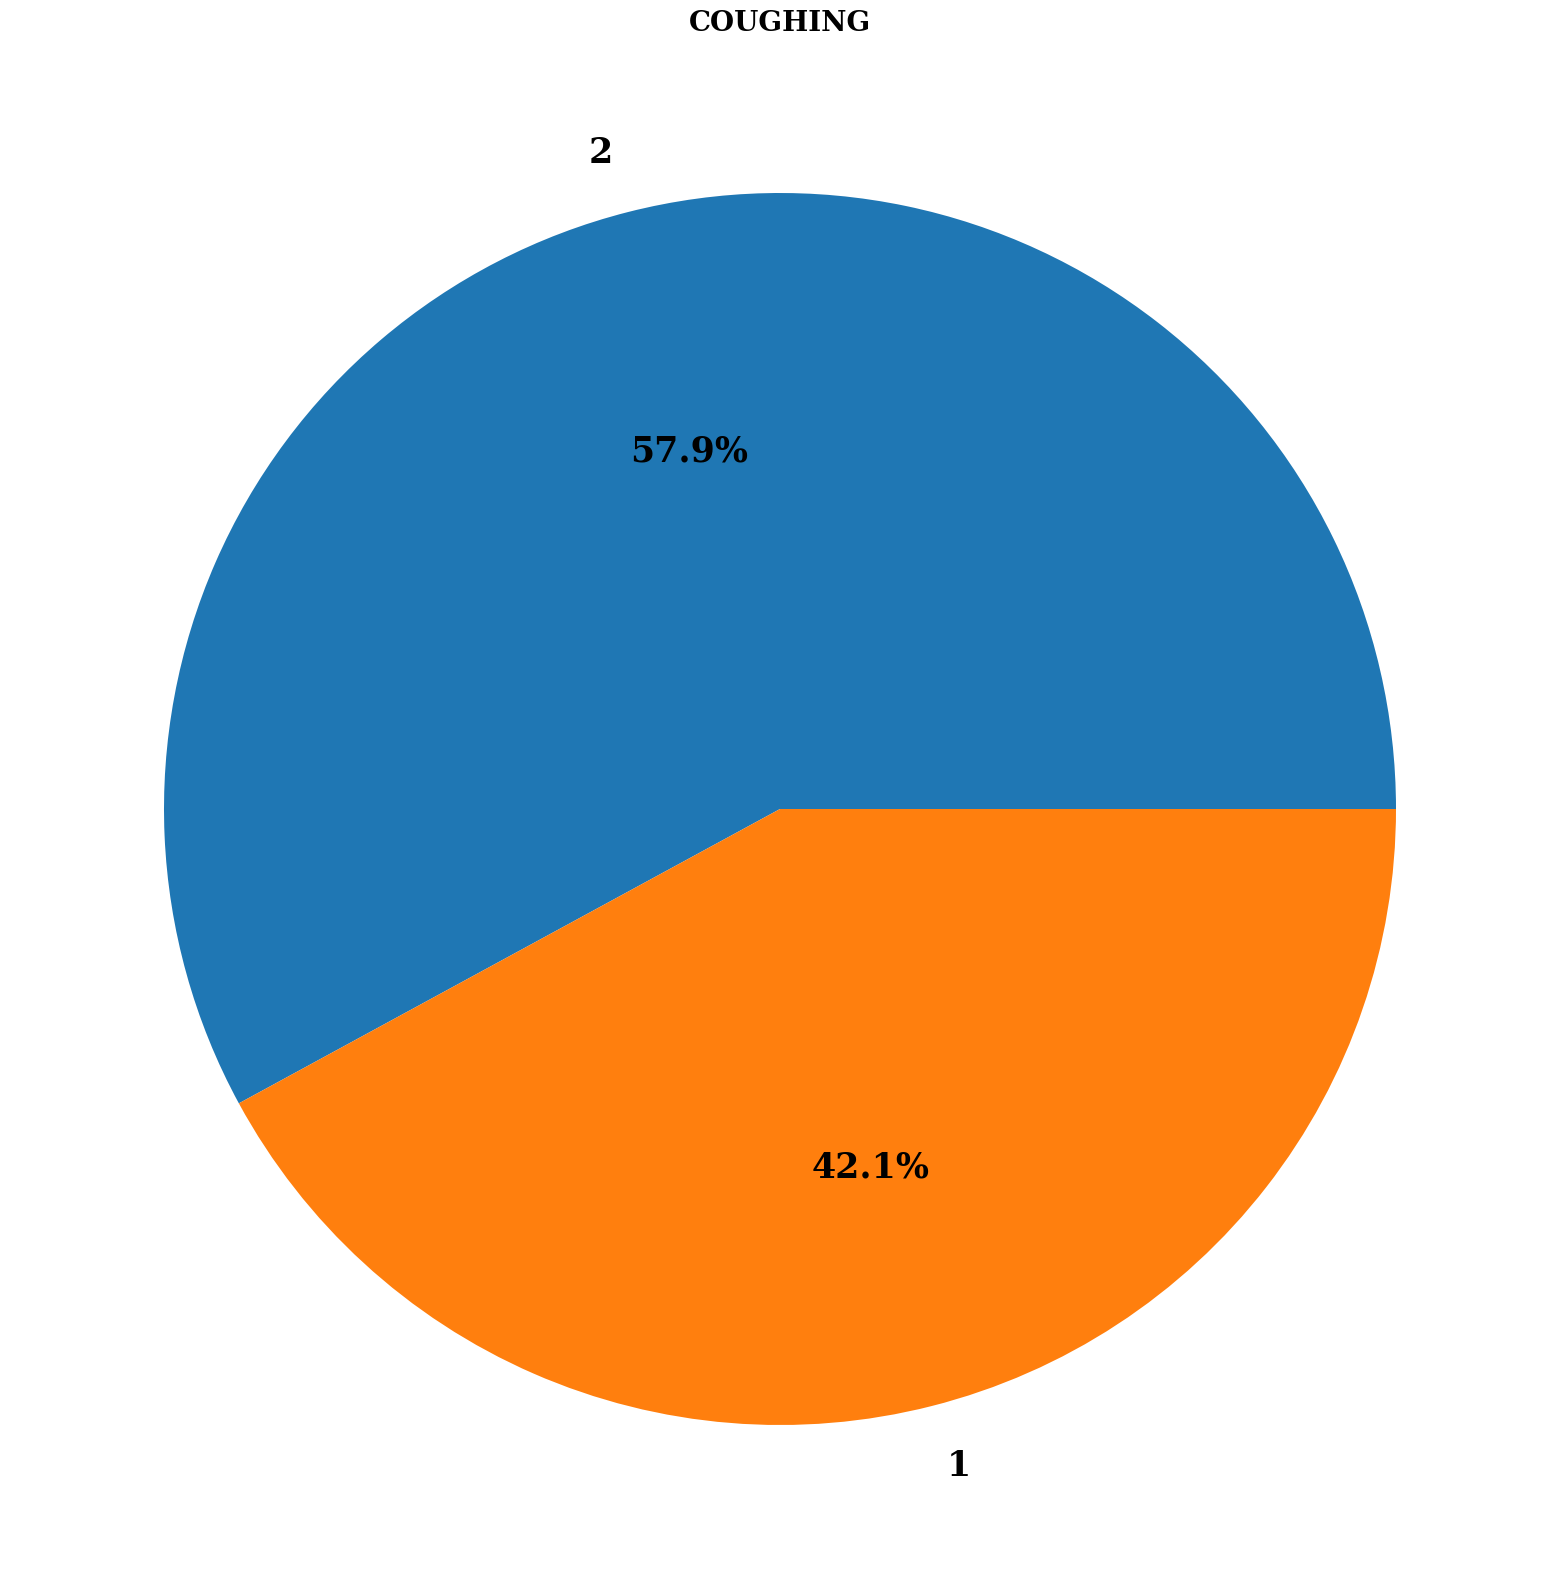

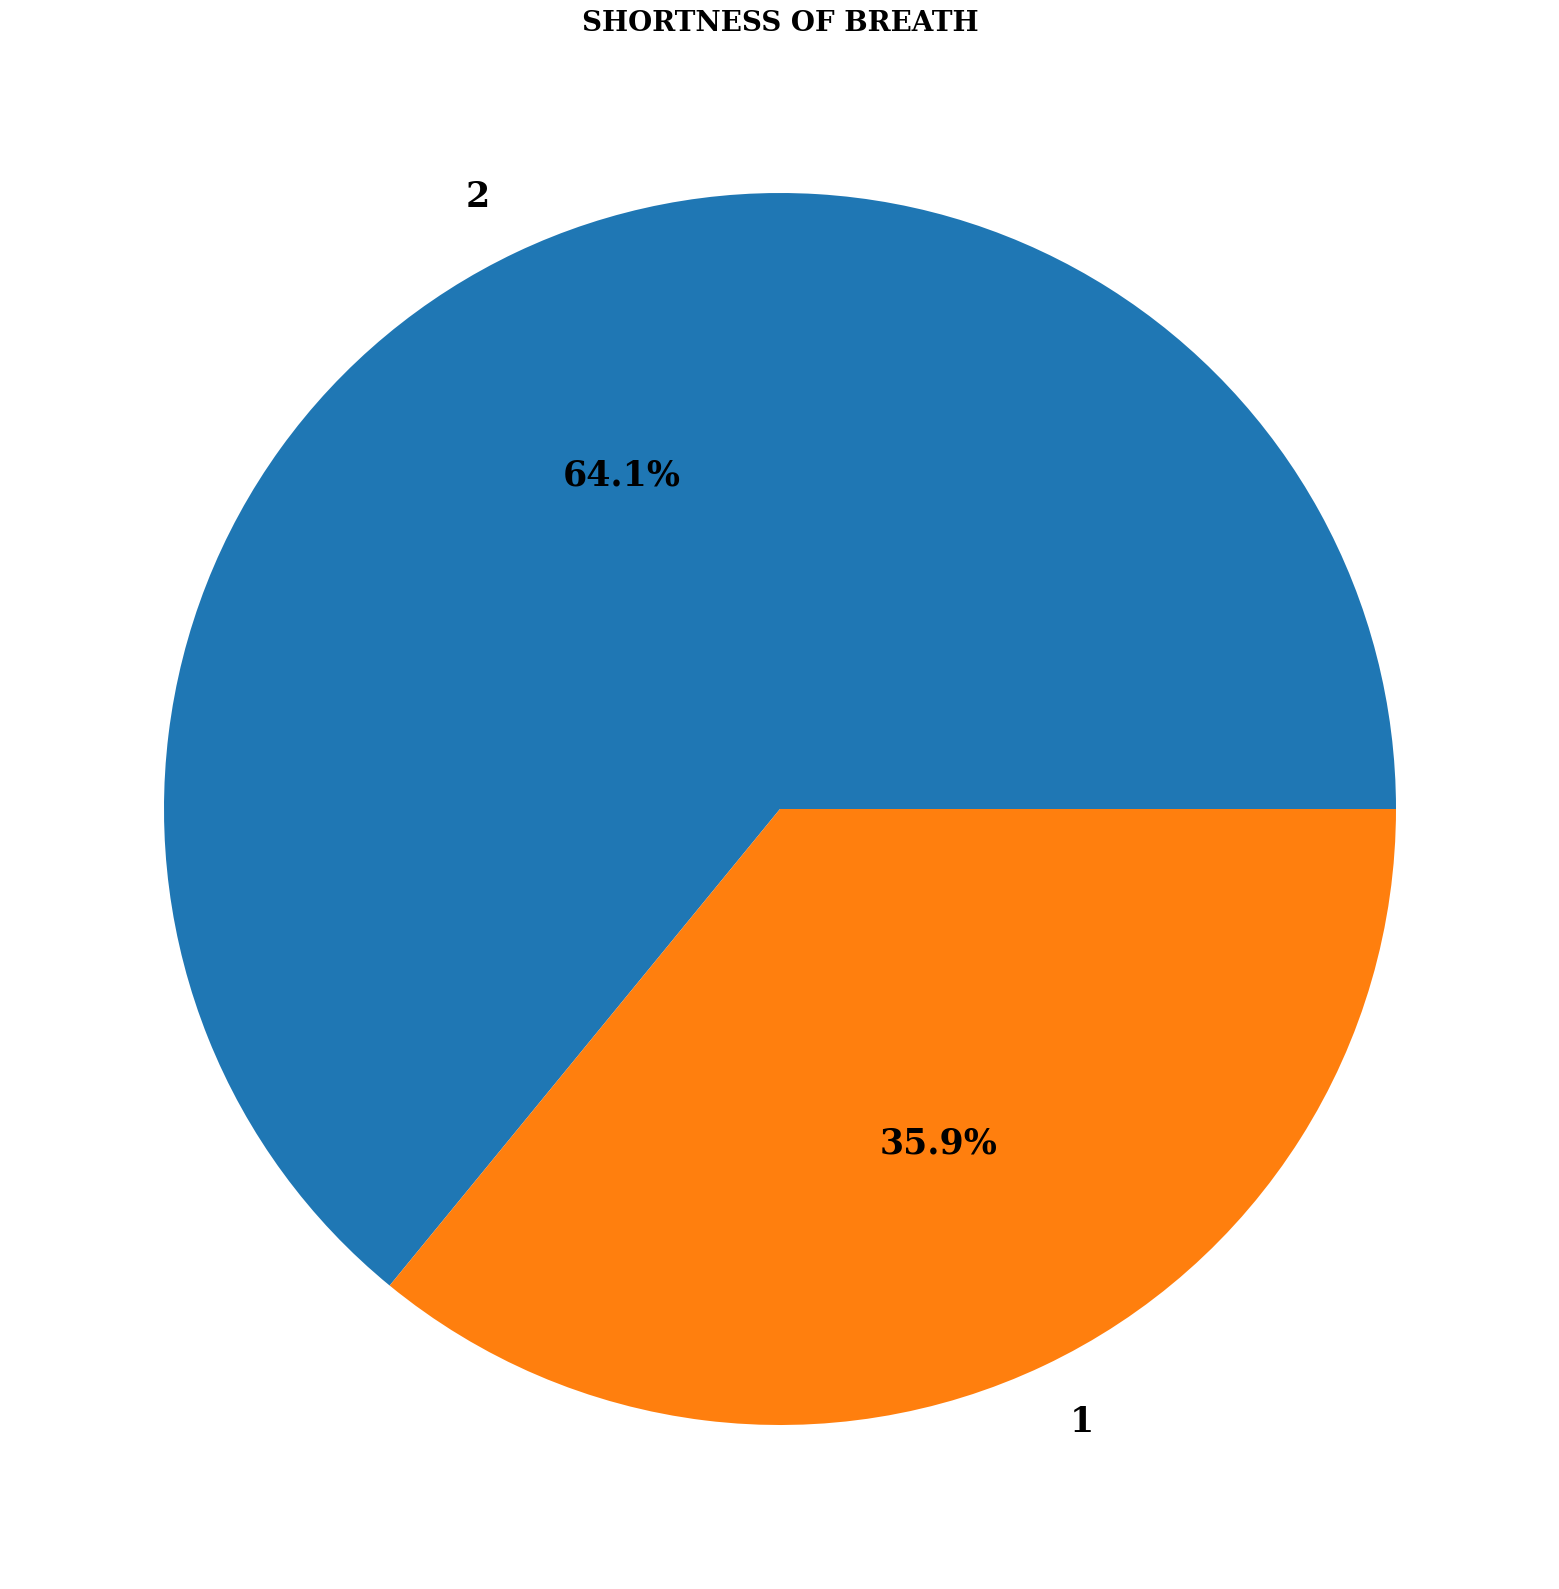

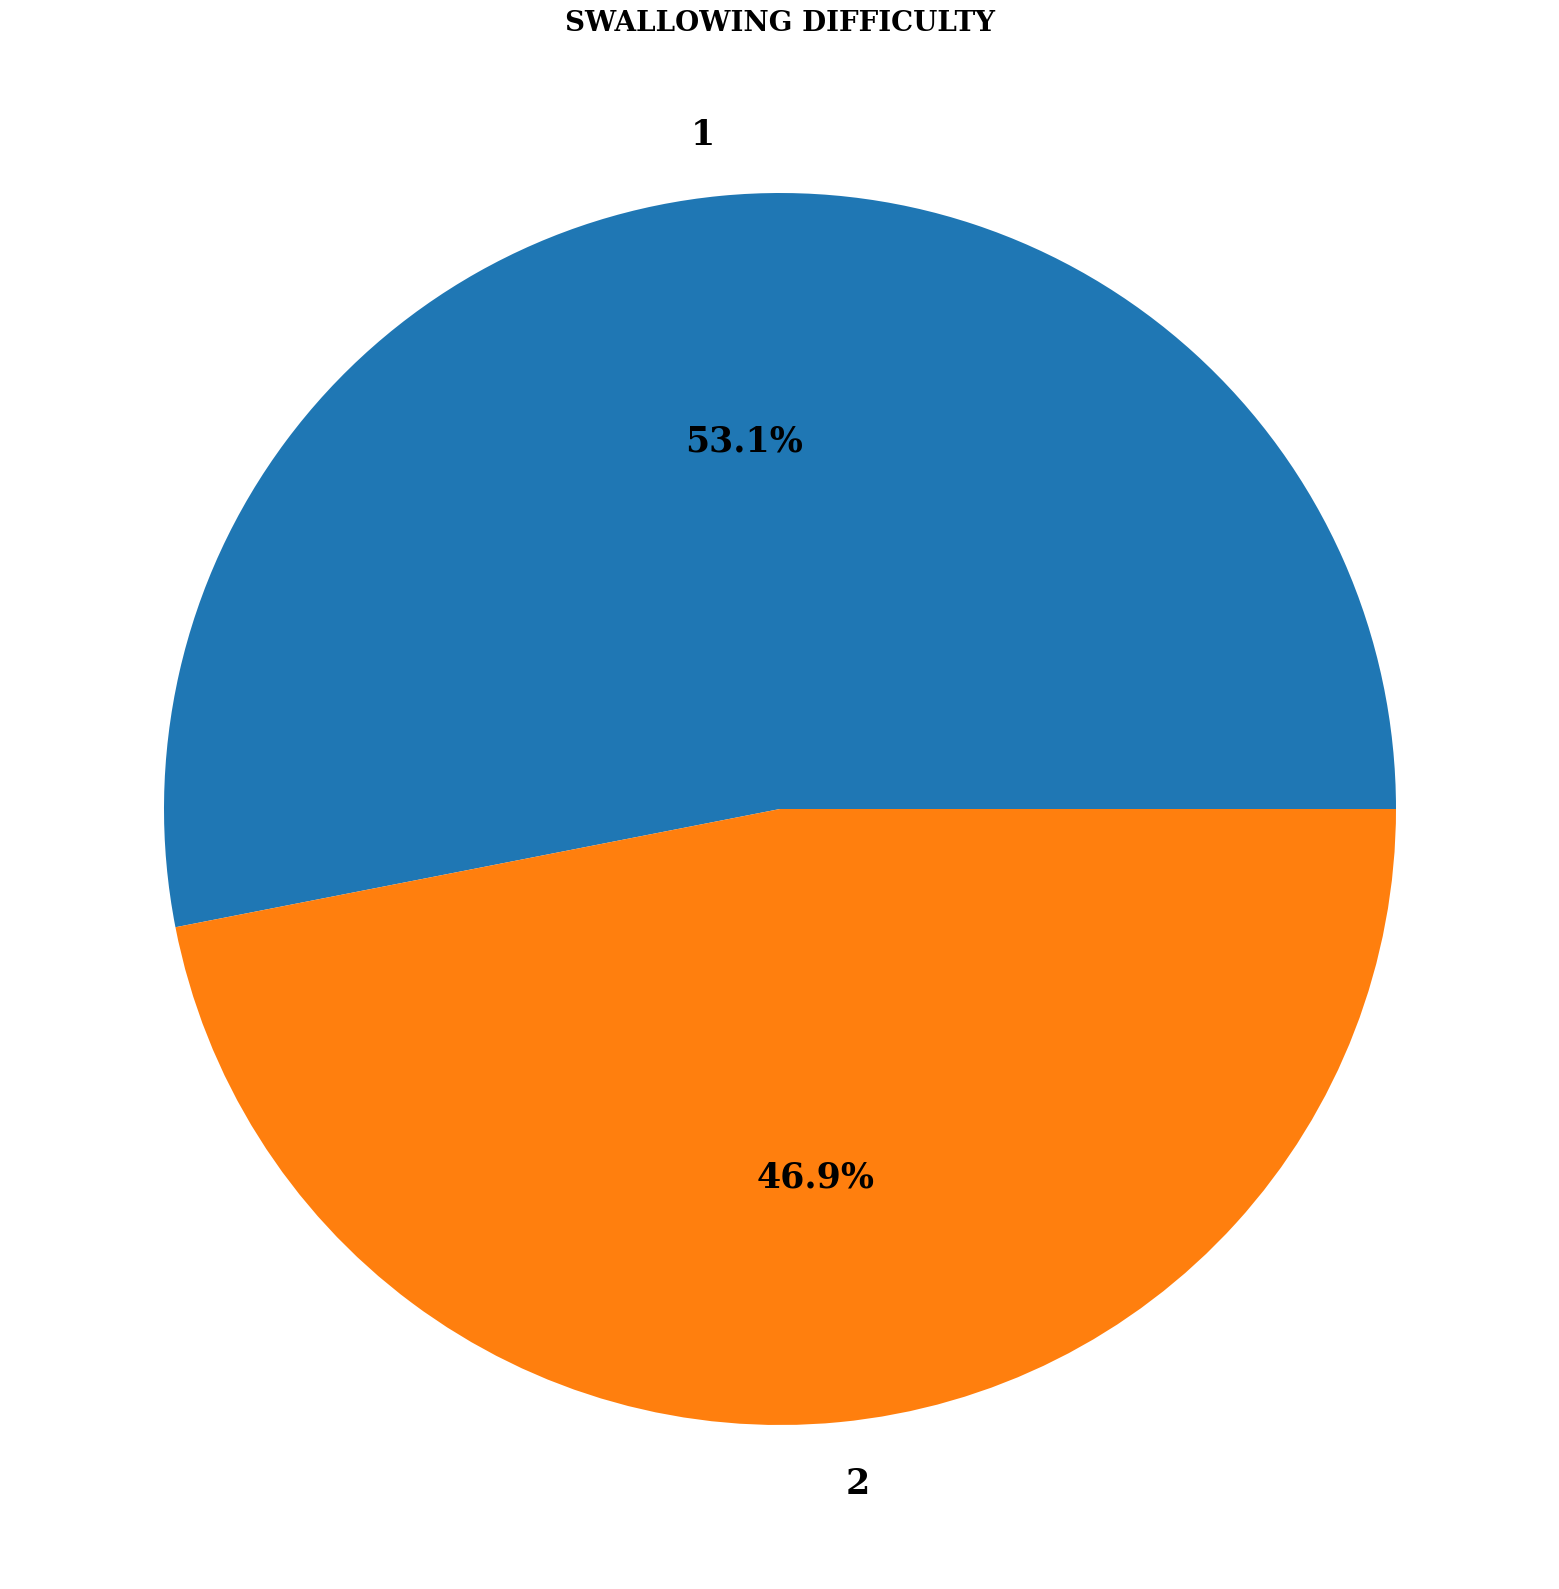

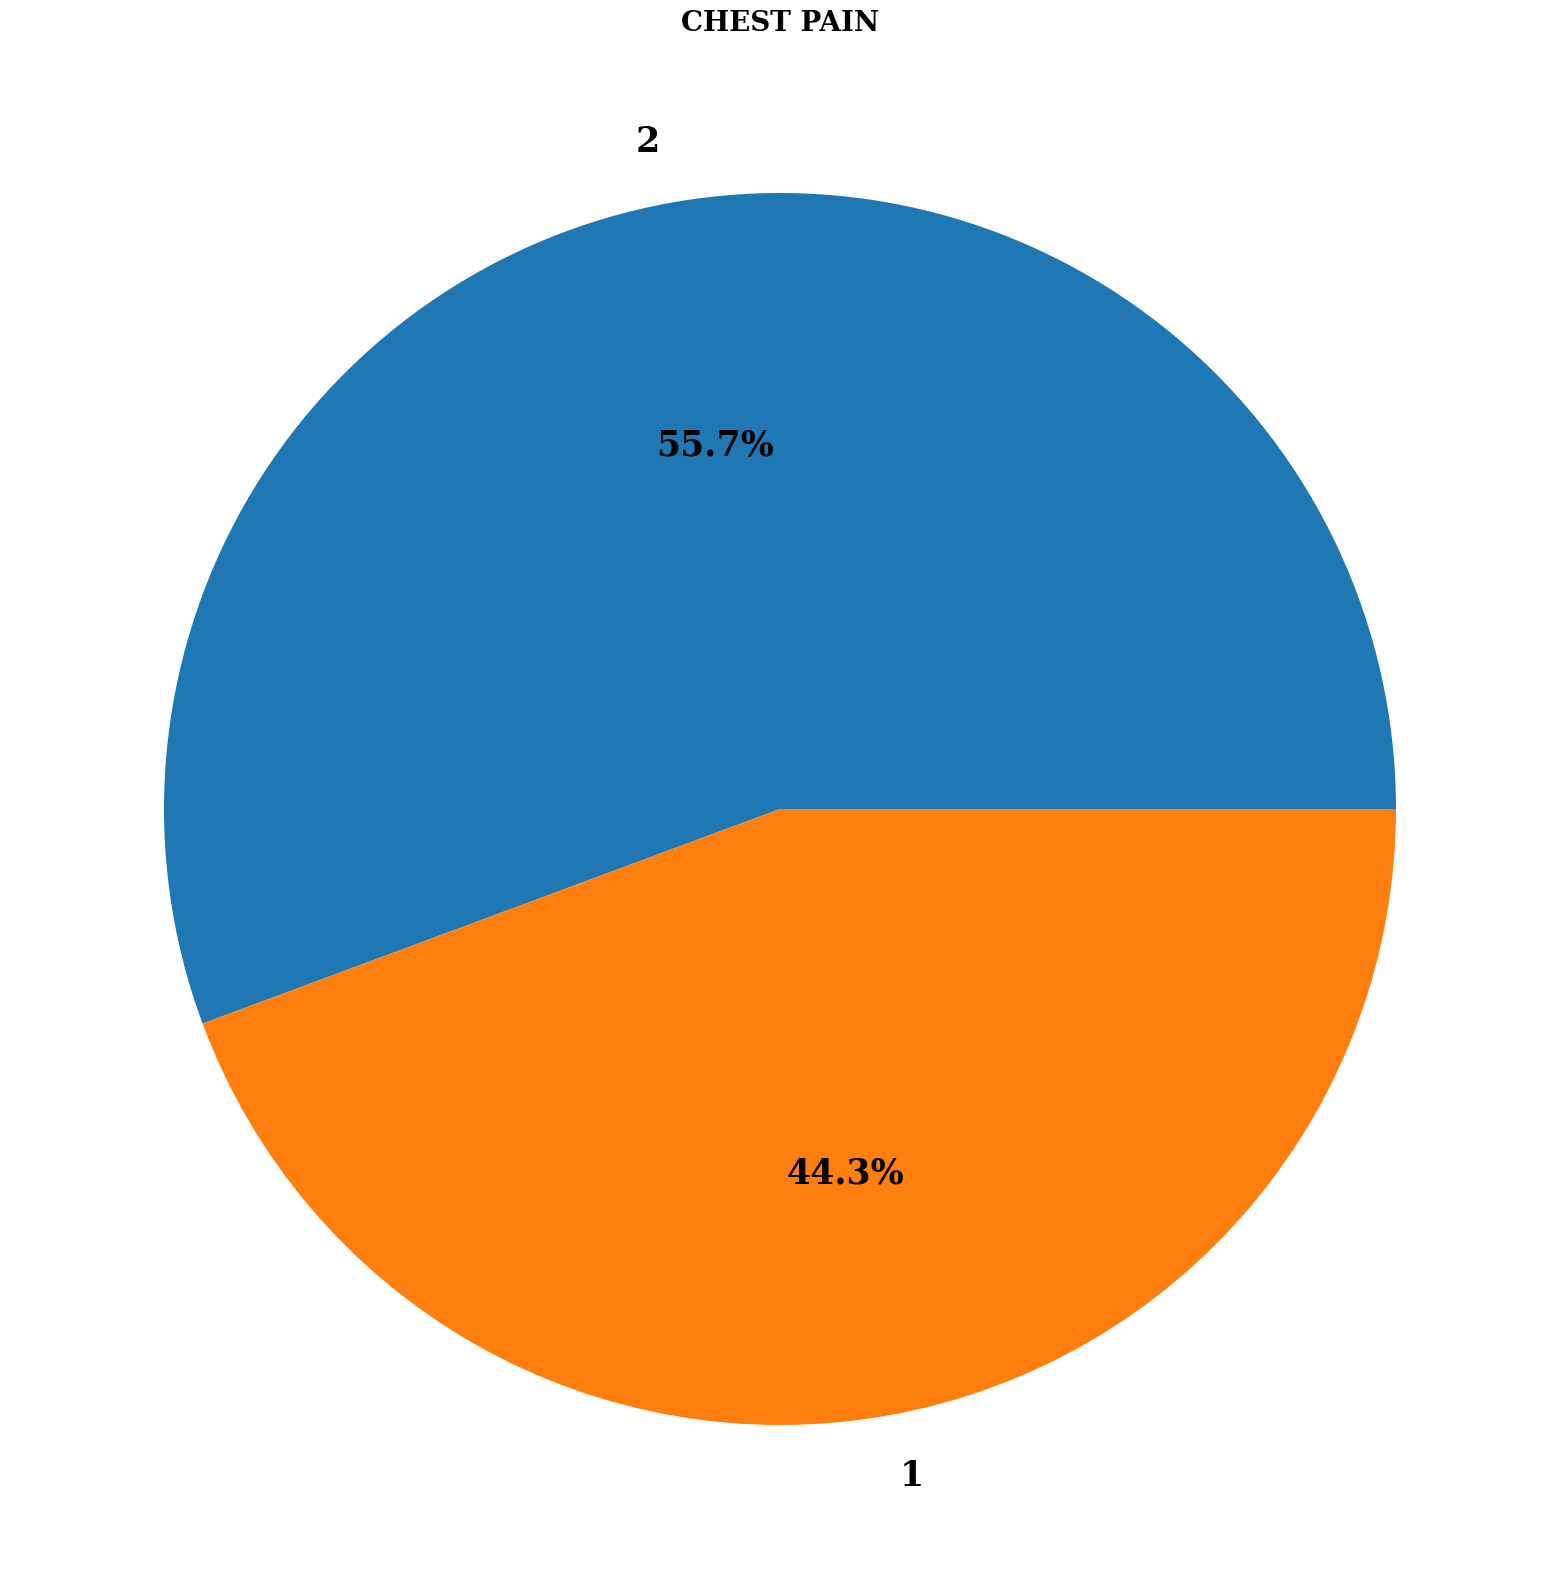

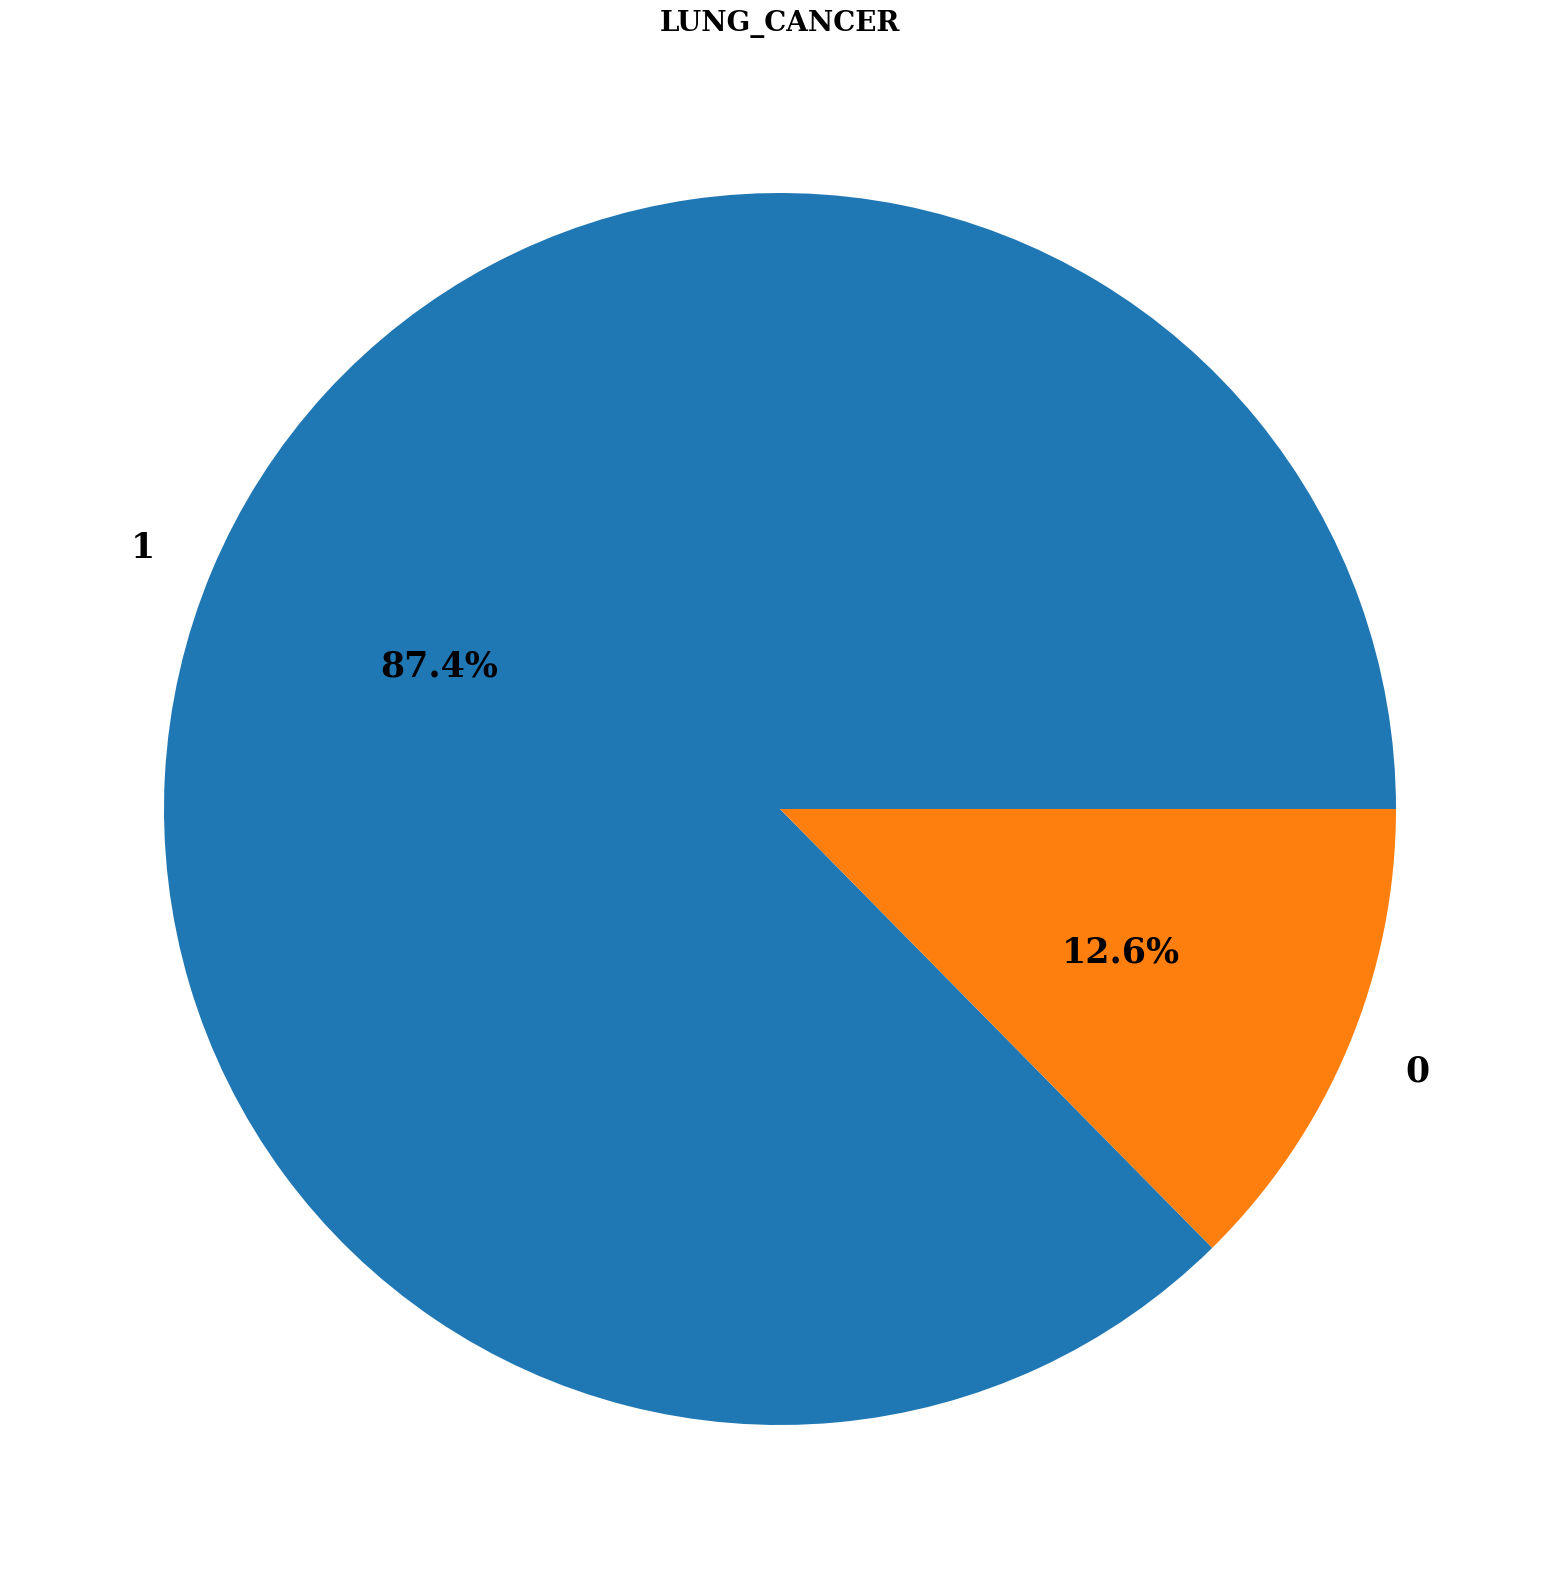

In [22]:
for i in df.columns:
    plt.figure(figsize=(30,20)) 
    plt.pie(df[i].value_counts(), labels=df[i].value_counts().index, autopct='%1.1f%%', textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' }) 
    hfont = {'fontname':'serif', 'weight': 'bold'}
    plt.title(i, size=20, **hfont) 
    plt.show()

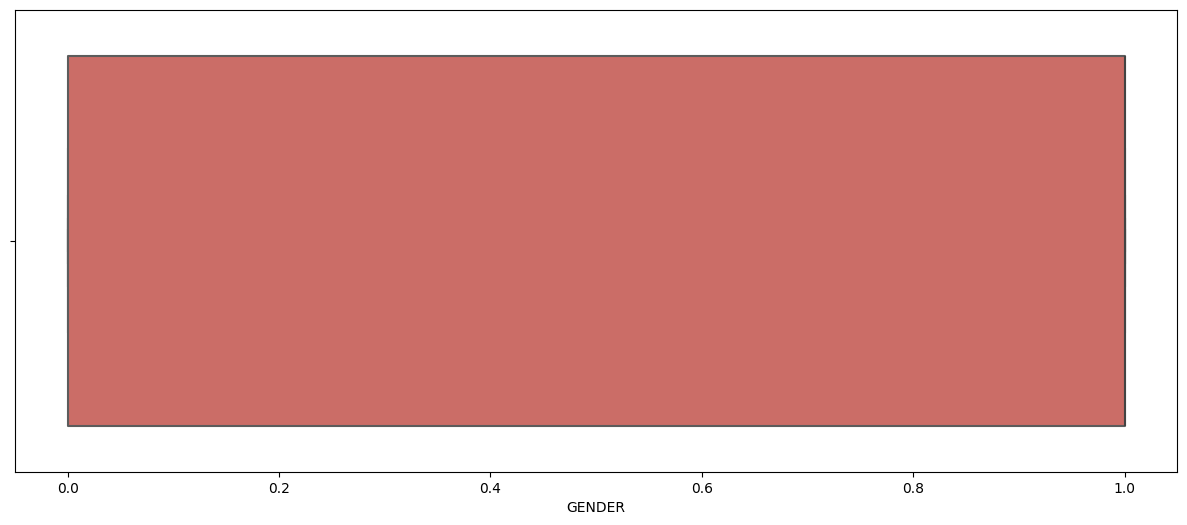

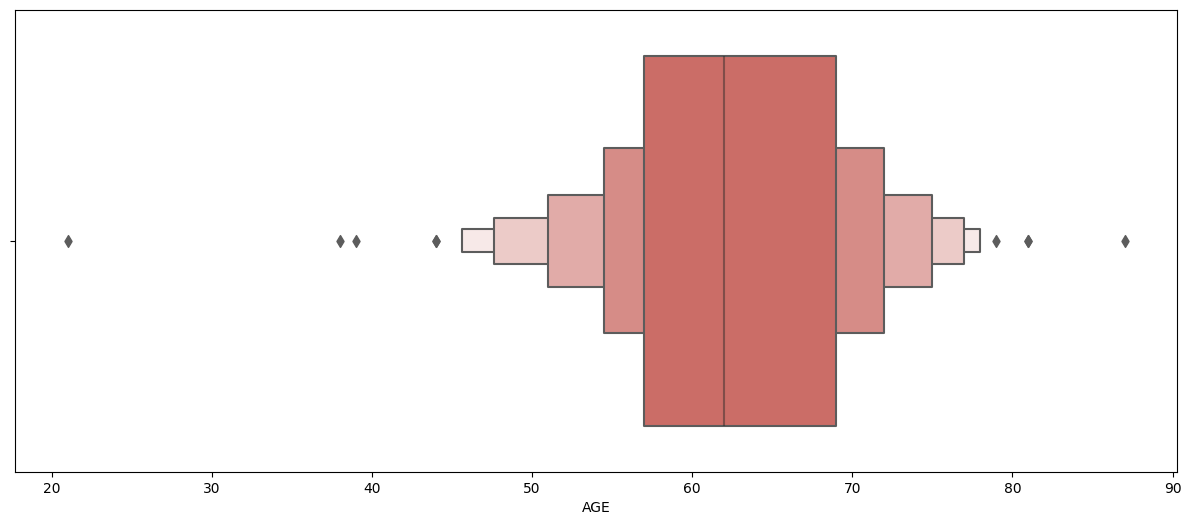

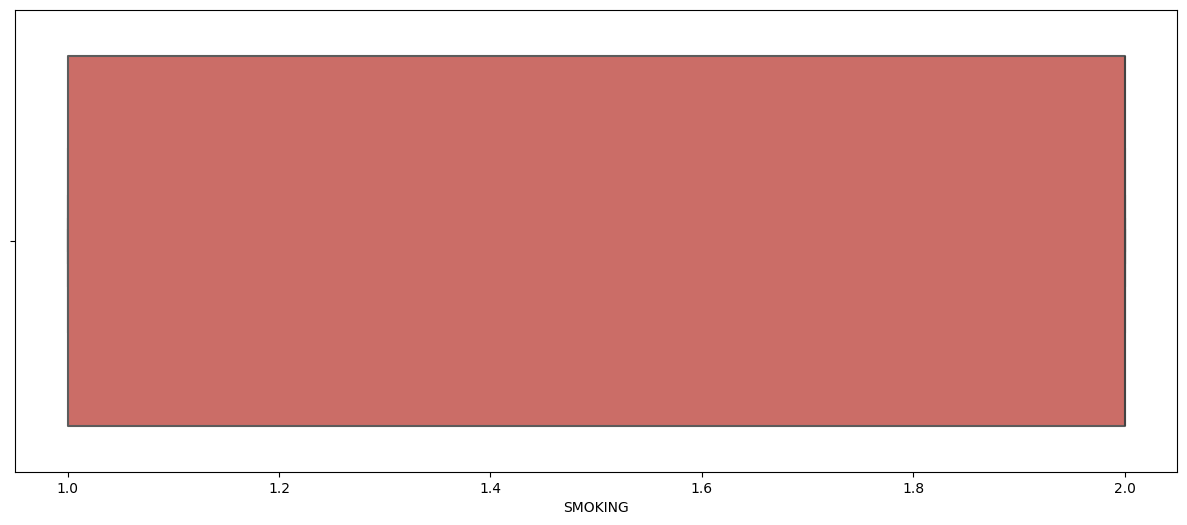

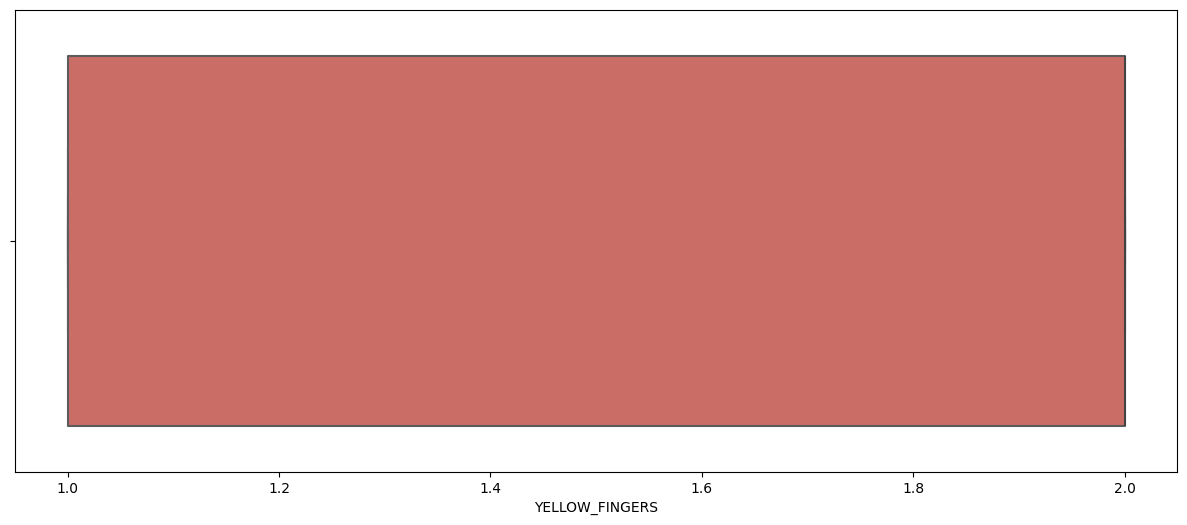

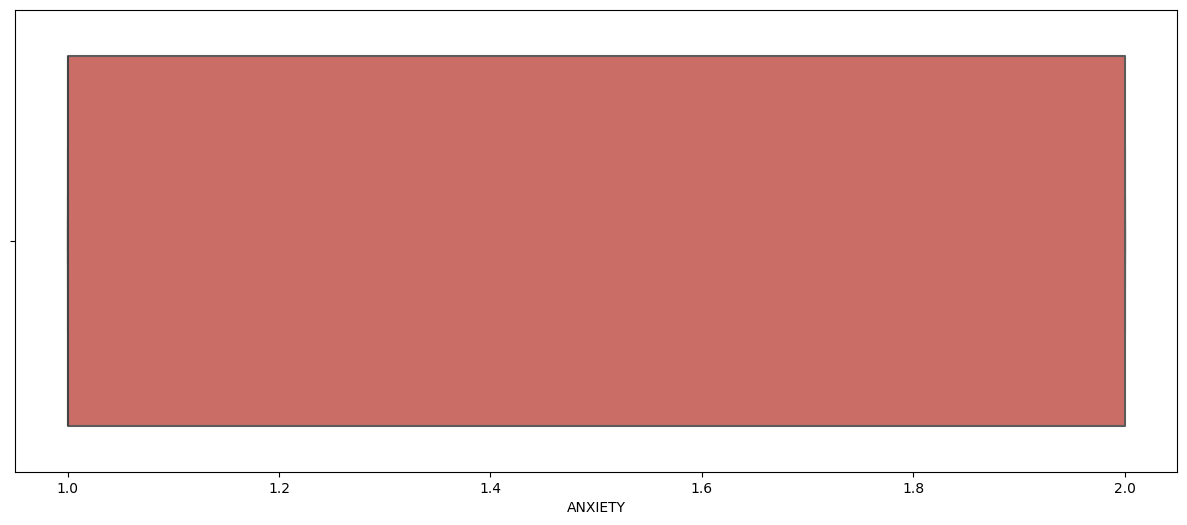

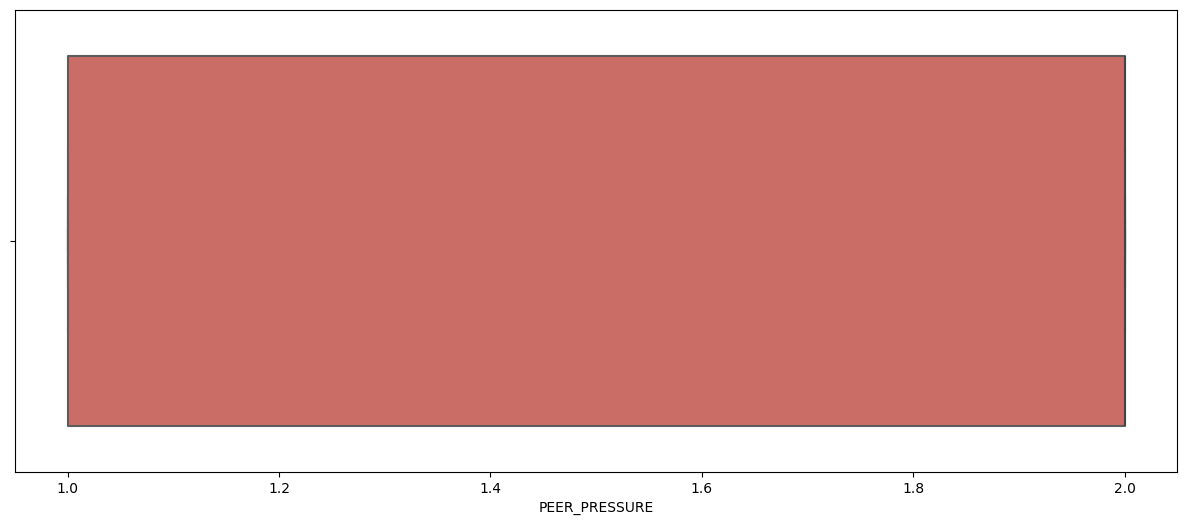

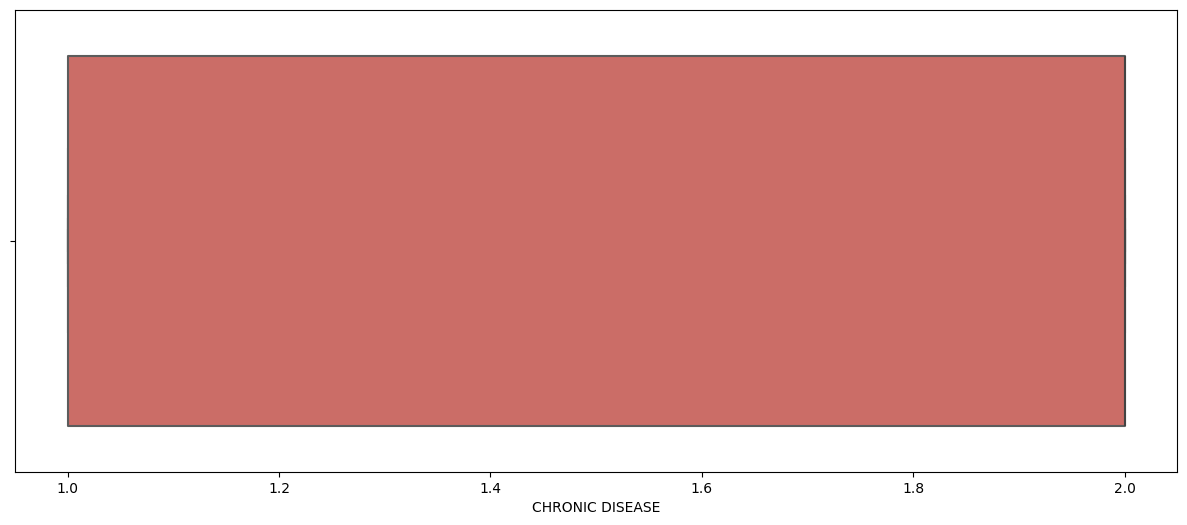

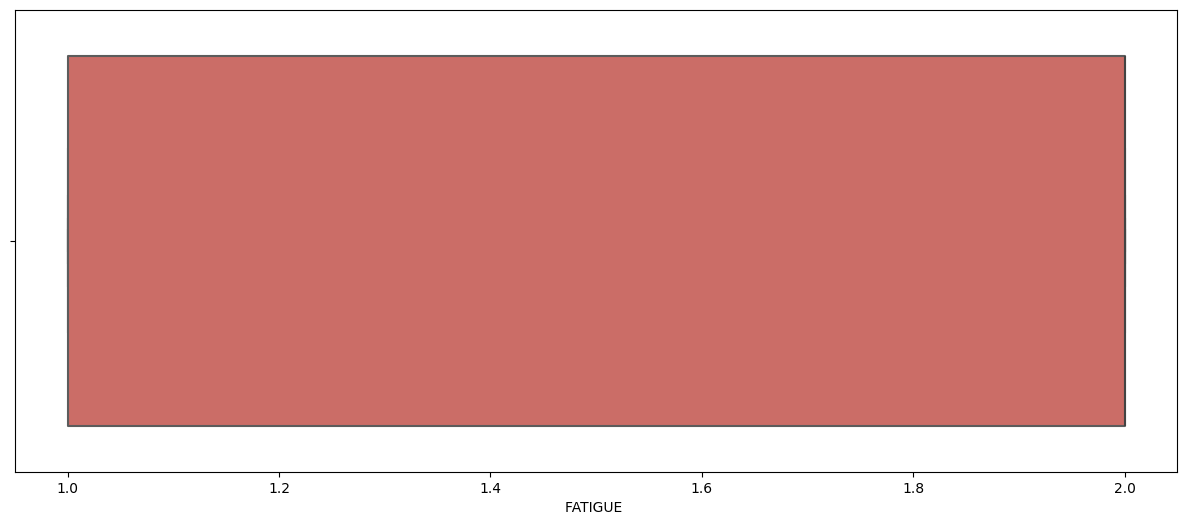

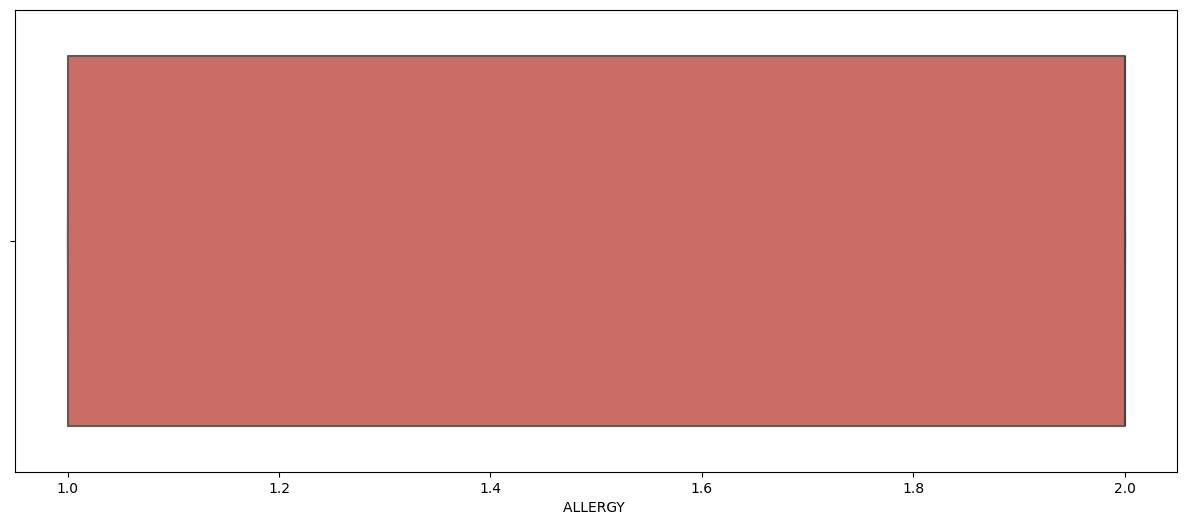

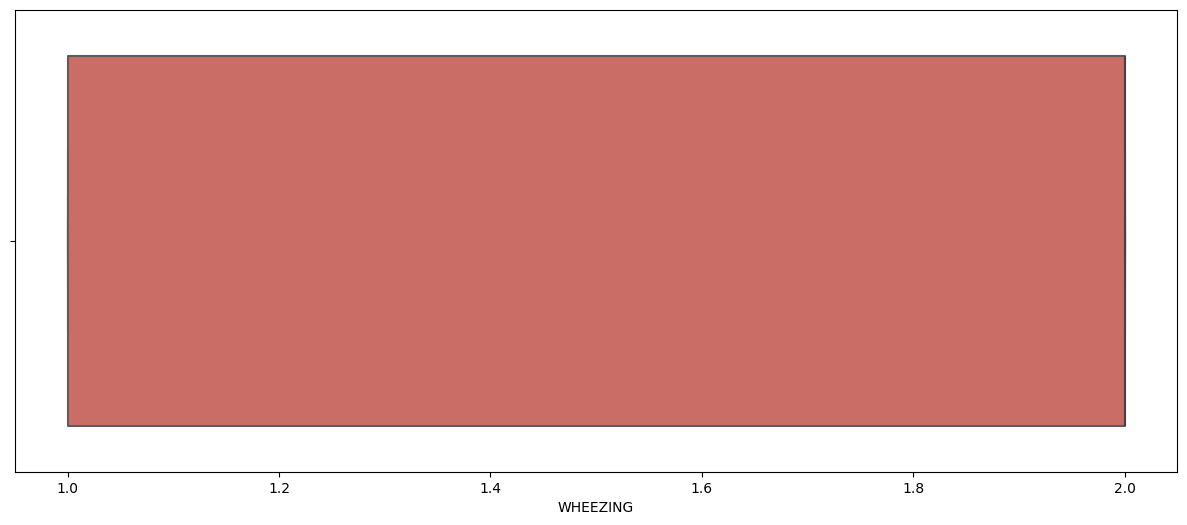

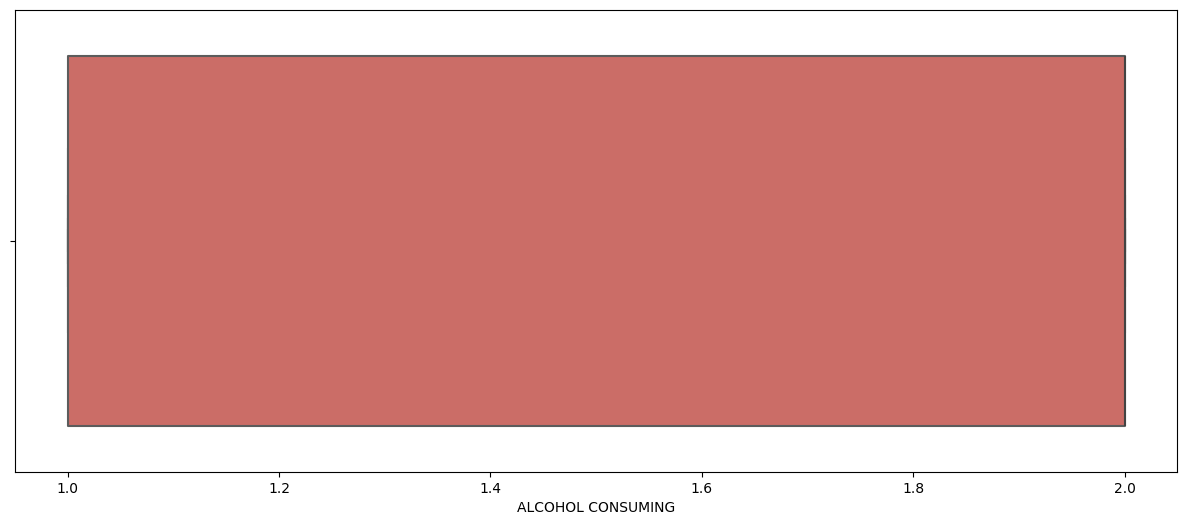

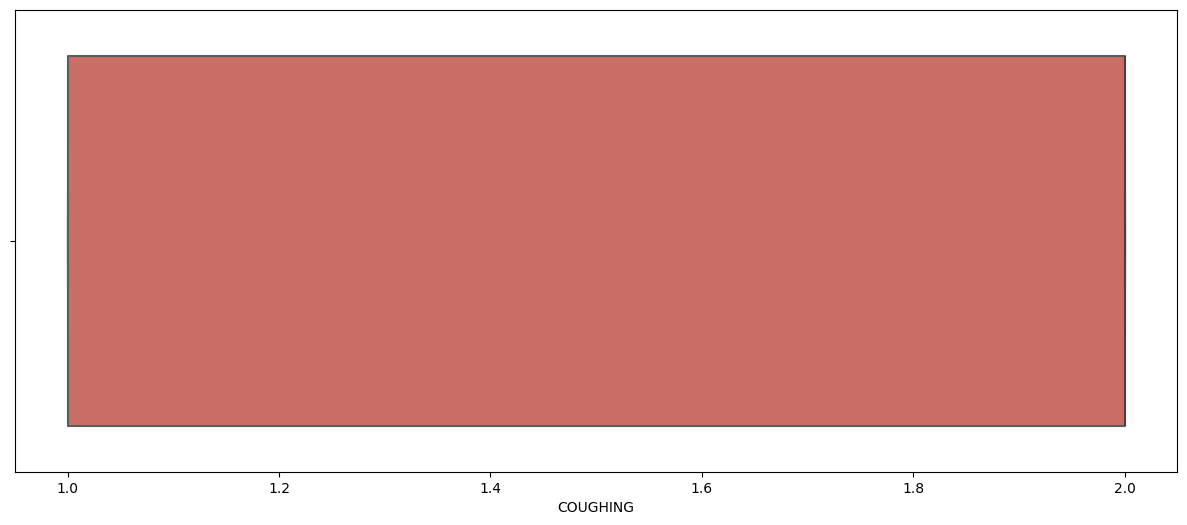

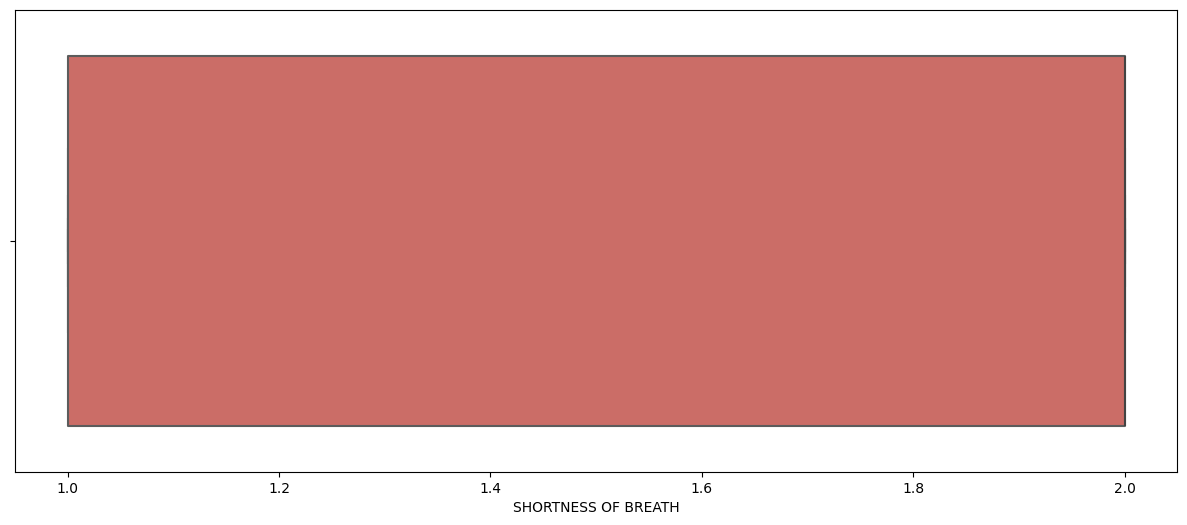

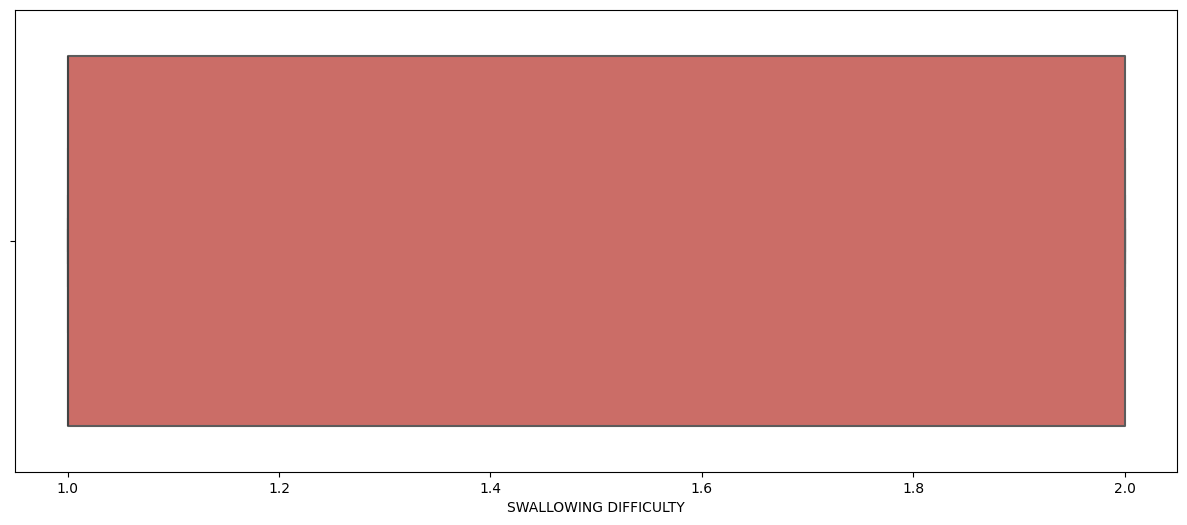

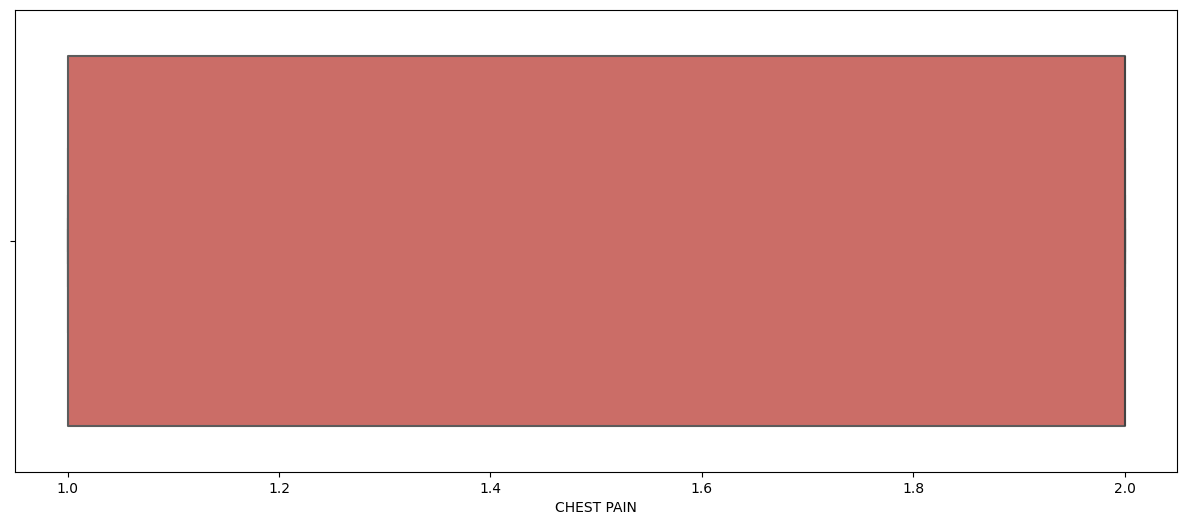

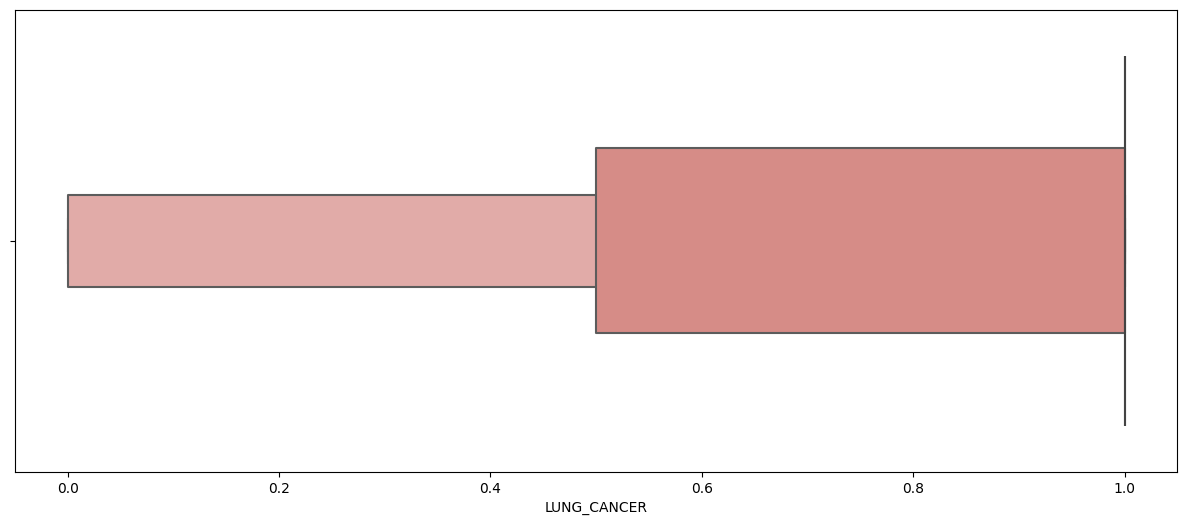

In [24]:
for i in df:
    plt.figure(figsize=(15,6))
    sns.boxenplot(x =df[i], data = df, palette = 'hls')
    plt.show()

C:\Users\sajid\AppData\Local\Temp\ipykernel_2416\1408848185.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot( x=df[i], data = df, palette = 'hls')


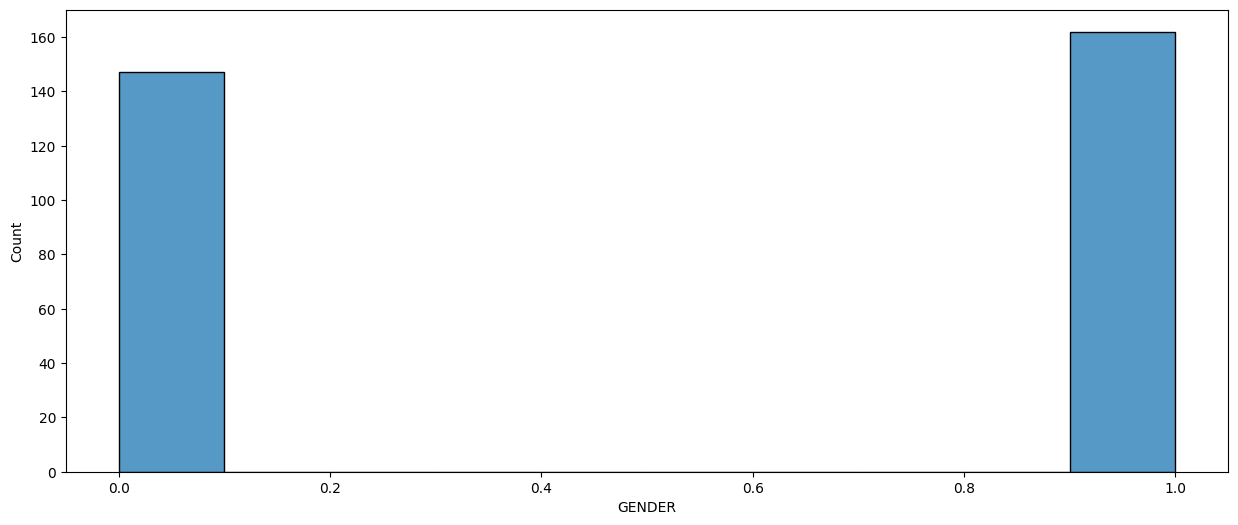

C:\Users\sajid\AppData\Local\Temp\ipykernel_2416\1408848185.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot( x=df[i], data = df, palette = 'hls')


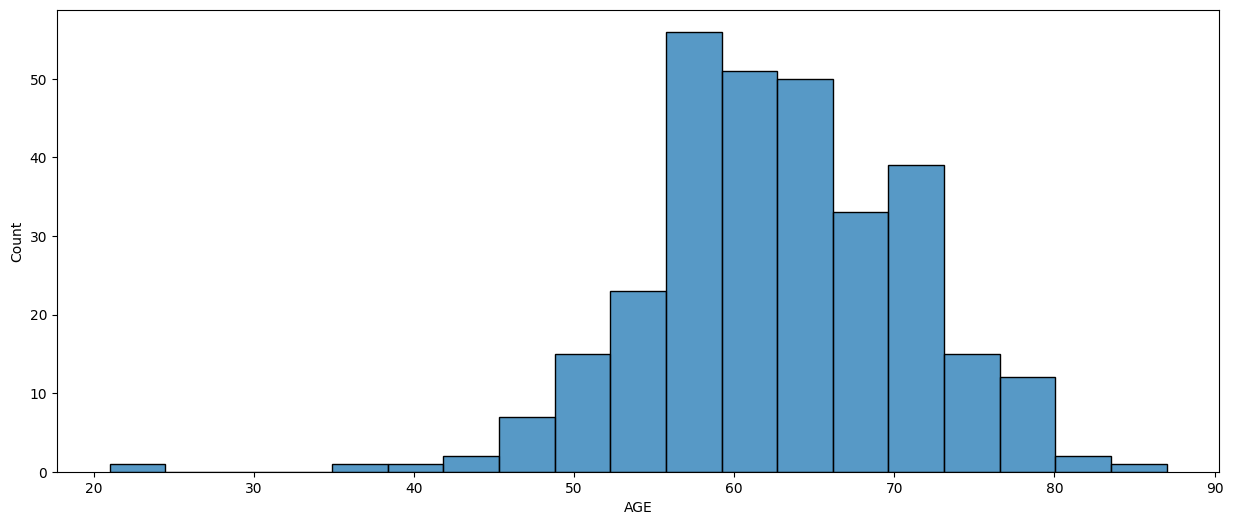

C:\Users\sajid\AppData\Local\Temp\ipykernel_2416\1408848185.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot( x=df[i], data = df, palette = 'hls')


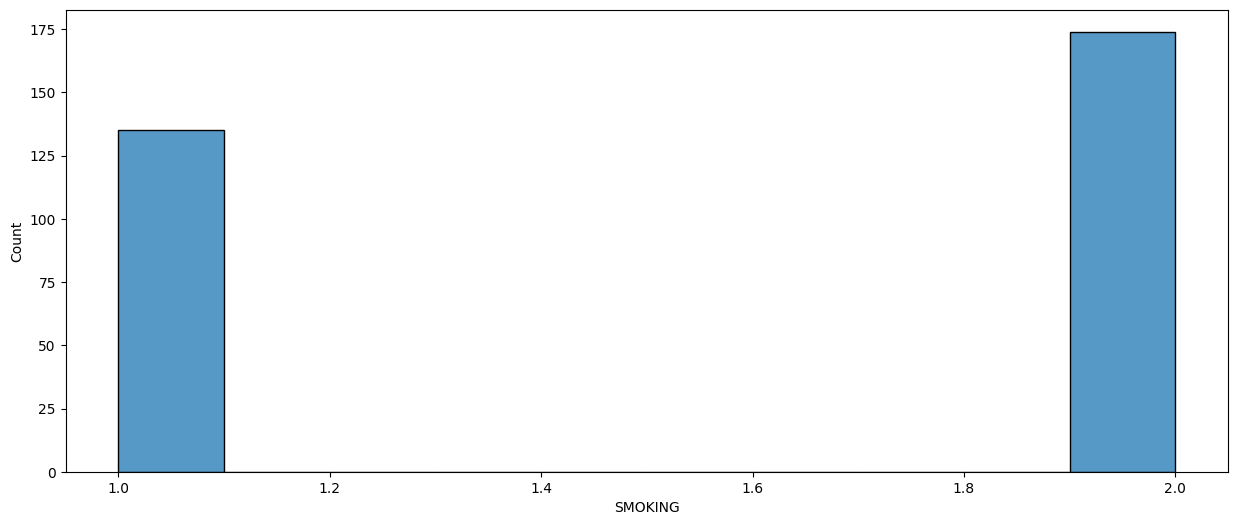

C:\Users\sajid\AppData\Local\Temp\ipykernel_2416\1408848185.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot( x=df[i], data = df, palette = 'hls')


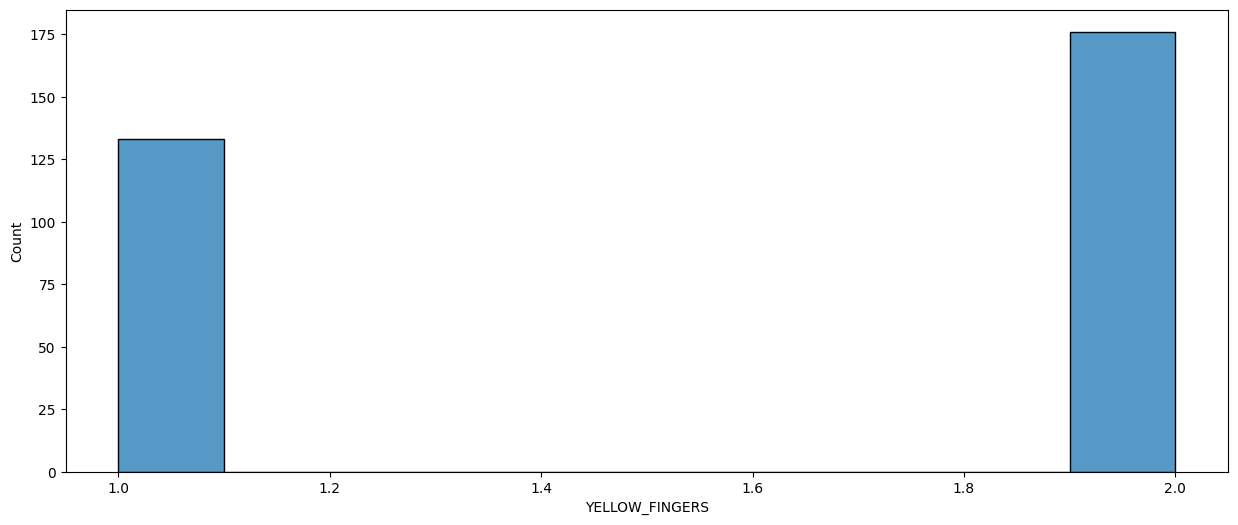

C:\Users\sajid\AppData\Local\Temp\ipykernel_2416\1408848185.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot( x=df[i], data = df, palette = 'hls')


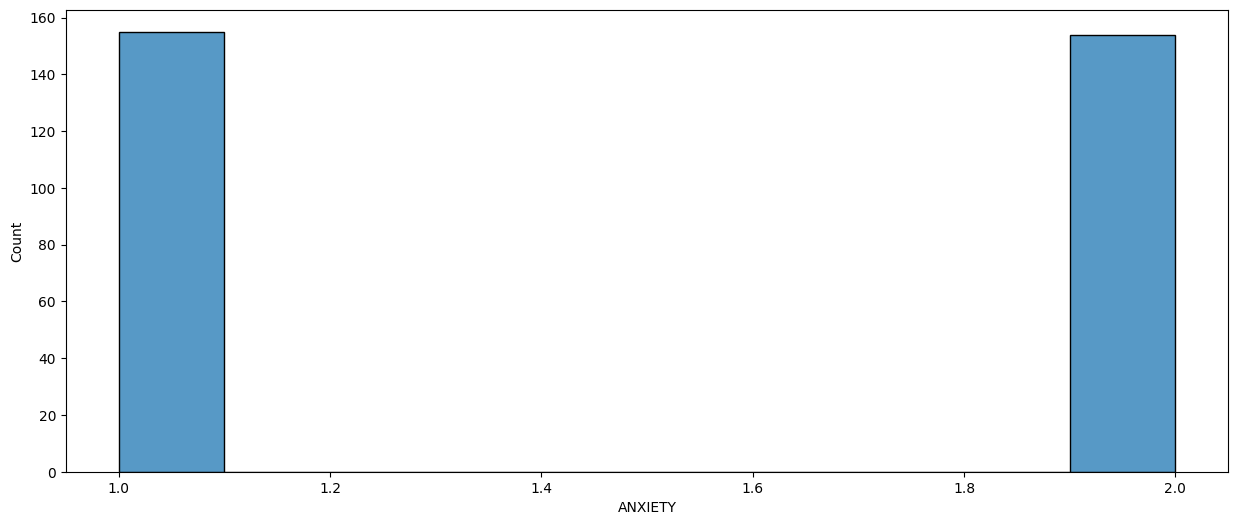

C:\Users\sajid\AppData\Local\Temp\ipykernel_2416\1408848185.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot( x=df[i], data = df, palette = 'hls')


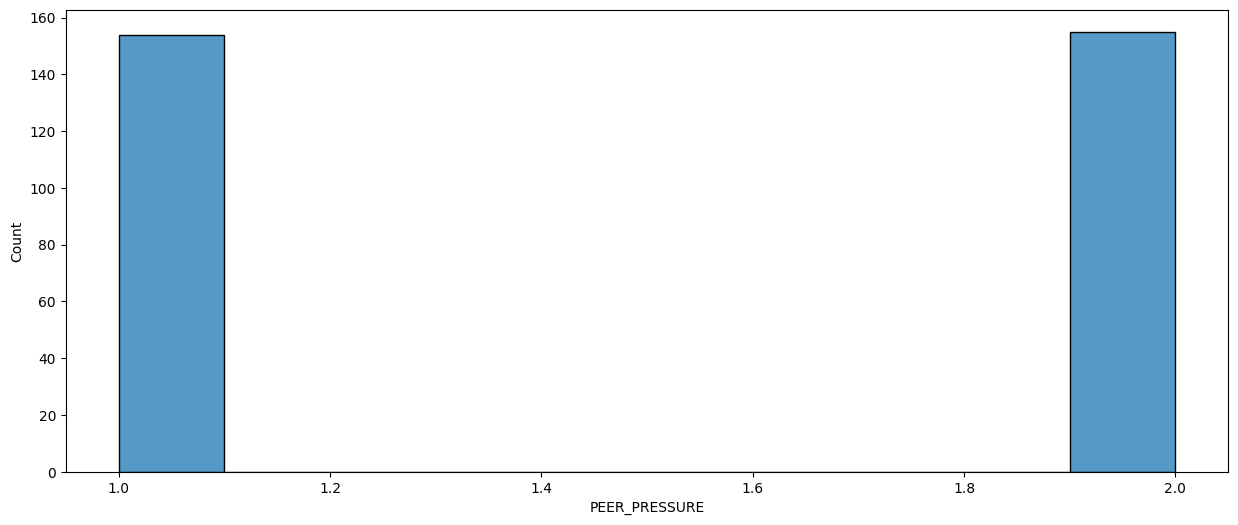

C:\Users\sajid\AppData\Local\Temp\ipykernel_2416\1408848185.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot( x=df[i], data = df, palette = 'hls')


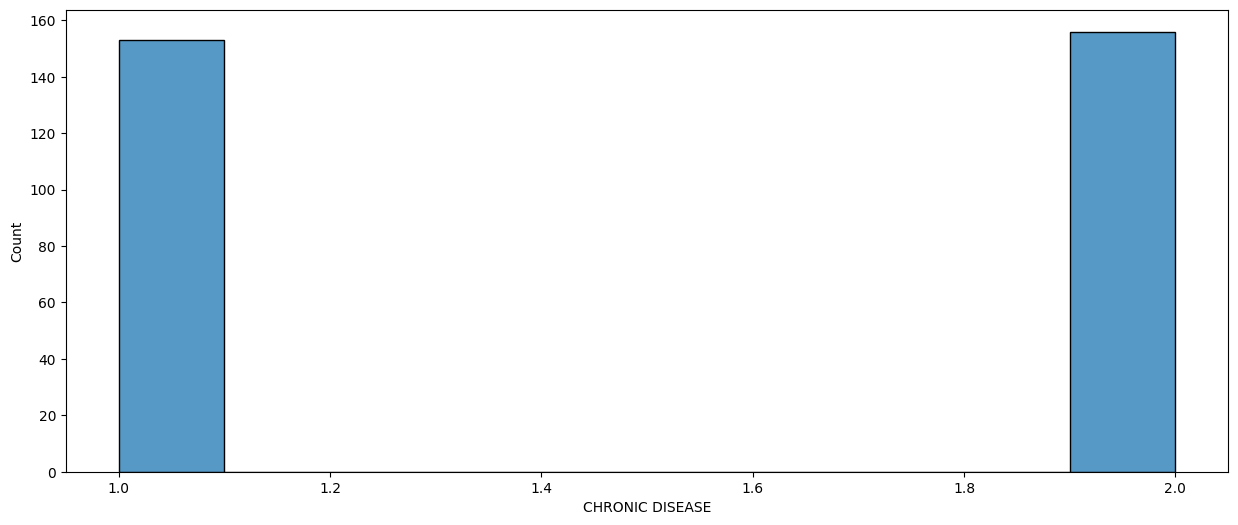

C:\Users\sajid\AppData\Local\Temp\ipykernel_2416\1408848185.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot( x=df[i], data = df, palette = 'hls')


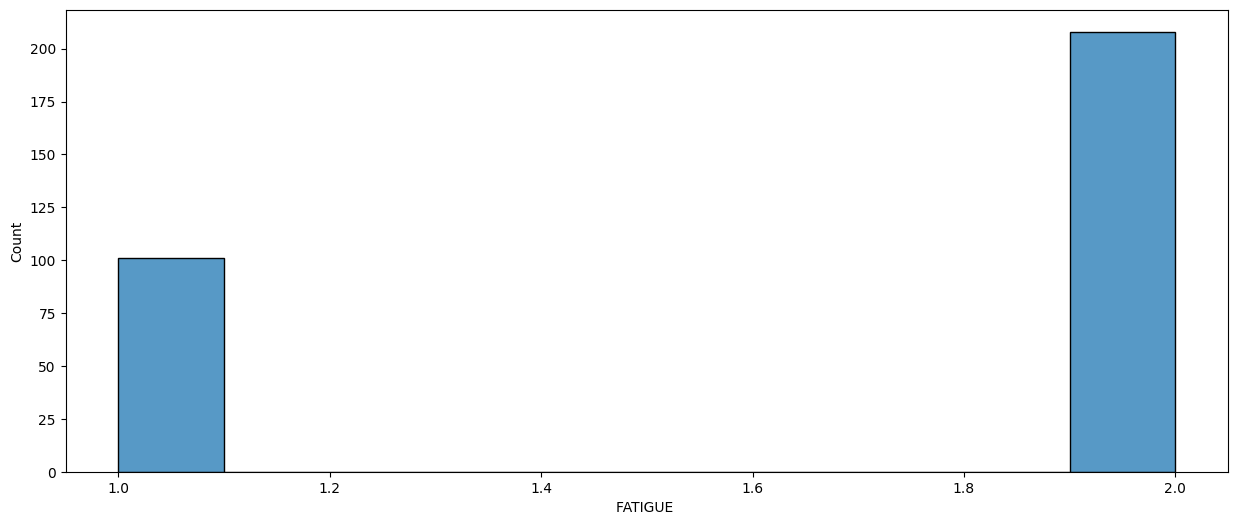

C:\Users\sajid\AppData\Local\Temp\ipykernel_2416\1408848185.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot( x=df[i], data = df, palette = 'hls')


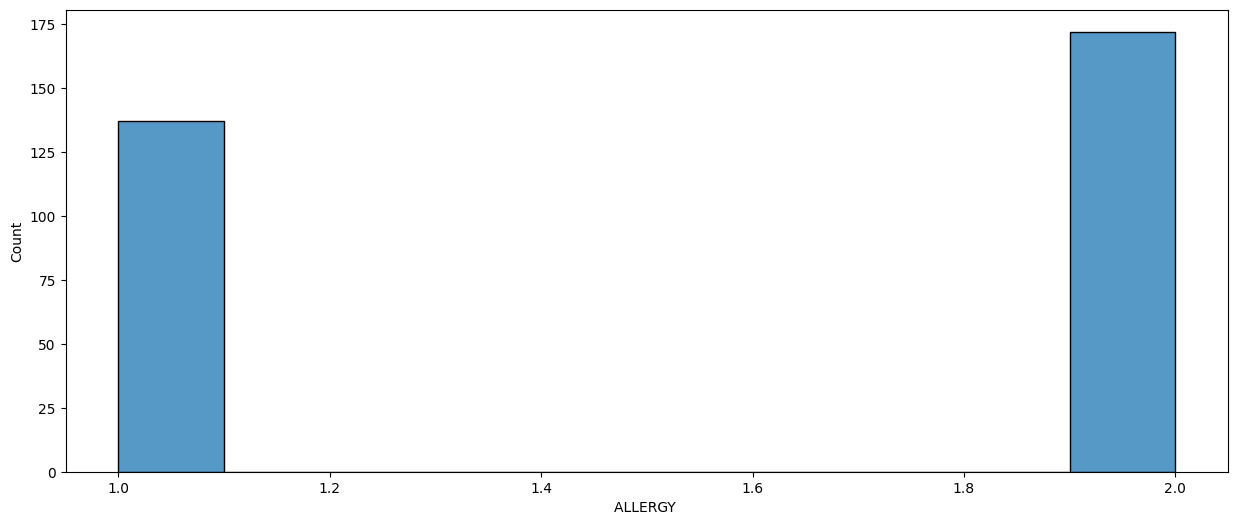

C:\Users\sajid\AppData\Local\Temp\ipykernel_2416\1408848185.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot( x=df[i], data = df, palette = 'hls')


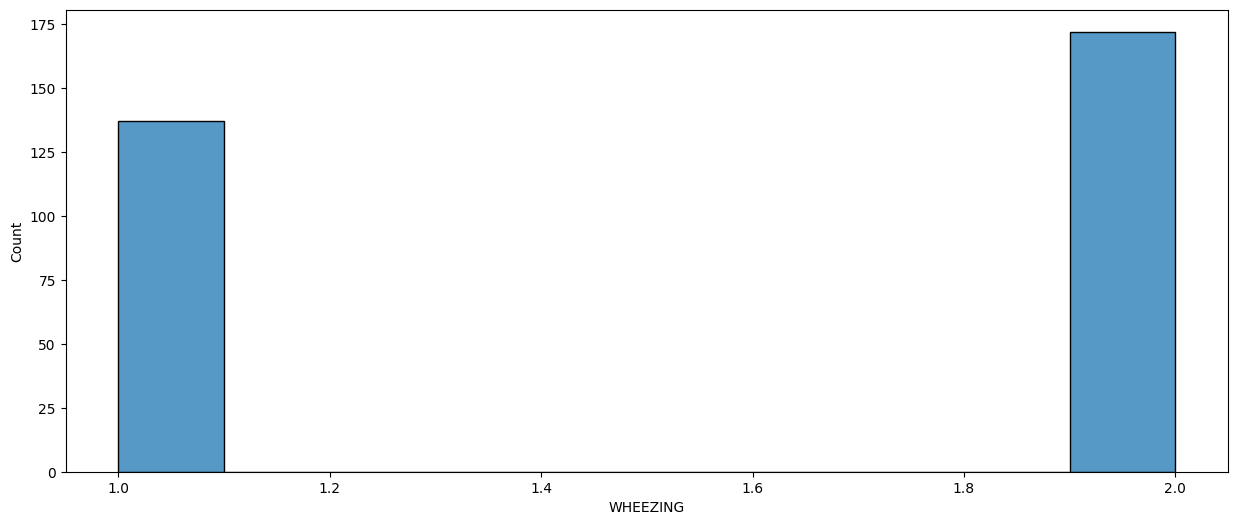

C:\Users\sajid\AppData\Local\Temp\ipykernel_2416\1408848185.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot( x=df[i], data = df, palette = 'hls')


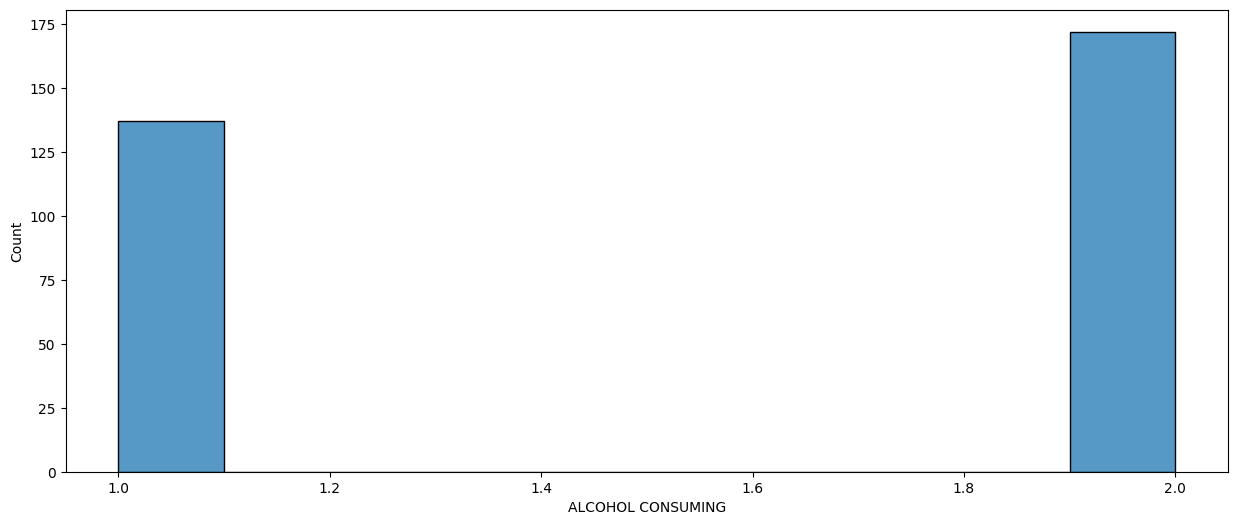

C:\Users\sajid\AppData\Local\Temp\ipykernel_2416\1408848185.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot( x=df[i], data = df, palette = 'hls')


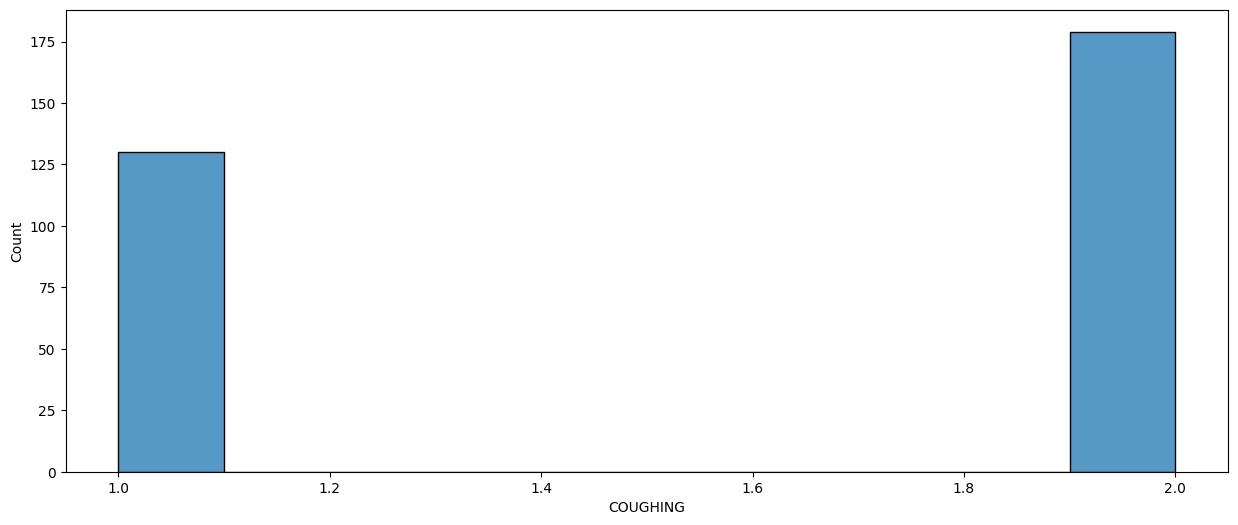

C:\Users\sajid\AppData\Local\Temp\ipykernel_2416\1408848185.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot( x=df[i], data = df, palette = 'hls')


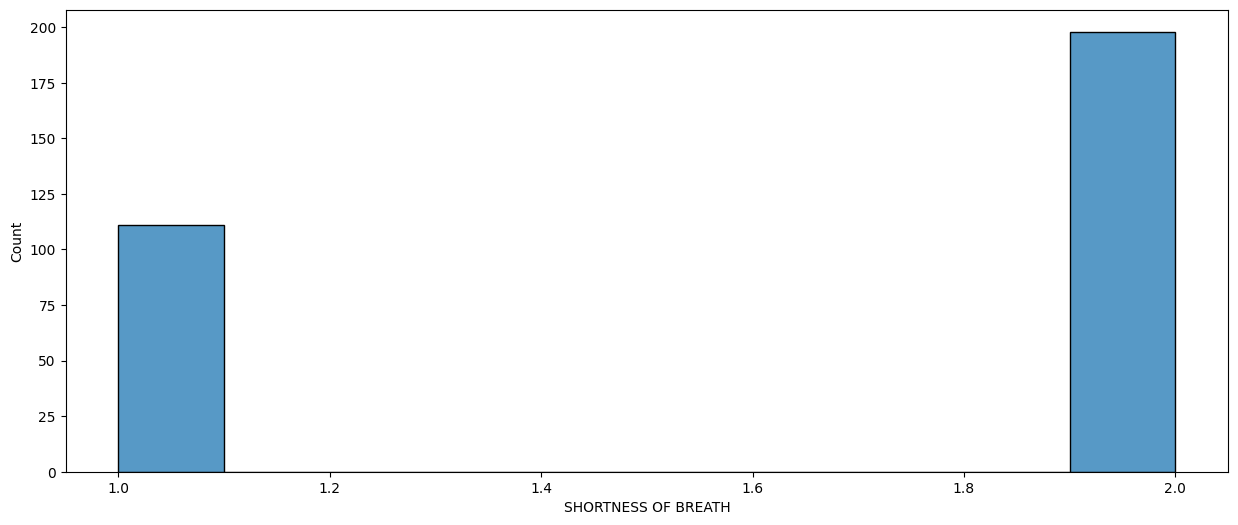

C:\Users\sajid\AppData\Local\Temp\ipykernel_2416\1408848185.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot( x=df[i], data = df, palette = 'hls')


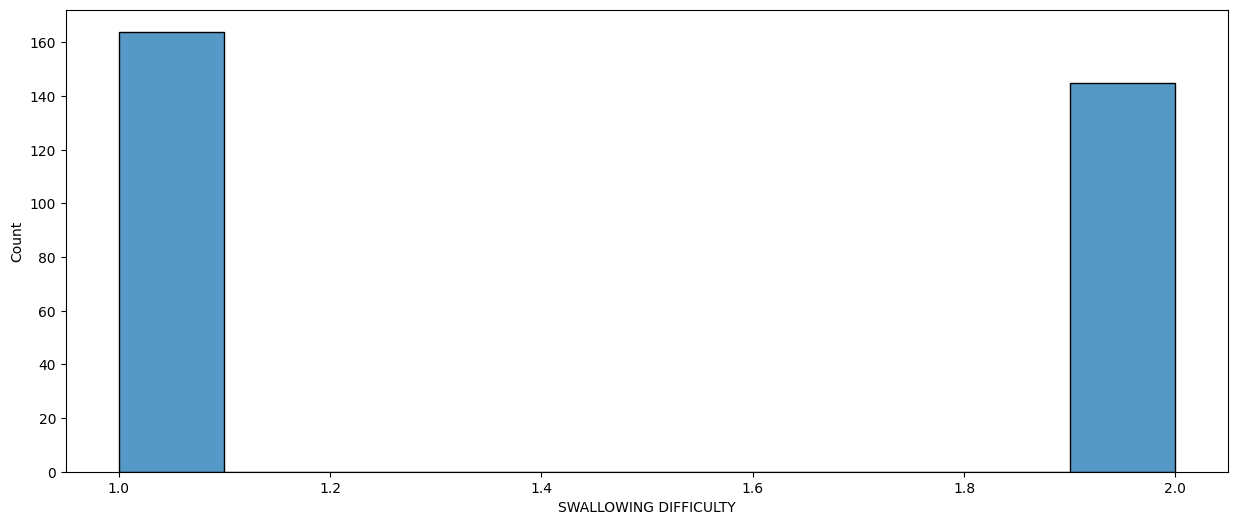

C:\Users\sajid\AppData\Local\Temp\ipykernel_2416\1408848185.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot( x=df[i], data = df, palette = 'hls')


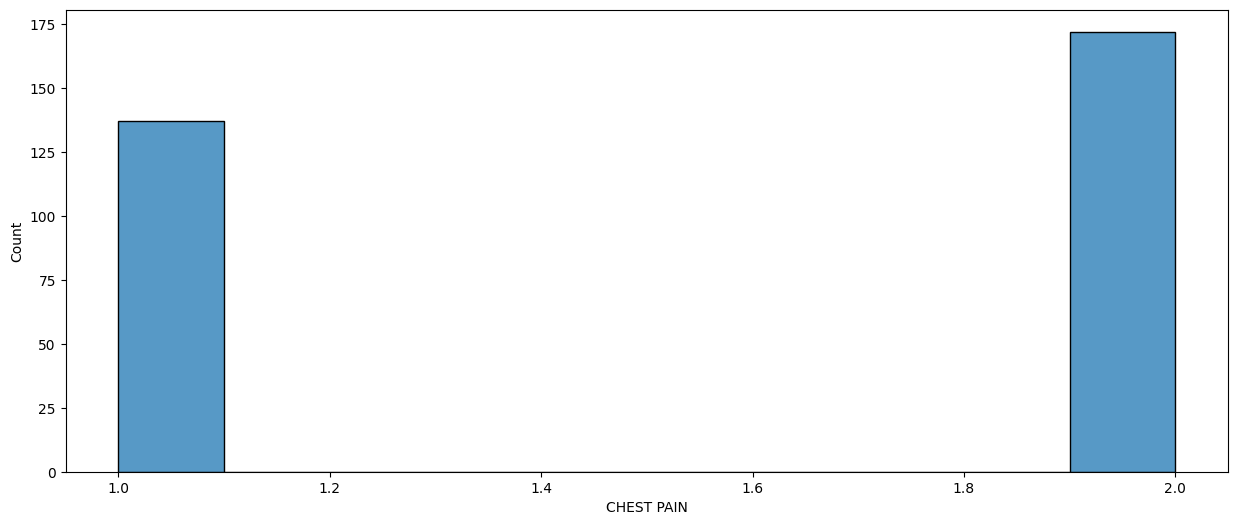

C:\Users\sajid\AppData\Local\Temp\ipykernel_2416\1408848185.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot( x=df[i], data = df, palette = 'hls')


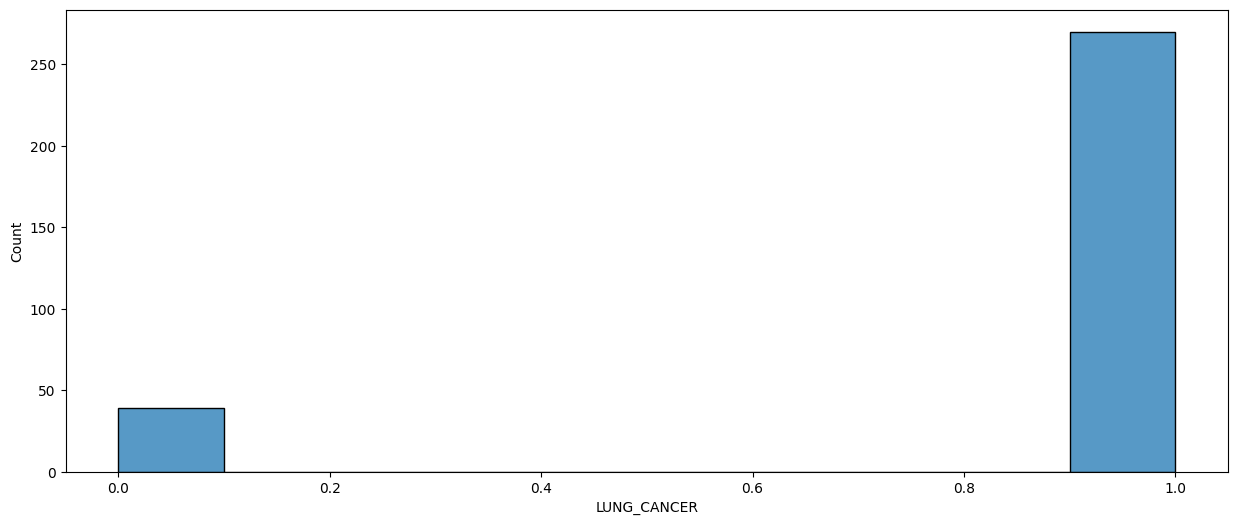

In [26]:
for i in df:
    plt.figure(figsize=(15,6))
    sns.histplot( x=df[i], data = df, palette = 'hls')
    plt.show()

In [30]:
import warnings
warnings.filterwarnings('ignore')

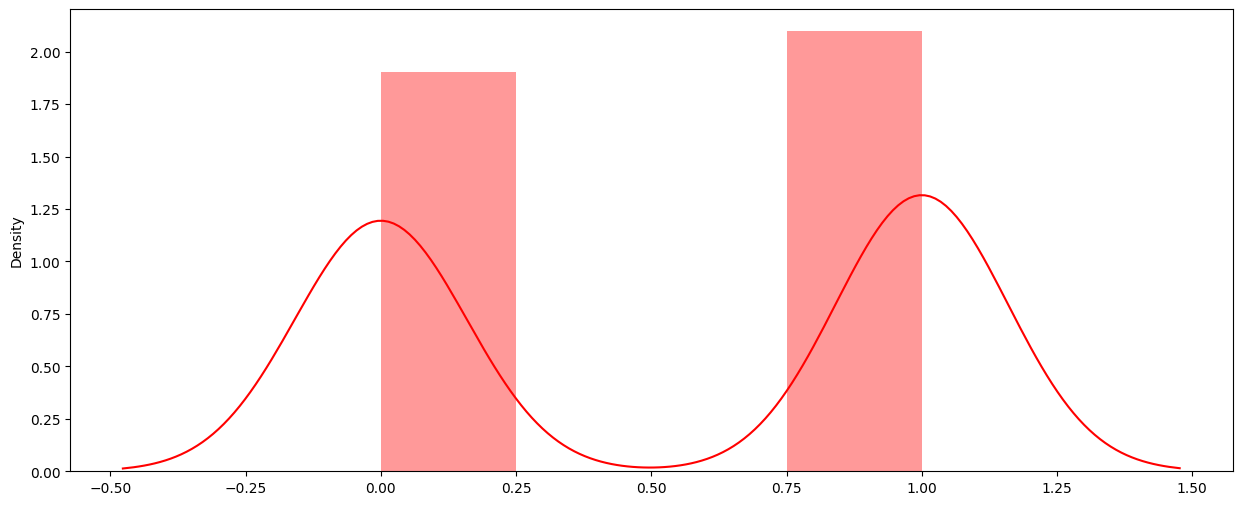

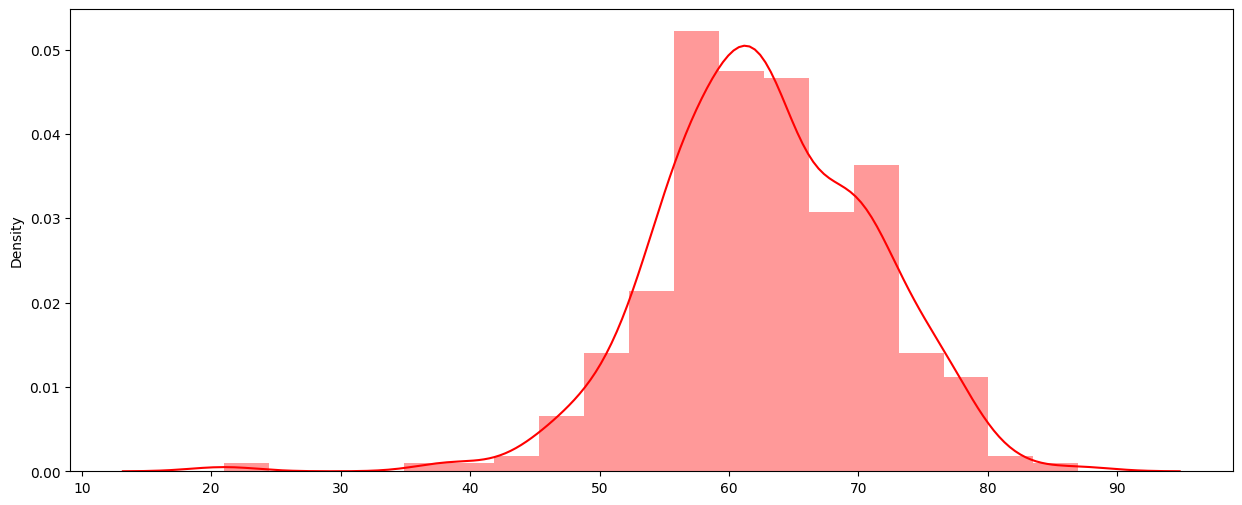

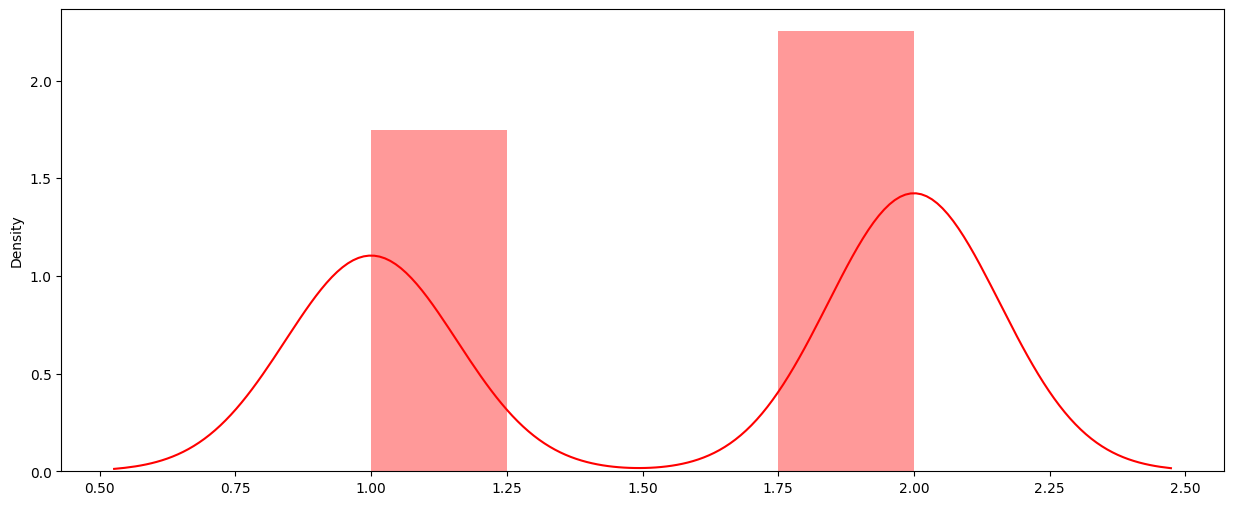

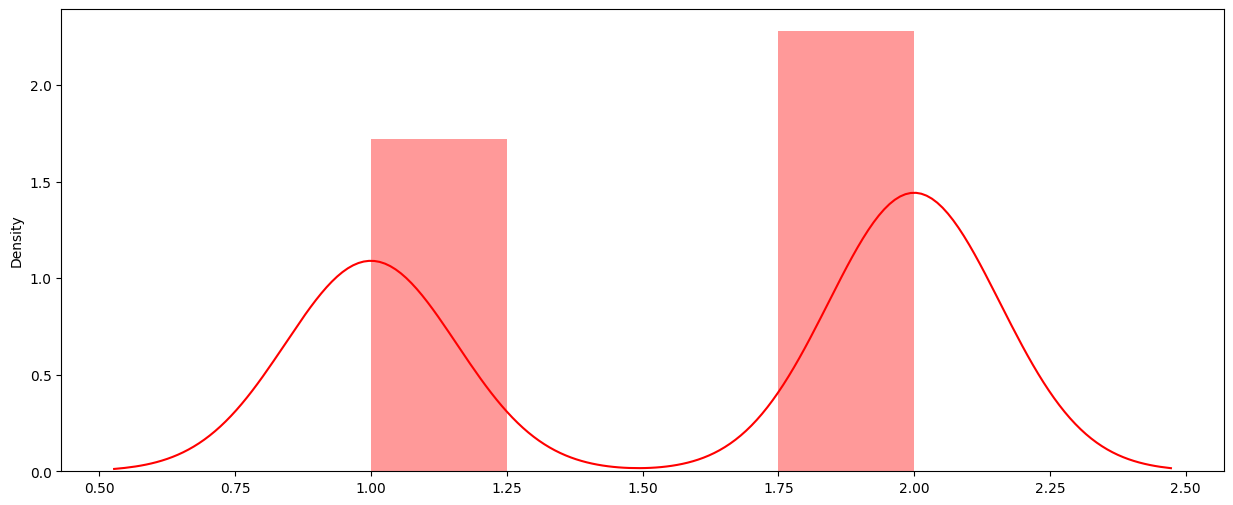

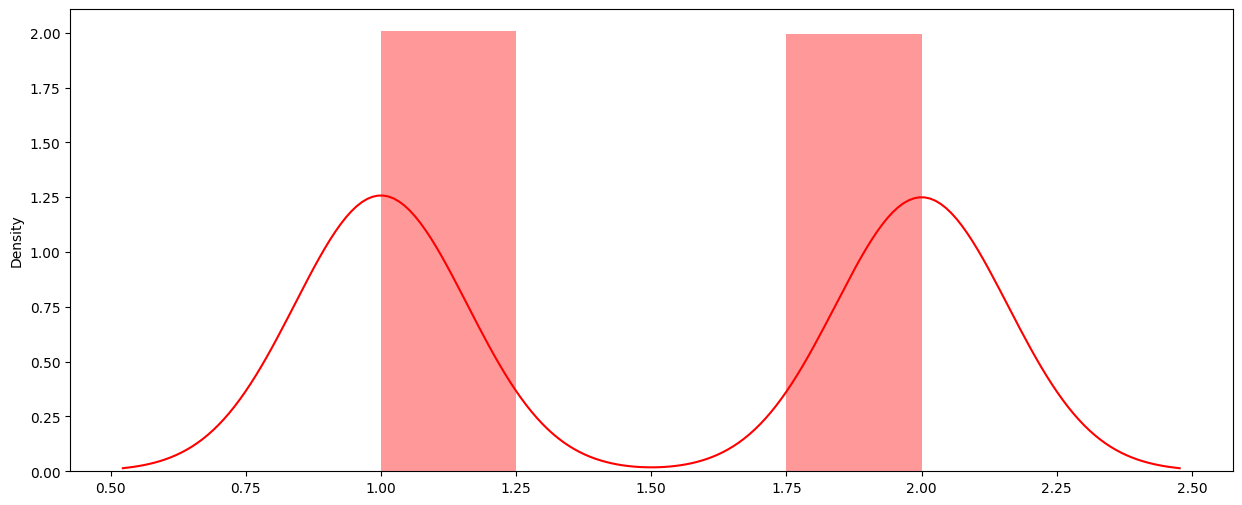

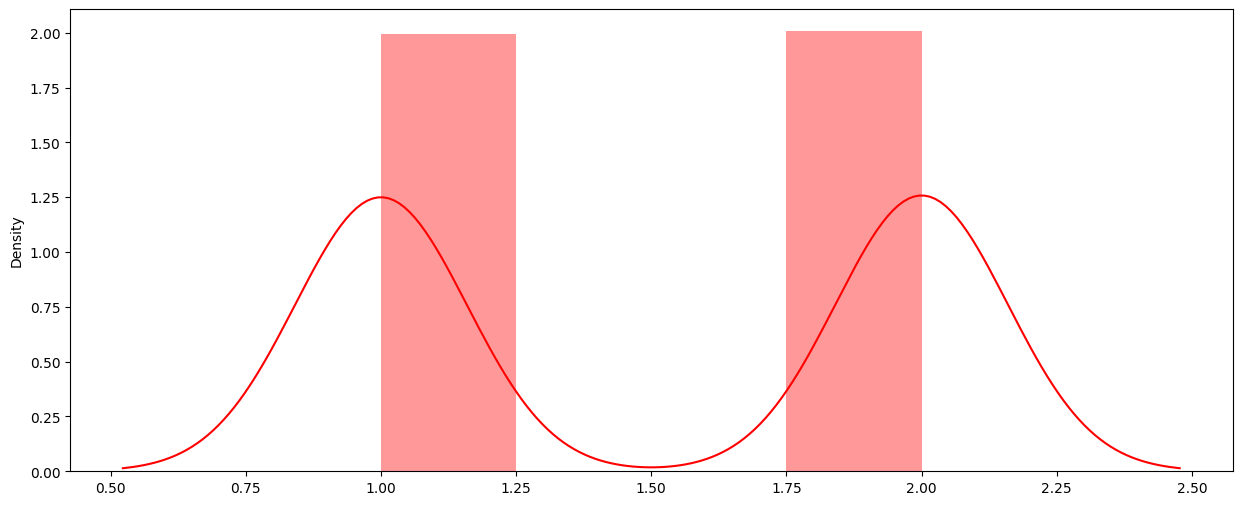

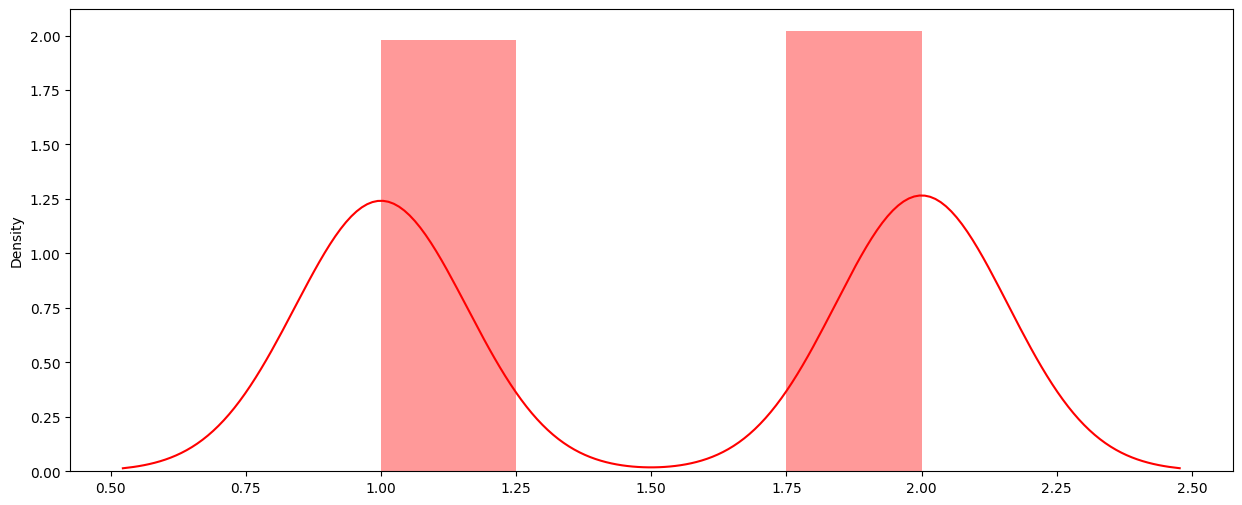

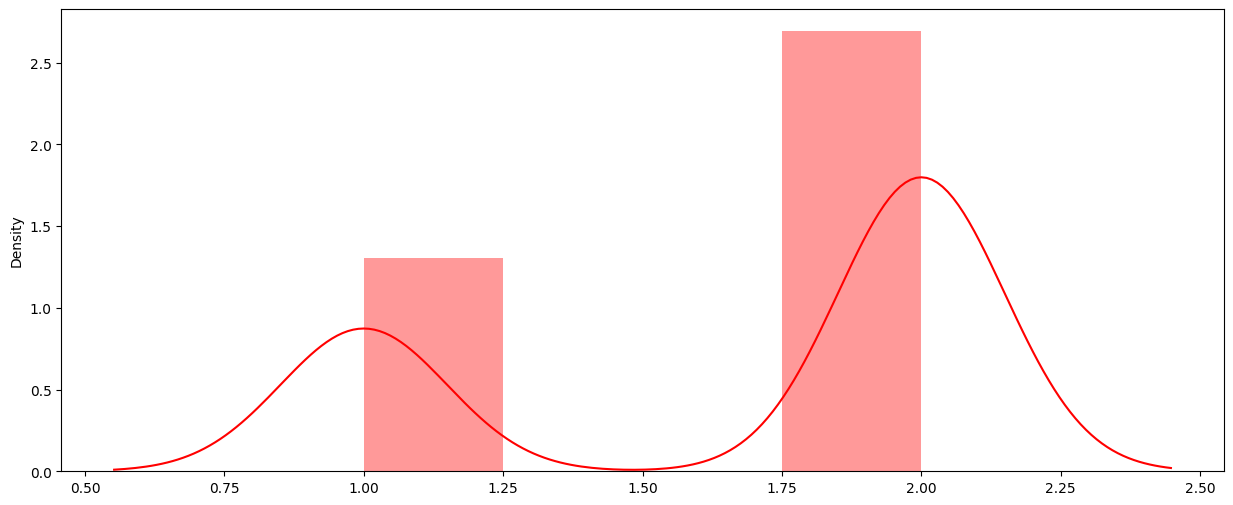

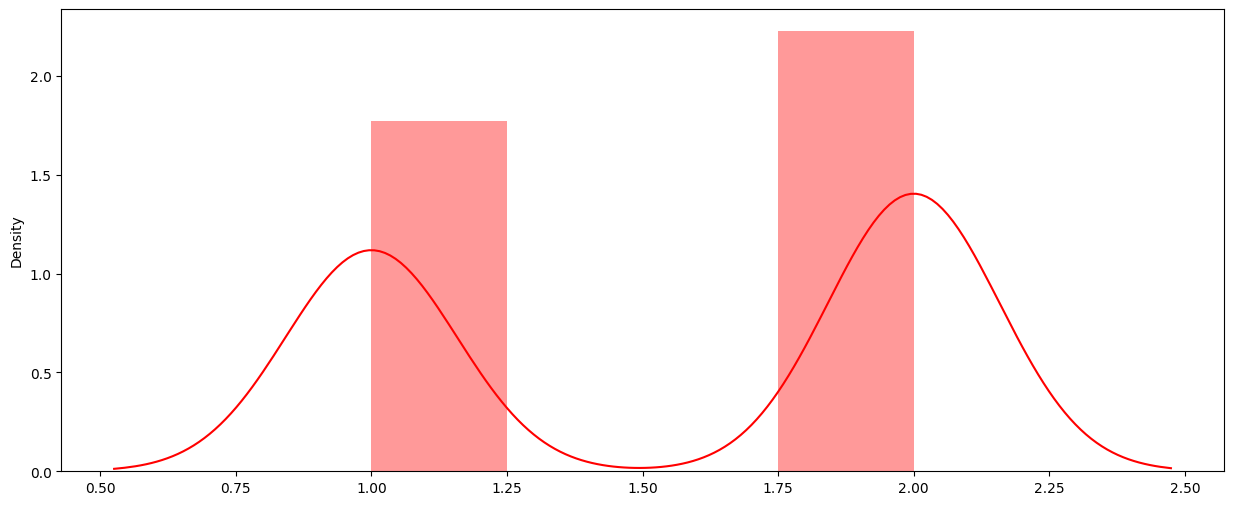

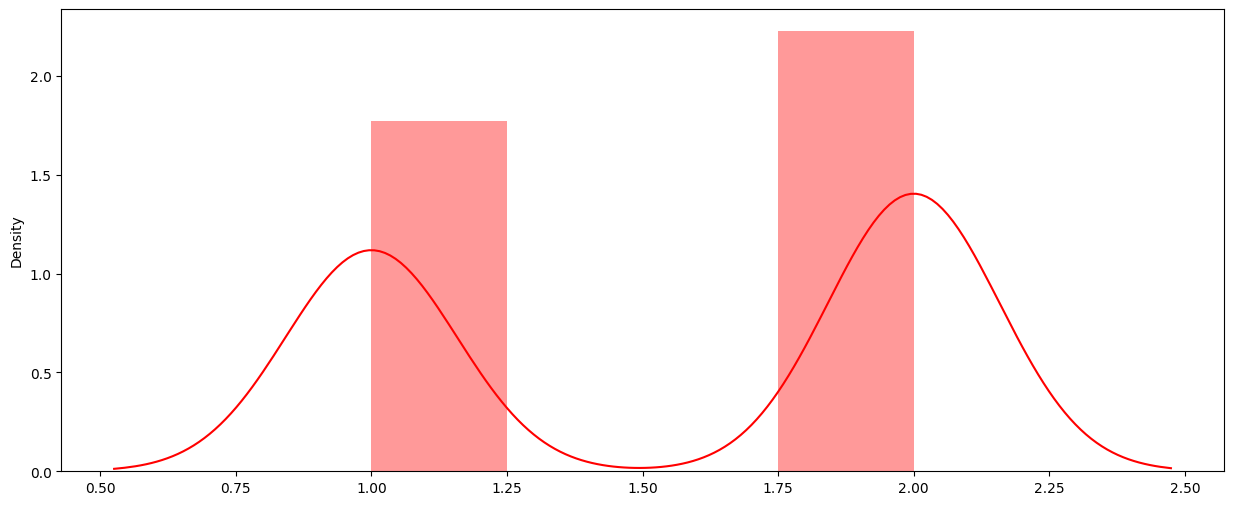

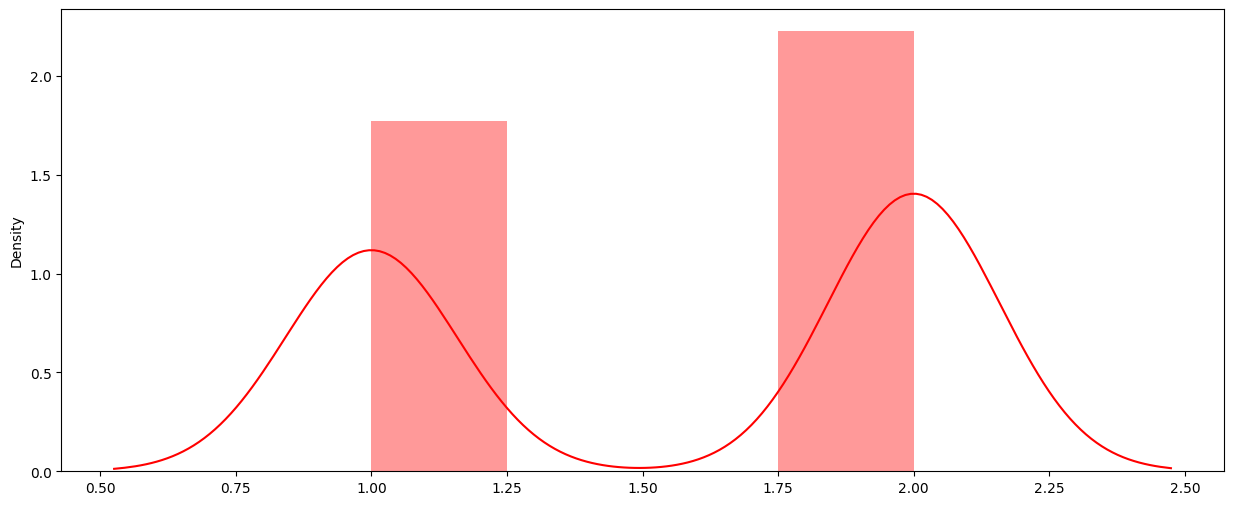

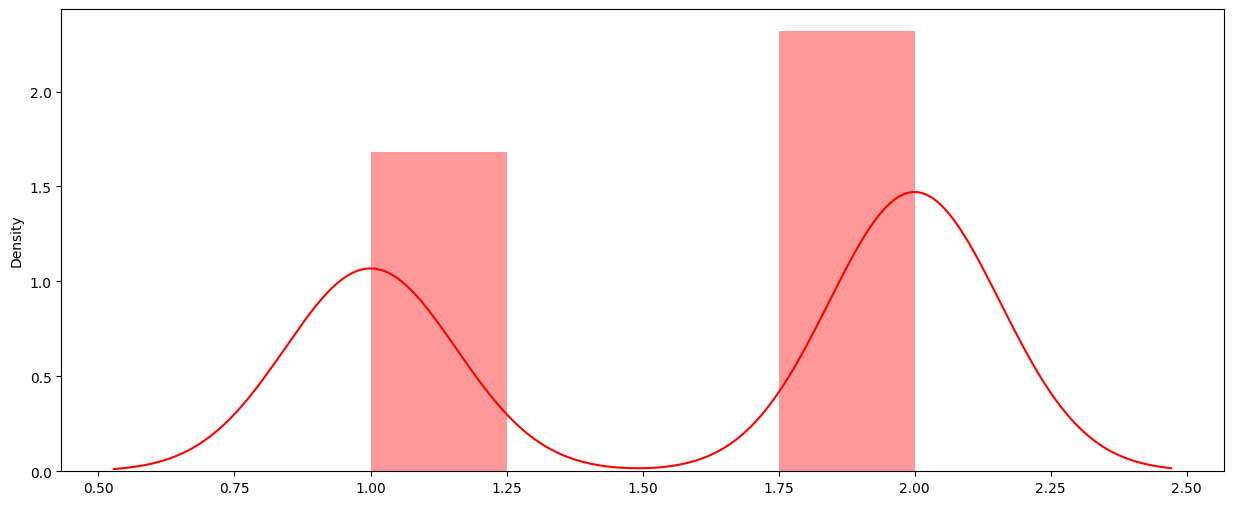

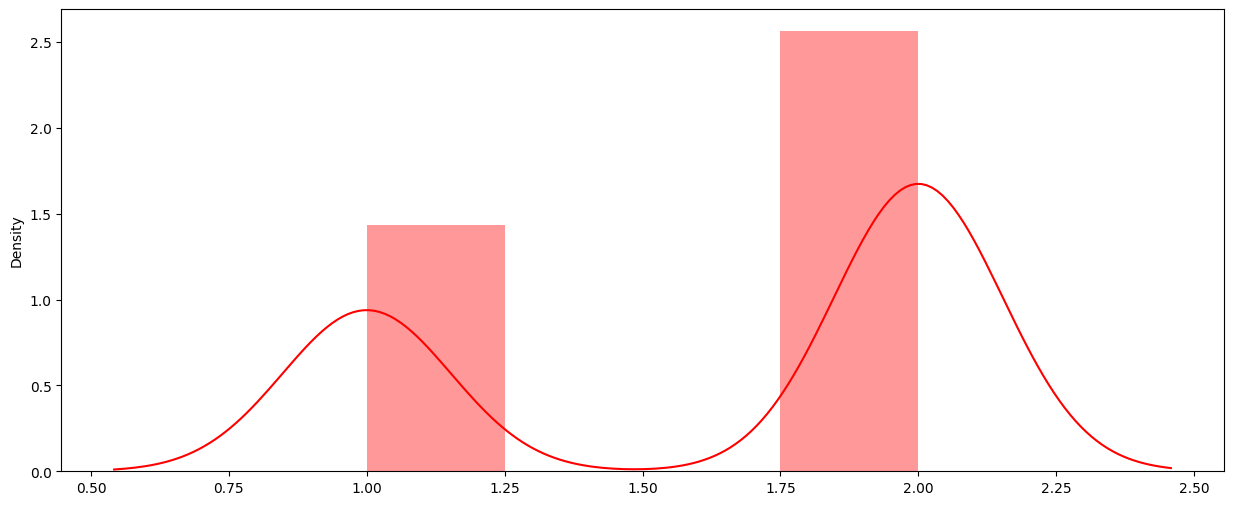

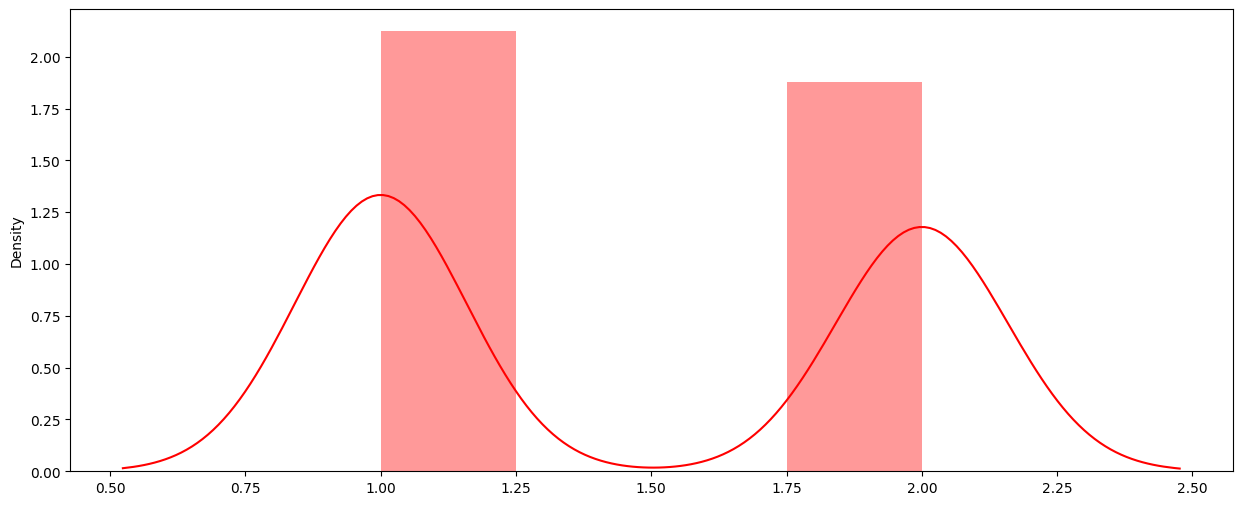

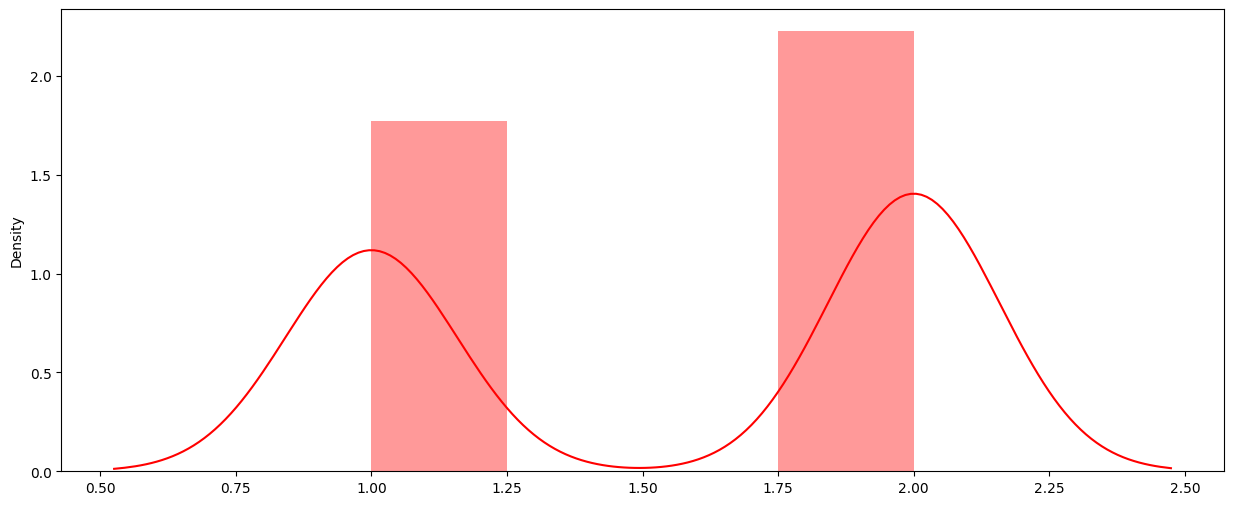

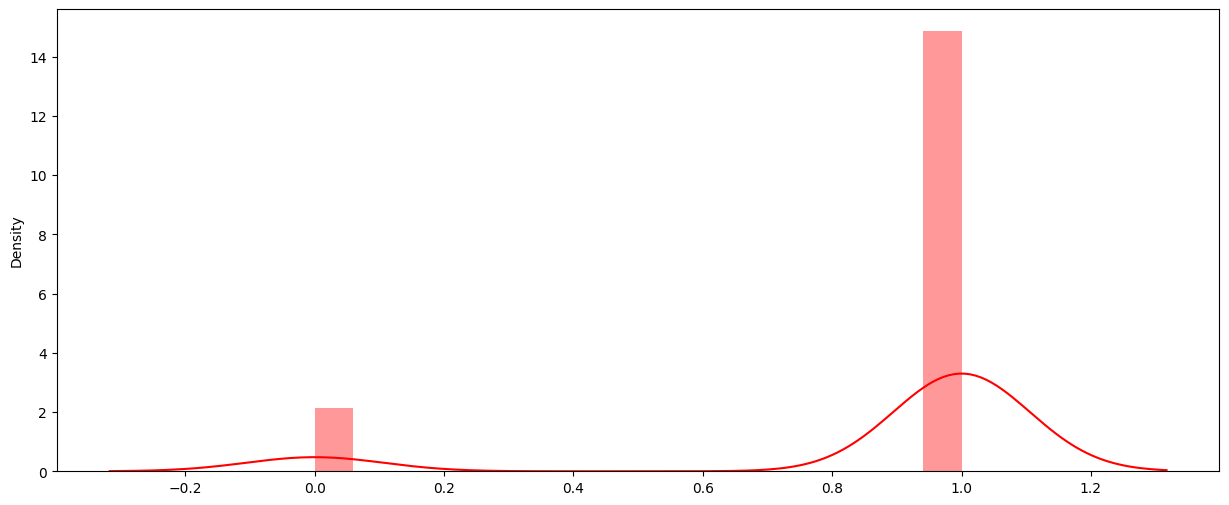

In [31]:
for i in df:
    plt.figure(figsize=(15,6))
    sns.distplot(x=df[i], color = 'red',kde=True)
    plt.show()

In [32]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

GENDER                    1.0
AGE                      12.0
SMOKING                   1.0
YELLOW_FINGERS            1.0
ANXIETY                   1.0
PEER_PRESSURE             1.0
CHRONIC DISEASE           1.0
FATIGUE                   1.0
ALLERGY                   1.0
WHEEZING                  1.0
ALCOHOL CONSUMING         1.0
COUGHING                  1.0
SHORTNESS OF BREATH       1.0
SWALLOWING DIFFICULTY     1.0
CHEST PAIN                1.0
LUNG_CANCER               0.0
dtype: float64


In [33]:
df_new = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]

In [34]:
df_new.shape

(269, 16)

In [35]:
df.shape

(309, 16)

In [36]:
df_corr = df.corr()

In [37]:
df_corr

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.021306,0.036277,-0.212959,-0.152127,-0.275564,-0.204606,-0.083560,0.154251,0.141207,0.454268,0.133303,-0.064911,-0.078161,0.362958,0.067254
AGE,0.021306,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.089465
SMOKING,0.036277,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179
YELLOW_FINGERS,-0.212959,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
ANXIETY,-0.152127,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947
PEER_PRESSURE,-0.275564,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
CHRONIC DISEASE,-0.204606,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891
FATIGUE,-0.083560,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673
ALLERGY,0.154251,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
WHEEZING,0.141207,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300


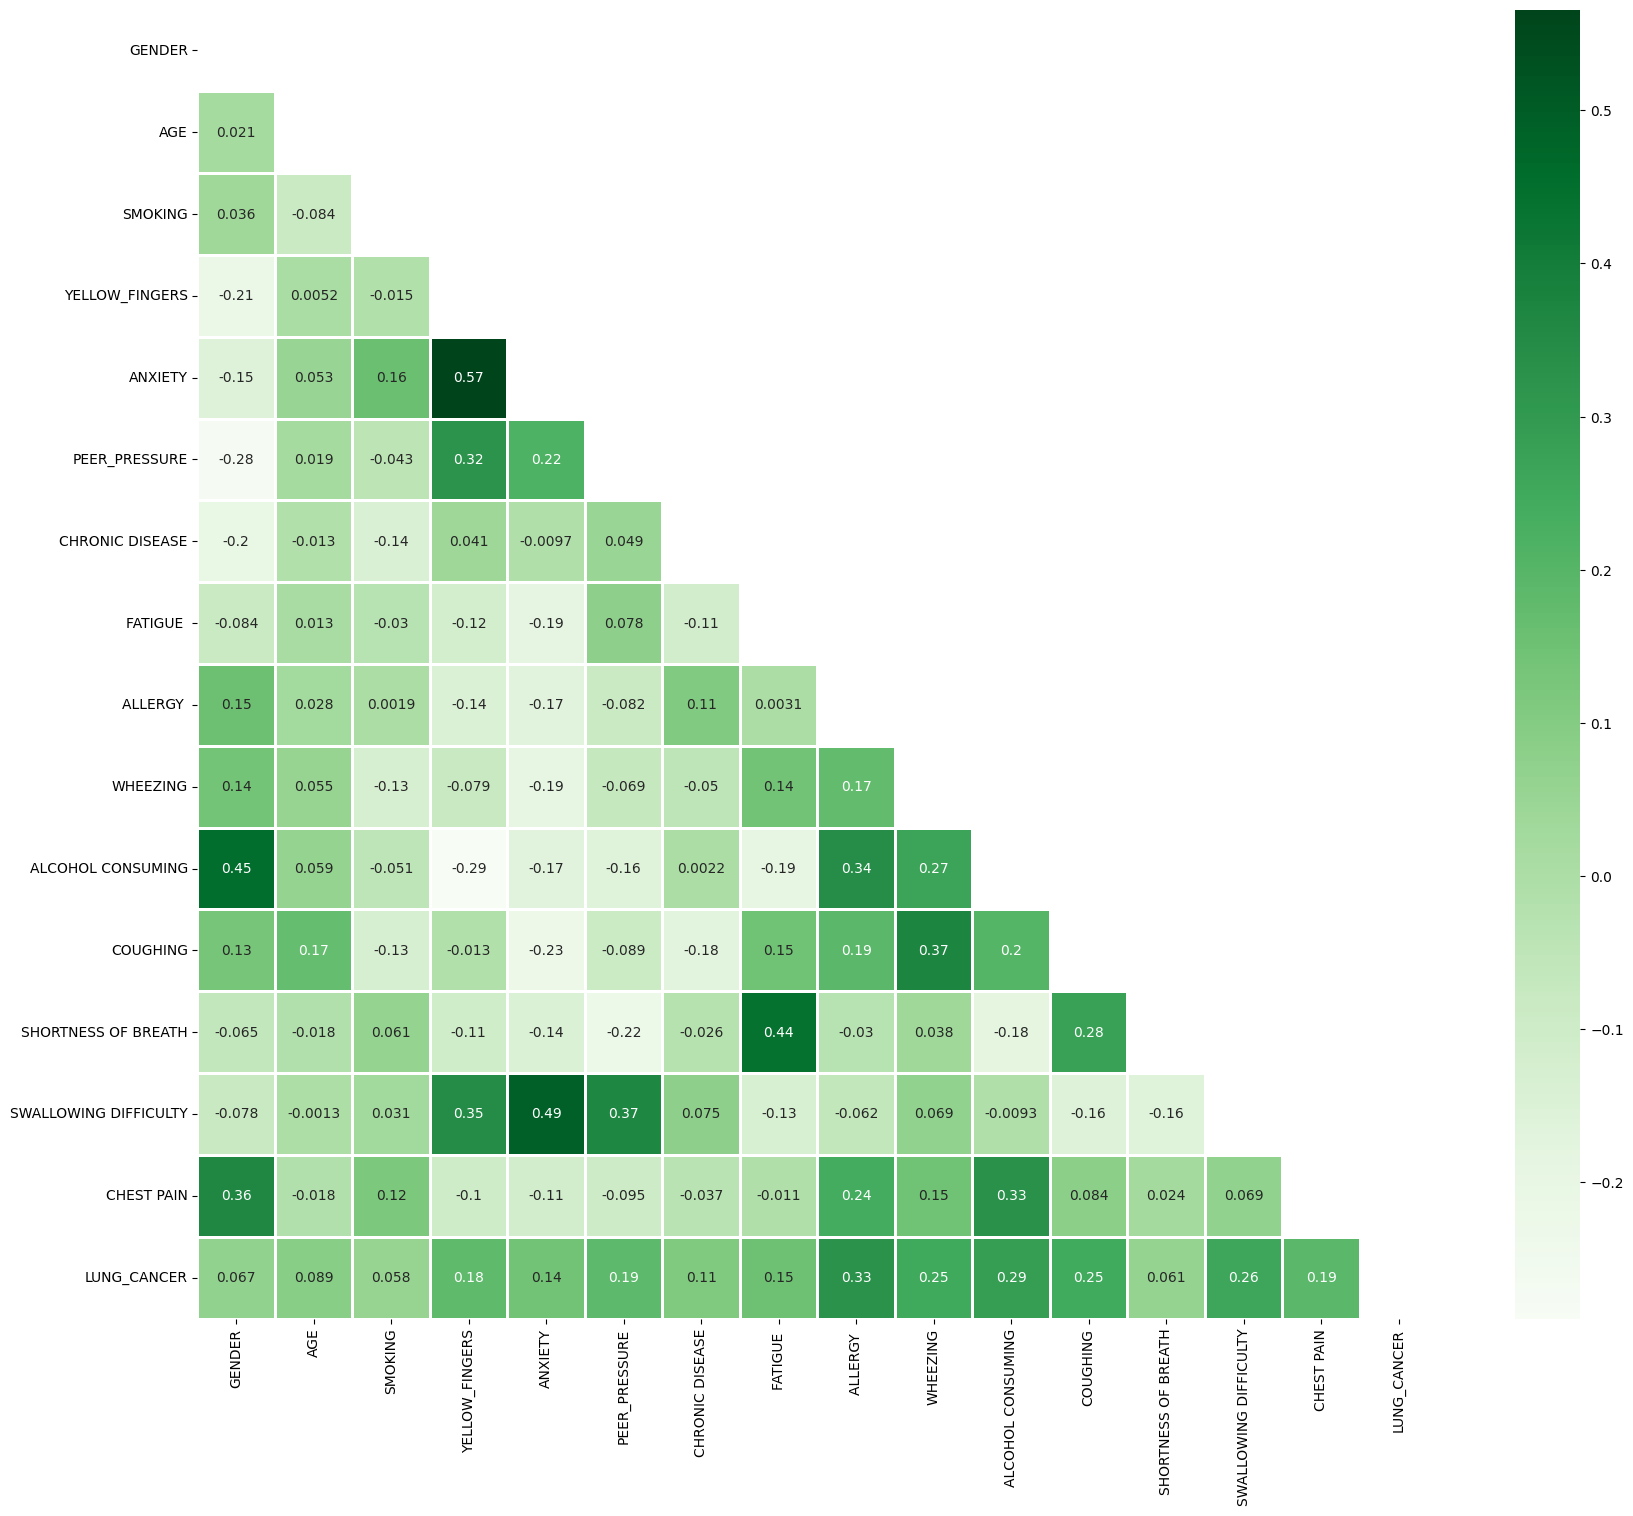

In [38]:
plt.figure(figsize=(20, 17))
matrix = np.triu(df_corr)
sns.heatmap(df_corr, annot=True, linewidth=.8, mask=matrix, cmap="Greens");
plt.show()

In [39]:
X = df.drop('LUNG_CANCER',axis=1)
y =df['LUNG_CANCER']

In [40]:
from  sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42, stratify = y)

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [44]:
y_pred = lr.predict(X_test)

In [45]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9102564102564102


In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
y_pred = dt.predict(X_test)

In [51]:
print("Accuracy:", accuracy_score(y_test,y_pred))

Accuracy: 0.9230769230769231


In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
y_pred = rfc.predict(X_test)

In [55]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.8846153846153846


In [56]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [57]:
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 40)

In [58]:
def grid_search(model,folds,params,scoring):
    grid_search = GridSearchCV(model,
                                cv=folds, 
                                param_grid=params, 
                                scoring=scoring, 
                                n_jobs=-1, verbose=1)
    return grid_search

In [59]:
def print_best_score_params(model):
    print("Best Score: ", model.best_score_)
    print("Best Hyperparameters: ", model.best_params_)

In [60]:
log_reg = LogisticRegression()
log_params = {'C': [0.01, 1, 10], 
          'penalty': ['l1', 'l2'],
          'solver': ['liblinear','newton-cg','saga']
         },
grid_search_log = grid_search(log_reg, folds, log_params, scoring=None)
grid_search_log.fit(X_train, y_train)
print_best_score_params(grid_search_log)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Score:  0.9306197964847364
Best Hyperparameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [61]:
lr = LogisticRegression(C = 1, penalty = 'l2', solver = 'liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=1, solver='liblinear')

In [62]:
y_pred = lr.predict(X_test)

In [63]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.8846153846153846


In [64]:
dtc = DecisionTreeClassifier(random_state=40)
dtc_params = {
    'max_depth': [5,10,20,30],
    'min_samples_leaf': [5,10,20,30]
}
grid_search_dtc = grid_search(dtc, folds, dtc_params, scoring='roc_auc_ovr')
grid_search_dtc.fit(X_train, y_train)
print_best_score_params(grid_search_dtc)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Score:  0.7619105691056911
Best Hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 5}


In [65]:
dt = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 30)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=30)

In [66]:
y_pred = dt.predict(X_test)

In [67]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8717948717948718


In [68]:
rfc = RandomForestClassifier(random_state=40, n_jobs = -1,oob_score=True)
rfc_params = {'max_depth': [10,20,30,40],
          'min_samples_leaf': [5,10,15,20,30],
          'n_estimators': [100,200,500,700]
        }
grid_search_rfc = grid_search(rfc, folds, rfc_params, scoring='roc_auc_ovr')
grid_search_rfc.fit(X_train, y_train)
print('OOB SCORE :',grid_search_rfc.best_estimator_.oob_score_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
OOB SCORE : 0.8961038961038961


In [69]:
print_best_score_params(grid_search_rfc)

Best Score:  0.902418699186992
Best Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 700}


In [70]:
rfc = RandomForestClassifier(max_depth = 20, min_samples_leaf = 10, n_estimators = 700)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=700)

In [71]:
ypred = rfc.predict(X_test)

In [72]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8717948717948718


In [73]:
from sklearn.naive_bayes import GaussianNB

In [74]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [75]:
y_pred = gnb.predict(X_test)

In [76]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8974358974358975


In [77]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

In [78]:
grid_search = GridSearchCV(gnb, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1]})

In [79]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'var_smoothing': 0.001}
Best accuracy:  0.9046253469010175


In [80]:
gnb = GaussianNB(var_smoothing = 1e-09)
gnb.fit(X_train,y_train)

GaussianNB()

In [81]:
y_pred = gnb.predict(X_test)

In [82]:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)

Accuracy: 0.8974358974358975


In [83]:
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [85]:
y_pred = gbc.predict(X_test)

In [86]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8717948717948718


In [87]:
import xgboost as xgb

In [88]:
model = xgb.XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [89]:
y_pred = model.predict(X_test)

In [90]:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)

Accuracy: 0.8846153846153846


In [91]:
import pickle

In [93]:
filename = 'lungcancer.sav'
pickle.dump(model,open(filename,'wb'))

In [96]:
loaded_model = pickle.load(open('lungcancer.sav','rb'))

In [97]:
input_data = (1,68,1,2,2,21,1,2,1,2,2,2,2,2,2)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)


if (prediction[0] ==0):
    print('The person has  no lung cancer')
else:
    print('The person has lung cancer')

[1]
The person has lung cancer
